In [118]:
filein = open('newtest.txt', 'w')
filein.close()

# API Twitter Search

In [ ]:
import sys
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import Key
from random import randint

HashTag = raw_input("HashTag  : ") or "CNN"

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)

filein = open('newtest.txt', 'a')
txt = twitter.search(q=HashTag)
txt = str(txt)
filein.write(txt)
filein.close()

print txt

In [ ]:
from bs4 import BeautifulSoup

filein = open('newtest.txt', 'r')
list = filein.readline()

list = list.replace("u'id_str': u'", '\nid ')
list = list.replace(u'\u2026','ignore')
list = list.replace(u'\xa0','ignore')
list = list.replace(u'\u2013', u' ')
list = list.replace(u'\xf1', u' ')
list = list.replace(u'\u2019','ignore')
list = '\n'+ u''.join((list)).encode('utf-8').strip()

print list

In [ ]:
from twython import Twython
import csv
from dateutil import parser
from dateutil.parser import parse as parse_date
import datetime
from datetime import datetime
import pytz
import Key
from random import randint

utc=pytz.UTC
HashTag = raw_input("HashTag  : ") or "CNN"

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)

filein = open('newtest.txt', 'a')
txt = twitter.search(q=HashTag, count="1000",since='2017-7-1')
txt = str(txt)
filein.write(txt)
filein.close()
print txt

In [ ]:
from twython import Twython
import csv
from dateutil import parser
from dateutil.parser import parse as parse_date
import datetime
from datetime import datetime
import pytz
import Key
from random import randint

utc=pytz.UTC
HashTag = raw_input("HashTag  : ") or "CNN"

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)

filein = open('newtest.txt', 'a')
txt = twitter.search(q=HashTag, count="1000",since='2017-7-1')
txt = str(txt)
filein.write(txt)
filein.close()
print txt


def on_status(self, status): 
    with open('file.txt', 'w') as f: 
        f.write('Author,Date,Text')
        writer = csv.writer(f)
        writer.writerow([status.author.screen_name, status.created_at, status.text])






In [ ]:
import sys
import tweepy
import csv
import Key

#pass security information to variables
consumer_key = Key.twiter()[0]
consumer_secret = Key.twiter()[1]
access_key = Key.twiter()[2]
access_secret = Key.twiter()[3]

#use variables to access twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

#create an object called 'customStreamListener'
class CustomStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        print (status.author.screen_name, status.created_at, status.text)
        # Writing status data
        with open('OutputStreaming.txt', 'a') as f:
            writer = csv.writer(f)
            #status.author.screen_name = status.author.screen_name.encode('UTF-8')
            #status.text.encode = status.text.encode('UTF-8')            
            writer.writerow([status.author.screen_name.encode('UTF-8'), status.created_at, status.text.encode('utf8')])


    def on_error(self, status_code):
        print >> sys.stderr, 'Encountered error with status code:', status_code
        return True # Don't kill the stream

    def on_timeout(self):
        print >> sys.stderr, 'Timeout...'
        return True # Don't kill the stream


    def titles():
        # Writing csv titles
        with open('OutputStreaming.txt', 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow(['Author', 'Date', 'Text'])
            
streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())
#with open("tokens.txt", "r") as f:
with open("tokens2.txt", "r") as f:    
    tokens = f.readlines()

    streamingAPI.filter(track=tokens)
    #streamingAPI.filter(track=['Dallas', 'NewYork'])
    
    
    #status.text.encode('utf-8')
    #writer.writerow([unicode(s).encode("utf-8") for s in row])
    #writer.writerow([unicode('Author', 'Date', 'Text').encode("utf-8") for 'Author', 'Date', 'Text' in row])
    

In [166]:
%%writefile TweepyToCSV.py
import sys
import tweepy
import csv
import Key

#pass security information to variables
consumer_key = Key.twiter()[0]
consumer_secret = Key.twiter()[1]
access_key = Key.twiter()[2]
access_secret = Key.twiter()[3]

#use variables to access twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

#create an object called 'customStreamListener'
class CustomStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        print (status.author.screen_name, status.created_at, status.text)
        # Writing status data
        with open('OutputStreaming.txt', 'a') as f:
            writer = csv.writer(f)
            #status.author.screen_name = status.author.screen_name.encode('UTF-8')
            #status.text.encode = status.text.encode('UTF-8')            
            writer.writerow([status.author.screen_name.encode('UTF-8'), status.created_at, status.text.encode('utf8')])


    def on_error(self, status_code):
        print >> sys.stderr, 'Encountered error with status code:', status_code
        return True # Don't kill the stream

    def on_timeout(self):
        print >> sys.stderr, 'Timeout...'
        return True # Don't kill the stream


    def titles():
        # Writing csv titles
        with open('OutputStreaming.txt', 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow(['Author', 'Date', 'Text'])
            
def main():
    streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())
    #with open("tokens.txt", "r") as f:
    with open("tokens2.txt", "r") as f:    
        tokens = f.readlines()

        streamingAPI.filter(track=tokens)
        #streamingAPI.filter(track=['Dallas', 'NewYork'])


        #status.text.encode('utf-8')
        #writer.writerow([unicode(s).encode("utf-8") for s in row])
        #writer.writerow([unicode('Author', 'Date', 'Text').encode("utf-8") for 'Author', 'Date', 'Text' in row])


Writing TweepyToCSV.py


In [179]:
from Txmanip import RemoveBlank

RemoveBlank.removeblank("OutputStreaming.txt","cleanstream.txt")

In [182]:
from Txmanip import RemoveDuplicate

RemoveDuplicate.removeduplicate("cleanstream.txt","nodupStreaming.txt")

In [190]:
from itertools import tee
help(tee)

Help on built-in function tee in module itertools:

tee(...)
    tee(iterable, n=2) --> tuple of n independent iterators.



In [ ]:
def edited(r):
    r+c
    return r

with open("test.txt") as inf, open("editTest.txt", "w") as outf:
    # set up iterators
    cfg, res = tee(inf)
    for i in range(1):
        next(cfg)

    # iterate through in tandem
    for c, r in zip(cfg, res):
        if len(c)<35:
            r = edited(r)
        outf.write(r)

    # reached end - write out remaining queued values
    for r in res:
        outf.write(r)
edited(r)        

In [1]:
from itertools import tee

with open("test.txt") as inf:
    # set up iterators
    cfg,res = tee(inf)
    # advance cfg by four lines
    for i in range(1):
        next(cfg)

    for c,r in zip(cfg, res):
        if len(c)<35:
            print c,r,"----\n"

rrys1DEmpire: Follow everyone 
robbieisnice,2017-10-06 05:50:40,@XandraSchultz @tightsarntpants @LStanfield2 @DrBo42 @Styl_oh @brielarson I don't feel pity. I have very few emotio… https://t.co/1QEHekpanP
----



In [ ]:
from itertools import tee
count=0
with open("realDonaldTrump_tweets.csv") as inf:
    # set up iterators
    cfg,res = tee(inf)
    # advance cfg by four lines
    for i in range(4):
        next(cfg)

    for c,r in zip(cfg, res):
        count=count+1
        if "campaign" in c:
            #print "Date :",c[21:]
            print count,"-Text:",c[39:]

In [4]:


def main():
    count=0
    # open file
    infile = open('test.txt', 'r')
    # get input
    who = raw_input('Search Term: ')
    who = str(who)
    #begin search
    line = infile.readline()
    while line != '':
        if who in line:
            count += 1
            print line
    infile.close()


main()

Search Term: feel pity


KeyboardInterrupt: 

In [ ]:
count = 0

def main():
    count=0
    # open file
    file = open('test.txt', 'r')
    # get input
    who = raw_input('Search Term: ')
    who = str(who)
    #begin search
    lst = file.readline()
    while lst != '':
        if who in lst:
            count += 1
        print(count)
        file.close()


main()

In [ ]:
from itertools import tee
search = raw_input('Search Term')
with open("realDonaldTrump_tweets.csv") as inf:
    # set up iterators
    cfg,res = tee(inf)
    # advance cfg by four lines
    for i in range(4):
        next(cfg)

    for c,r in zip(cfg, res):
        if search in c:
            print "Date :",c[21:38],"\nText :",c[39:]

In [ ]:
!rm /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/RemoveDuplicate.pyc

In [222]:
import SearchFilename
filename = "realDonaldTrump_tweets.csv"
length = 20
SearchFilename.searchfilename(filename, length)

Search Phrasehillary
780444199737036800,2016-09-26 16:29:31,"RT @KellyannePolls: #Polls showing @realDonaldTrump surging, @hillaryclinton #slipping, have HER camp on defense/lowering expectations, goi…"



In [ ]:
import TweepyToCSV
from TweepyToCSV import CustomStreamListener
TweepyToCSV.main()

In [162]:
%%writefile tokens2.txt
Mexico
dreamers
healthcare
revolution
hidding
putin
voters
feedup
fakenews
NBC
CBS
CNN
CIA
hate
wacko
gonecrazy
wierd
hopeless
impeach
dishonor
lost faith
angry
trump
russia
economy
north korean
rocketman
trust
follow
honorable
honest
dishonest
distrust
election
fakepresident

Overwriting tokens2.txt


# Get Trumps Tweets from 2016-08-02 21:52:32 to today 2017-10-06 02:16:32

In [ ]:
#!/usr/bin/env python
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv
import Key
from random import randint

HashTag = raw_input("HashTag  : ") or "CNN"

#CONSUMER_KEY = Key.twiter()[0]
#CONSUMER_SECRET = Key.twiter()[1]
#ACCESS_KEY = Key.twiter()[2]
#ACCESS_SECRET = Key.twiter()[3]
#twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)

#Twitter API credentials
consumer_key = Key.twiter()[0]
consumer_secret = Key.twiter()[1]
access_key = Key.twiter()[2]
access_secret = Key.twiter()[3]


def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #initialize a list to hold all the tweepy Tweets
    alltweets = []	

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)

    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    #while len(new_tweets) > 0:
    while len(new_tweets) < 400:    
        print "getting tweets before %s" % (oldest)

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print (len(alltweets))
        
        if (len(alltweets)) >200:

            #transform the tweepy tweets into a 2D array that will populate the csv	
            outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]

            #write the csv	
            with open('%s_tweets.csv' % screen_name, 'wb') as f:
                writer = csv.writer(f)
                writer.writerow(["id","created_at","text"])
                writer.writerows(outtweets)

            pass


if __name__ == '__main__':
    #pass in the username of the account you want to download
    get_all_tweets("realDonaldTrump")

In [5]:
%reset -f

In [ ]:
import sys
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import Key
import csv

HashTag = raw_input("HashTag  : ") or "CNN"

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)

# Open/create a file to append data to
csvFile = open('result.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)



txt = twitter.search(q=HashTag)
txt = str(txt)
filein.write(txt)
filein.close()

print txt

# Open/create a file to append data to
csvFile = open('result.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)
txt = twitter.search(q=HashTag)

csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])




for tweet in tweepy.Cursor(api.search,
                           q = "google",
                           since = "2014-02-14",
                           until = "2014-02-15",
                           lang = "en").items():

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    print tweet.created_at, tweet.text
csvFile.close()

In [ ]:
import sys
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import Key
from random import randint

HashTag = raw_input("HashTag  : ") or "CNN"

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)

tweetfile = 'newtest.txt'







txt = twitter.search(q=HashTag)

for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list





In [ ]:
import sys
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import Key
from random import randint
import FileLen
Max = FileLen.filelen("ToUse.txt")
num = randint(0, Max)
with open('ToUse.txt') as f:
    for i, STR in enumerate(f, 1):
        if i == num:
            break

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)
#PATH = '/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/cloud.jpg'
#PATH = '/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/post-002.jpg'
#PATH = '/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/post-068.jpg'
#PATH = '/home/jack/Desktop/text_stuff/instagram/post-054.jpg'
PATH = '/home/jack/Desktop/text_stuff/instagram/post-056.jpg'
#PATH = '/home/jack/Desktop/text_stuff/junk/post-color3.png'

STR ="#C++imagery #python I enjoy pallet swapping most of all #imageprocessing"
photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])


twitter.search(q='python')

# Get Twitter results from raw input and write results to a file

In [115]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
#url = u'https://twitter.com/search?q='
HashTag = raw_input("HashTag  : ") or "CNN"
#url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
url = u'https://twitter.com/search?q='+ HashTag +'&src=typd'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list


HashTag  : CNN


# Creating phrases.txt From All the Twitter OutPut

In [ ]:
from textblob import TextBlob
from nltk.corpus import wordnet
import io
tweetfile = 'phrases.txt'
filein = open(tweetfile, 'w')
filein.close() 

with io.open("hashtag.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 

blob = TextBlob(essays)
for np in blob.noun_phrases:
    filein = open(tweetfile, 'a')
    np = '\n'+ u''.join((np)).encode('utf-8').strip()
    np=np.replace("#","");np=np.replace("//","")
    np=np.replace("... ”","");np=np.replace("... ","")
    np=np.replace(".. ","")
    np = np.lstrip()
    if len(np) < 16 and len(np) >3:
            np = (np+"\n")
            filein.write(np)
            print np
            filein.close() 

# Search for a Random Phrase Using phrases.txt

In [6]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('phrases.txt'))
url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list


# Search Twitter Using Prevous HashTags

In [7]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
#HashTag = (random_line('nodupsnohash.txt'))
#HashTag = (random_line('clean.txt'))
HashTag = "CNN"
url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list


# Create a file of hashtags only from Twitter Ouput hashtag.txt

In [5]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('hashonly.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                hashed = hashed.replace("#","\n#")
                outfile.write(hashed)


findhash()

# Remove Blank Lines

In [174]:
def removeblank():
    with open('hashonly.txt') as infile, open('hashonlyNoBlank.txt', 'w') as outfile:
        for line in infile:
            if not line.strip(): continue  # skip the empty line
            outfile.write(line)  # non-empty
            
removeblank() 

Writing /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/RemoveBlank.py


In [ ]:
%%writefile /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/RemoveBlank.py

def removeblank(origFile, saveAS ):
    with open(origFile) as infile, open(saveAS, 'w') as outfile:
        for line in infile:
            if not line.strip(): continue  # skip the empty line
            outfile.write(line)  # non-empty
            
 

# Remove Duplicates

In [175]:
def remove_duplicates(infile):
    tempstore = set()
    with open('hashonlyNoBlankNoDups.txt', 'w+') as out:
        for line in open(infile):
            if line not in tempstore:
                if len(line) < 16 and len(line) >4:
                    out.write(line)
                    tempstore.add(line)

remove_duplicates('hashonlyNoBlank.txt')

Writing /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/RemoveDuplicate.py


In [181]:
%%writefile /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/RemoveDuplicate.py
def removeduplicate(infile,outfile):
    tempstore = set()
    with open(outfile, 'w+') as out:
        for line in open(infile):
            if line not in tempstore:
                if len(line) > 4:
                    out.write(line)
                    tempstore.add(line)



Overwriting /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/RemoveDuplicate.py


In [ ]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('hashonly.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                hashed = hashed.replace("#","\n#")
                outfile.write(hashed)


findhash()

def removeblank():
    with open('hashonly.txt') as infile, open('hashonlyNoBlank.txt', 'w') as outfile:
        for line in infile:
            if not line.strip(): continue  # skip the empty line
            outfile.write(line)  # non-empty
            
removeblank() 

def remove_duplicates(infile):
    tempstore = set()
    with open('hashonlyNoBlankNoDups.txt', 'w+') as out:
        for line in open(infile):
            if line not in tempstore:
                if len(line) < 16 and len(line) >4:
                    out.write(line)
                    tempstore.add(line)

remove_duplicates('hashonlyNoBlank.txt')

# Get a list of Users

In [4]:
def findusers():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('users.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("@") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                hashed = hashed.replace("'","")#;hashed = hashed.replace("@\n ","")
                hashed = hashed.replace("@","\n@")
                outfile.write(hashed)
findusers()
def removeblank():
    with open('users.txt') as infile, open('usersNoBlank.txt', 'w') as outfile:
        for line in infile:
            if not line.strip(): continue  # skip the empty line
            outfile.write(line)  # non-empty
removeblank()

def remove_duplicates(infile):
    tempstore = set()
    with open('usersNoDups.txt', 'w+') as out:
        for line in open(infile):
            if line not in tempstore:
                if len(line) < 16 and len(line) >4:
                    out.write(line)
                    tempstore.add(line)

remove_duplicates('usersNoBlank.txt')


# Remove HashTags

In [9]:
def removeHash(infile):
    with open('clean.txt', 'w+') as out:
        for line in open(infile):
            line = line.replace("#","")
            out.write(line)

removeHash('hashonlyNoBlankNoDups.txt')

In [ ]:
# %load clean.txt
Solar
EnergyStorage
netmetering
consumption"
Chinas"
soybeans
tobacco
QuitSmoking!
AskArvi
HealthTips
social
MEASummit2017
Bitcoin
energy
Industry
Growth
cities
develop
streetcar
decrease
traffic
congestion
increase
economic
activity
downtown
Sydney
BackTheBlue
Togo
Trump
CFCU19
ElvisHarte
TeamDOLL
none
NONE
deranged
filthy
Sane
clean
currently
Progressive
None
Zero
Nilch
Nada
Meme
threadless
The
ArtistShops
FAIL
MAKE
None.Its
Each
Day
Always
Other
Appreci88ion
NASCARMPD
Winnie
pooh
gluten
Honey
none.
know
Love
All
Trust
Few
Wrong
NoNe
Redskins
Fuck
Respect
Liberal
Bastards
America
DHS
ICE
AwanBrothers
ImranAwan
FBI
Wednesday
MAGA
POTUS
pick6
sofly
shadeson
dhs
ANTIFA
RIGHT_WING
OSG
Obama
Russia
DOJ
CIA
NSA
TheResistance
Equifax
news
JONESACT
PuertoRico
DHS:
JonesAct
ALLCargo
Ports
Aid
Hur...
Blockchain
Funding
infosec
cybersecurity
CISO
privacy
CIO
CSO
CO18
SEN18R
MAN
WHEATGRASS
COCONUT
DIE
PAINFUL
DEATH!!
NOTFUNNY!!!
Man
Grokitman
Iot
smarter
comic
book
superhero!
reading
learning
history
science
Grok
man
Scania
DAF
Nowguesswho
Sabeans
believe
especially
gotitcoming.
Recompense
gym
hairy
muscles
men
workout
workingout
chest
handsome
blueeyes
question
semantics
grok
grokitman
grokit
Blessed
oklahoma
selfie
biceps
lockerroom
cute
wrestler
guy
Knee
Persident
SOB
MOM
man-flu
big-baby
6pack
sixpack
tummy
toned
georgia
wrestle
wrestling
speedos
beefy
weightlifter
Gay
tbt
boy
beard
veteran
Fancy
Spending
Weekend
Himself
exsas?
oneofthebest
muscle
daddy
contest
contestants
pool
bodybuilder
bodybuilding
muscleman
pumpedup
delts
cop
police
officer
policeman
captain
strong
Microbial
Spoilage
PCR
PCR\xc2\xad
PCR!
HumpDay
Medicare
IMXEMS
MaxPain
Genetic
Molecular
ONEOF1ignore
Biotech
Biotechnology
DNA
pcr
visonmixer
consumers
BAX
Salmonella
ESICM2017
lives2017
Vienna
mcm
diagnostics
PCR!!!
EndTB
Swaziland
research
biology
lifescience
biotech
laboratory
curiosity
ourstuart
cancer
cells
RNAextraction
cellculture
rna
capitalism
environment.
consumption
World
Energy
Consumption
OECD
Freedom.
PlanetEarth.
war.
consumption.
7DeadlySins
IRS
Tax
WriteOffs
Deductions
FairTax!
awareness
local
smallholder
farmers
agriculture
land
green
materialism.
Indian
GDP
EOTYatSSE
reduce
bill
Multinational
Corps
Nutrition
Food
Manufactured
Logistics
mrx
Direct
Insurance
Carrier
Revenues
Global
Demand
pricesetting
tax
alcohol
Logos
tomgalle
earth
McDonalds
Spanish
kerosene
consumption:
maximum
climatechange
environment
ecology
globalwarming
population
lifestyle
Workstation
workstation.
VMware
vExpert
Fusion
setup
dreamsetup
workstation
battlestation
workspace
pcgaming
deskspace
desksetup
gaming
game
workhard
buongiorno
yql
vmware
fusion
newreleases
pcgamer
gamer
gamingpc
computer
gamingsetup
electric
desks
health
performance
Autodesk
Maya
SPEC
benchmark
PISDMathChat
startup
desk
WorksForMe
movies
design
uidesign
dribbble
behance
office
effects
movie
Steps
Run
KaliLinux
Howto
Linux
Tactig
photography
Market
Profit
Packaged
Frozen
Wholesalers
FreeAccess:
Alternative
food
Waste
Collection
business
cloud
technology?
CyberSecurity
Analytics
Security
Compliance
adobe
security
Unix/
chrome
edge
safari
ITSecurity
Crypto
CSOCartoon
CISSP
ITsec
infosectruth
NSASymposium
cryptohistory
fintech
Insurtech
education
cio
ciso
cso
First
Female
Cybersecurity
Tech
Regulation
datasec
corpgov
gdpr
eugdpr
finserv
Boston
InfoSec
cto
CyberConnect
Podcast-
GDPR
governance
regtech
microfocus
encryption
threatintel
ehr
ghc17
excited
opportunity
gearing
thanks
ABI
GOOGLE
folding
Galaxy
festiveseason
weddings
shows
socialising
parties
mittiofkutch
treasures
positive
negative
investment
BikeServicing
Calella
Gearing
Brakes
Bolts
HotelMontRosa
timewalking
Wow
HAAS.
AM100
Automotive
News
Commission
European
MyBTCcoinThe
HTC
big
announcement
tomorrow
Google
acquisition
mfg
gears
engineering
machinetools
automotive
shoot
pic
potrait
photo
agchef
marriage
styleignore
marketing
LOST
Lost
frenchbulldog
missing
lost
stolen
bpd
Lost&Found
love
lost.
thiem
ParsonCross
Sheffield
Lostdog
ScanMe
Missing
puppy
BorderCollie
Ramsgate
Kent
Chipped
Silent
auction
Helping
Charities
Fundraising
Auctions
Mask
silent
Garba
against
noise
pollution
surat
MYFM
world
Rohingya
thieves
History
headphones
awarness
Hugging
matter
hero
ParkShinHye
ChoiHeeJung
Chiswick
Sanctuary
Silent..
knowledge
angel
birthday
birthdayboy
youngjeezy
september
yeg
sunset
yegwx
skywatcher
September
adventure
funwalk
Saturday
wedotourism
tourismmonth
barefoot
dirtyfeet
autumn
harvest
backtoschool
joinus
GameModeon
emojis
indiedev
gamedev
cadencequiz
inflation
Spain
co2018
classsong
SEPTEMBER
28th
september28
2009
SanSalvador.
youthforpeace
devoted
children
Tupperware
ToaPayoh
TaxReform
CNN
CNNTownHall
sanjuan
puertorico
cnn
BoycottNFL
FoxNews
NFL
WeThePeople
TakeAKnee
Kaepernick
MSNBC
cnn"
Trumps"
newday
dotard
PUERTORICO
Fox
BREAKING:Lt
HuffPost
CNN:
bbc
sky
BBC
Idlib
Syria.
FAKE
CONSERVATIVE
SKY
NEWS
TORY
BREXIT
Biafra
NigelFarage:
Remainers
Leave
LabourParty
ANTISEMITIC
Labour
JeremyCorbyn
JEWS!
TheresaMay
ITV
UKIP
LABOUR
TimesNow
Rakhine.
corruption
EU!
Retweet:
Petition:
USA
TRAITOR
PhilipHammond
Political
COWARD
government
SELLOUT!
Florence
Brexit
breaking
bbcnews
LGBT
golf
democrat
war
dnc
usa
afghanistan
msnbc
nbc
abc
cbs
pbs
Flag
Anthem
Country.
Country
OneNation
DoorMat
TrumpsArmy
Military
LEOs
Classless
disgrace
Democrat
TakesAKnee
Veterans
americanflag
Texas
boycottNFL
takeastand
ServiceK9
Jinky
OnDuty
Family
Red
White
Blue
BlueFamily
nfl
kneeling
American
flag
protest
majority
america
disgrace.
potus.
StandUp
MyPresident
BoycottTheNFL
ANTHEM
FLOTUS
MichelleObama
FLAG
MILITARY
POLICE
Scotland
travel
Scottish
Edinburgh
Boycott
Packers
country
Flag..
anthem.
TrickleDown
morningjoe
bobcostas
GrahamCassidy
SaveACA
boundaries
NewDay
Regan
myth
mocofb
other
other.
each
alisonmoyet
voice
othertour
iOS11
OTHER
BEHAVIOR
YOUR
pets
dogs
cats
birds
hamsters
FollowsMe
Litecoin
VideoGame
Manga
Information
And
Sitting
Choir
Rihminds
Addition
Things
Thought
Rihlationship
KamelaHarris
Malutto
Negro
Malutto"
dont"
choose
Prospect
mine.
Prophetic
Warrior
Prayer
Circle
Leader"
System
Most
Own
Agenda
Identified
Time
Identify
Other...
NPm
Mirror
him
philosophers
playdate
play
lethimout
iFunny
meme
memes
memethis
memeit
Mickeynnials
Alsace
Woups
Sorry
TweetClash
spending
trump
regime
Swamp
TaxMoney
TrumpSwamp
surveys
premises
Save
today
budget
inequality.
consult
spending.
tcot
money
CapeTown
jozi
birthday.
October!
findom
greedy
Saving
Expenses
DailyHabits
Robotics
jobs
sales
economy
Startup
growth
Pruitt
EPAs"
13years
Lost.
Friends
LakeEola
MegWhite...
WhiteStripes
Florida
Coincidence
IthinkNot
karma
coincidence
Wonderful
KylieJenner
Kuwtk
weird
nyc
gymlife
coincidence?
ThinkNot
Coincidence?
publicpower
ithinknot
Destiny
Chance
ExamineFate
Humour
ASMSG
BYNR
IARTG
CoIncidence
national
awards
India
Current
Affair
Today.
Who
NTS
Question
KaShMiR
Affairs
important
CURRENT
AFFAIRS
RD28917
current
affairs
basic
quiz
IBPS
RRB
Clerk
VSS365
BigData
MLaaS
Tech-savvy
human
Jobs
Autonomous
Watson
Cognitive
IoT
Industry40
IIoT
DataScience
DataScientist
futurism
robotics
deepmind
technology
DeepLearning
DLUPC
HPC
tech
Cloud
Video
Bot
SMM
IoT?
SmartCity
Health
3DPrinting
AISummit
SEO
deeplearning
searchengines
healthcare
robots
robot
bot
Mpgvip
AI?
Fintech
defstar5
4IR
Deeplearning
EntBullets
3wordQuote
mpgvip
Entrepreneur
Businesstips
ss11
ioT
mlm
LessPay
DataMining
IOT
IOE
blockchain
RBC
net
Websites
banking
NMCHI17
Algorithms
AI:
abdsc
Applications
Bigdata
SaaS
DataViz
IaaS
PaaS
content
random
Apple
ARKit
iOS
Keywords
disruption
retail
innovation
cstore
kirin970
AI.
Ethiopia
todays
abayfm
Todays
Mental
ImpeachTrump
Fakenews
VeryFakenews!
Trump:"Maybe
SNL
MSM
VOTE!
FOX
TeamUSAon
PeoplePower
retweet

In [103]:
!rm tweets.db

In [104]:
import sqlite3
import time
import sys
import base64
conn = sqlite3.connect('tweets.db')
c = conn.cursor()
c.execute('''CREATE VIRTUAL TABLE twitter
             USING FTS3 (id,twittertext)''')


def findhash():
    id = 0
    with open('hashtag.txt', 'r') as textin:
          for line in textin.readlines(): 
                id = id+1
                #hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = line.split()
                #hashed = str(hashed)
                #hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                #hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                #hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                #hashed = hashed.replace("#","\n#")
                time.sleep(1)
                conn = sqlite3.connect('tweets.db')
                conn.text_factory = str
                c = conn.cursor()
                c.execute("INSERT INTO twitter VALUES (?,?)", (id, line)) 
                conn.commit()
                conn.close()                        
                print line

                
                
                
                
                
                

findhash()

What trends do you see in  (Solar) PV Monitoring today? #Solar #EnergyStorage #netmetering #consumption

To emphasize #China's increasing desire for #soybeans, here are consumption trends for the top 5 users. Basically, USA x 2 = China. pic.twitter.com/VlQKoSfykD

Video on mobile devices: the opportunities and data trends

Understanding video consumption trends, shifting ...http://bit.ly/2wLfc8B pic.twitter.com/jSN2pchAQT

Global Sheetfed Scanner Sales Market, Analysis, Production, Consumption, Trends, Forecastsignore https://goo.gl/fb/AxtVa8

http://washingtonpost.com  page view consumption trends by device.  #comScorepic.twitter.com/nR3FqD2y2Q

Learn about global content marketing and consumption trends in our interactive report with @Cerosdotcom: http://outbra.in/2m4tNH0 pic.twitter.com/F4RQV22R6a

Global PCR Workstation Market 2017 Analysis by Application, Size, Production, Market Share, Consumption, Trends... http://fb.me/CmSGNUzM

Interesting example re: consumption trends & cycl

Im deadass tryna find a flaw in this chick #none

What business allows their employees to share their views on their platform #NONE

@cineworld i think you're #deranged wanting me to be #filthy #Sane people want me to be #clean of which there is #currently #none

That's the diseased #Progressive mind.



It makes no sense whatsoever.



#None https://twitter.com/RDevole/status/910914479340376066 ignore

If you call @FedEx about a package they'll track it down & call the driver... @UPS claims they have NO WAY of contacting the driver! #NONE

Remind us @Nigel_Farage how many MPs your party has? #None #Zero #Nilch #Nada #BetterOffVotingTory #Meme

Can I vote for #none

http://ift.tt/2wY7zMl  #threadless @threadless # #None #The Creative Adult #ArtistShops @ArtistShops .pic.twitter.com/0EacRv0vXZ

57 years of

I 'll build road. #NONE

I 'll provide electricity, #FAIL

I 'll build Schools, #NA TRUE

Provide free health care #MAKE I HEAR

my-head-is-itchy pose  #none https://www.instagram.co

tough guys GET MONTHLY SALARY posing for http://ModelingPortfolio.org  #cop #police #man #men #officer #k9 #policeman #captain #strong #husbandpic.twitter.com/0BiMDre0Ny

Join our webinar with @NewFoodMag, Reducing the risk of #Microbial #Spoilage in beverages   Using #PCR technology  http://bit.ly/PCRWEBINAR pic.twitter.com/eY698o6Y1K

#RockEduignores LAB Experiences offer NYC High School students the opportunity to explore #PCR­ pic.twitter.com/7hWWWpg2LK

Gearing up for a long day of #PCR! #HumpDay in the labpic.twitter.com/yT2eOmKqsz

#Medicare requires that the specific reason why the patient is being transported be documented in the #PCR #IMXEMS

Distribution started in all heavy weights. Shorts are added. #MaxPain moves down & #PCR is weak. Sell CE alone. http://itjegan.blogspot.com/2017/09/distribution-started-in-all-heavy.html#.Wcr0W8yUJrQ.twitter ignore

Worried about your labignores carbon footprint? Then Go Green with freeze-dried #PCR Mastermixes http://ymlp.com/zvcoL9 pic

Check out the #workstation to support Grade 4 place value concepts! (Burnett ES) #PISDMathChat #ElemMathChatpic.twitter.com/gP21tFKLQh

Srikanth, our community member works from this beautiful breezy terrace at Cooke Town, Bangalore. #workstation #startup #inspirationpic.twitter.com/1NjPBAnRG4

Screenbox allows for multi-purpose use of a #workstation, integrating monitor, keyboard and mouse into the desktop. #desk #officefurniturepic.twitter.com/wkuz2mM7xC

Magic station. Creativity zone #workstation #WorksForMe #WorkLifeBalancepic.twitter.com/OXMa5oo9wl

New design 

Movies website 

#movies #design #ui #ux #uidesign #dribbble #behance #workstation #office #effects #design #movie #bloggerpic.twitter.com/RATLjNLqqN

2 #Steps to #Run #KaliLinux 2.0 on #VMware #Workstation Latest Version #Howto #Linux #Tactig http://www.tactig.com/install-kali-linux-2-0-on-vmware-workstation/ ignorepic.twitter.com/ZcljlOrOQy

2 #Steps to #Run #KaliLinux 2.0 on #VMware #Workstation Latest Version #Howto #

#Gearing up for October breast cancer awareness month with Deputy Deschaine, a survivor of breast cancer pic.twitter.com/vZKp0kZHNQ

#Gearing Up with #HAAS. Read about it here -http://ow.ly/EwHY30flmoN

Great article from @AMchatter #Gearing gap grows between top and bottom of #AM100 #Automotive #News #Fundinghttp://www.am-online.com/dealer-management/dealers-and-debt-gearing-gap-grows-between-top-and-bottom-of-am100?gutid=84414 ignore

The EU Wants to Beef Up Penalties for Cryptocurrency ...

http://mybtccoin.com/eu-wants-beef-penalties-cryptocurrency-crimes/ ignore

#Commission is #European #Gearing #MyBTCcoinThe #Proposepic.twitter.com/FL2pQCMpiz

#HTC is #gearing up for a #big #announcement #tomorrow, possibly #Google #acquisition .http://google.com/newsstand/s/CBIwgb-oiTY ignore

GT Product Spotlight: Liebherr

https://www.geartechnology.com/news/8388/Liebherr_LS_180_E_Gear_Shaping_Machine_Offers_Flexibility_for_Small_Workpieces/ ignore

#mfg #gears #engineering #machinetools #aut

Thousands are lining up for cruise ship leaving the island #sanjuan #puertorico #hurricanemaria #cnn pic.twitter.com/42ADq5TgFN

No Football Tonight Protest against Players that do not RESPECT the American Flag and Anthem #BoycottNFL #CNN #FoxNews #NFL #WeThePeople

Lt Gen Honore wants Congress to INVESTIGATE because "that's Buchanan's ONLY JOB"--DISASTERS

#TheResistance #CNN #MSNBCpic.twitter.com/f2dVjlRFx1

Dear RACIST.@GOP:Any answer to this question?

#TheResistance #TakeAKnee #Kaepernick #FoxNews #CNN #MSNBC #bbcnewshttps://twitter.com/ZeonBison/status/913044755042508802 ignore

How come #cnn never has a town hall on black on black crime. 100 police shooting in last year almost 5000 deaths from bob crime #CNNTownHall

#CNN fails again! http://www.breitbart.com/texas/2017/09/27/cnn-caught-using-fake-news-turn-puerto-rico-trumps-katrina/ ignore

#BREAKING:.@Twitter says it acted on some 200 Russia linked accounts

#TheResistance #CNN #MSNBC #FoxNews #bbcnewspic.twitter.com/3h6uapS3

It would be per perfect if businesses reinvest in the workers but they don't. They give themselves larger salaries. #TrickleDown #newday

Joy Reid called it last night. You are doing this for your rich friends, not your constituents. That's disgusting. #newday

Thank you! But it shouldn't have taken public pressure to make this decision! #morningjoe #newday https://twitter.com/PuertoRicoPUR/status/913374201914040320 ignore

WTF? How is this possible?! #morningjoe #newday #TrumpHelpPuertoRicoNOWhttps://twitter.com/kylegriffin1/status/913355103175872513 ignore

Bob Costas on CNN is brilliant. Everyone should hear his response on Trump's criticism of NFL players. #newday #cnn #bobcostas #nfl

#morningjoe #newday Wake up Bernie people. He actually is as big a narcissist as Trump. Costed us in 2016. Now throws a wrench in healthcare

Just watched @SenJohnKennedy basically say on national tv that states should be allowed to fuck over sick ppl.  #GrahamCassidy #newday

Warning  do not come on



#LOST Premiered 13 years ago today! pic.twitter.com/Xkm9zu3LaM

Episode 2? Didn't it premiere tonight? #lost

13 years ago today, #LOST premiered. Do yourself a favor and go back to the island with @LookingBackLost

I just realized the significance of having finished #Lost yesterday. It premiered 13 years ago yesterday.

13 years since #LOST premiered. Changed the landscape of TV dramas. Virtually saved ABC.

Also, happy 13 year anniversary to the premiere of one of the greatest shows ever aired #LOST

#lost premiered 13 years today and tonight I met David Lynch. Coincidence?! Probably.

Happy 13th anniversary of the premiere of #LOST boys @shreds_42 @T_Cagz @RealMikePrijic @Kam_merinhttps://www.youtube.com/watch?v=mX7md0HoR8E ignore

This is the day #LOST premiered. Still the best fandom Iignoreve ever been a part of. Fitting for a show about love.

13 years ago today @ABC #Lost premiered on cable television and changed the world forever. Thanks again @DamonLindeIof @bad_robot

The 

#Bot & intelligent assistance landscape 2017

#fintech #ArtificialIntelligence #AI #MachineLearning #ML #SMM #Insurtech #tech

c @DeepLearn007pic.twitter.com/emrziVSZNs

How Artificial Intelligence Will Redefine Management | #DigitalTransformation #Artificialintelligence #RT http://bit.ly/2fzE1AZ pic.twitter.com/E6tZmMMmjr

How will #5G integrate with #IoT?



#ArtificialIntelligence #Industry40 #SmartCity #IIoT #Security #VR #Health #AR #3DPrinting #AIpic.twitter.com/hZOcmymAEJ

@THEAdamGabriel How #ArtificialIntelligence can solve worldwide unemployment

http://pri.ml/AVvfK_0p pic.twitter.com/Yj4kVKdaKj

Check out the amazing demos at the @nvidia booth at #AISummit in San Francisco today. 



#ArtificialIntelligence #AI @Business_AIpic.twitter.com/krkGyHfpsK

Earmarked for #AI and other new tech https://techcrunch.com/2017/09/19/izettle-raises-36m-from-europe-earmarked-for-ai-and-other-new-tech/ ignore #Autonomous #ArtificialIntelligence #InternetOfThings #Watson #Cognitive #IoT

Don

Geraldo is in PR and he just posted that she is lying  and a big Hilary supporter. Lying #CNN

Funny that with NO elec, water or factories running, Mayor Carmen Yulín Cruz somehow got a shirt saying "help us, we're dying".

#CNN setup! pic.twitter.com/jsc5npB51G

Trump's fault huh? #cnn

#ImpeachTrump billboard erected in Cali. Soon folks,HANG IN THERE

#TheResistance #CNN #MSNBC

https://www.cbsnews.com/amp/news/president-donald-trump-impeachment-billboard-california/ ignorepic.twitter.com/nX16FfpsJT

Why are.@GOP MEN SO THREATENED by Mayor .@CarmenYulinCruz. What's up with all the attacks?

#TheResistance #CNN #MSNBChttps://twitter.com/thehill/status/914631272982614017 ignore

Dear Zuckerberg:One usually FULLY CONFESSES(100%) b4 seeking http://forgiveness.You 're at 5%

#TheResistance #CNN #MSNBChttps://twitter.com/thehill/status/914640346642026496 ignore

I told Rex Tillerson, our wonderful Secretary of State, that he is wasting his time trying to negotiate with Little Rocket Man...

#footfetish

#footworship

#femdom pic.twitter.com/J7DFfUd3Iy

Hanging out on the deck this morning, judging by my #dirtyfeet it needs to be cleaned 

#footfetish #feet @rt_feet pic.twitter.com/O6dZSoWDaC

Wake, bake & appreciate my perfect toes. 

#findom #femdom #domme #feet #footfetish #dirtyfeet #prettyfeet #toes #pedi #footqueen @rt_feet pic.twitter.com/Mie8asD9QL

What shade of dirty are the bottom of your feet when you run around the yard with Mr Lucas Dean all afternoon? #DirtyFeet @mrsjohnson110

sandals be having bitches feet looking like they had a hard life #DirtyFeet Ass

All you #footfetish lovers get following as will be posting photos and clips of my #feet #dirtyfeet

My feet are dirty!!!! Ready for a good clean licking. Stick out your tongue  #ebonyfindom #dirtyfeet #toesucking #ebonyfeet pic.twitter.com/BXFF9cQHKc

New pic

#ImperatrixAnimas #Goddess #feet #fetish #footworship #barefeet #soles #dirtyfeet #dirtysoles #footfetish #piediscalzi #piediejeans pic.twitter.co

Why isnignoret Trump going on a Twitter rant about terrorism? Oh, right... the shooter was white. #GunControl #PrayForVegas

Same idiot leftists shouting #guncontrol oppose the southern wall where drugs and weapons flow in and out freely.

To MAGA Trolls saying don't discuss #guncontrol



Japan 2014 - 6 gun deaths

US 2014 - 33,500 gun deaths



Gun control laws work



#VegasStrong

I have yet to see a mass shooting thwarted by someone with ANOTHER assault rifle... Can we put that bullshit narrative to rest? #guncontrol

There's blood on the hands of everyone in Congress who has failed to pass any #guncontrol legislation.



Is there nothing they can do?

To all who will use #LasVegasShooting to push your #GunControl agenda.

Trust me you want to be armed when these things happen, I was there.

Anyone who believes Stephen paddock was an isis terrorist, also probably believes Trump is a real Christian

#guncontrol #GunControlNow

Leftists trampling over the dead demanding #guncontrol 

# All In One File Twittertext to plain HashTags

In [380]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('hashonly.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                hashed = hashed.replace("#","\n#")
                outfile.write(hashed)


findhash()

def removeblank():
    with open('hashonly.txt') as infile, open('hashonlyNoBlank.txt', 'w') as outfile:
        for line in infile:
            if not line.strip(): continue  # skip the empty line
            outfile.write(line)  # non-empty
            
removeblank() 

def remove_duplicates(infile):
    tempstore = set()
    with open('hashonlyNoBlankNoDups.txt', 'w+') as out:
        for line in open(infile):
            if line not in tempstore:
                if len(line) < 16 and len(line) >4:
                    out.write(line)
                    tempstore.add(line)

remove_duplicates('hashonlyNoBlank.txt')

def removeHash(infile):
    with open('clean2.txt', 'w+') as out:
        for line in open(infile):
            line = line.replace("#","");line = line.replace('"','')
            out.write(line)

removeHash('hashonlyNoBlankNoDups.txt')

# ----------------  All Good Above ----------------------------------

In [366]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('temp.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                hashed = hashed.replace("#","\n#")
                outfile.write(hashed)
    outfile.close()
    with open('temp.txt', 'r') as infile:
        with open('temp2.txt', 'w') as outfile:
             for line in infile:
                if not line.strip(): continue  # skip the empty line
                outfile.write(line)  # non-empty
    outfile.close()            
    with open('cleanwords.txt', 'w') as out:
        for line in open('temp2.txt', 'r'):
            line = line.replace("#","")
            out.write(line)                
                
                
findhash() 

In [363]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('temp.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                hashed = hashed.replace("#","\n#")
                outfile.write(hashed)
    textin.close
    outfile.close()            
    with open('temp2.txt', 'w+') as out:
        for line in open('temp.txt', 'r'):
            line = line.replace("#","")
            out.write(line)                
    outfile.close()
    with open('temp2.txt', 'r') as infile:
        with open('cleanout.txt', 'w') as outfile:
             for line in infile:
                if not line.strip(): continue  # skip the empty line
                outfile.write(line)  # non-empty                
                
findhash() 

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [391]:
!ls /usr/share/dict/

american-english  cracklib-small	  words
british-english   README.select-wordlist  words.pre-dictionaries-common


In [ ]:
text = open("/usr/share/dict/british-english",'r').readlines()

for lines in text:
    if lines.find("word") == 0:
        print "word is in the dictionary"

In [393]:
text = open("/usr/share/dict/british-english",'r').readlines()
with io.open("clean2.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
for lines in text:
    if lines.find(essays) == 0:
        print "word is in the dictionary"

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

In [409]:
text = open("/usr/share/dict/british-english",'r').readlines()
badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())

def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)

with open("clean2.txt", "r") as my_file:
    words = my_file.read()
    #words = stripNonAlphaNum(words)
    for lines in text:
        if lines.find(words) != 0:
            print words    


SyntaxError: invalid syntax (<ipython-input-409-2c9769a4fd8d>, line 12)

In [403]:
text = open("/usr/share/dict/british-english",'r').readlines()
badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())

def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)

with io.open("clean2.txt", "r", encoding="utf-8") as my_file:
    words = my_file.read()
    words = stripNonAlphaNum(words)
    words = str(words)
    for lines in text:
        if lines.find(words) == 0:
            print words

In [395]:
text = open("/usr/share/dict/british-english",'r').readlines()
badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
with io.open("clean2.txt", "r", encoding="utf-8") as my_file:
    words = my_file.read()
    word = words.translate(None, badtext)
for lines in text:
    if lines.find(words) == 0:
        print "word is in the dictionary"

TypeError: character mapping must return integer, None or unicode

In [ ]:
badtext = ''.join(c for c in map(chr, range(173)) if not c.isalnum())
print badtext

word = words.translate(None, badtext)

In [390]:
from textblob import TextBlob
from nltk.corpus import wordnet

tweetfile = 'realwords.txt'
filein = open(tweetfile, 'w')
filein.close()  
with io.open("clean2.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    if not wordnet.synsets(essays): 
        #Not an English Word
        print essays,"- Is not a word"
    else:
        #English Word    
        filein = open(tweetfile, 'a')
        filein.write(essays)
        filein.close()    

        print essays


Solar
EnergyStorage
netmetering
consumption
Chinas
soybeans
tobacco
QuitSmoking!
AskArvi
HealthTips
social
MEASummit2017
Bitcoin
energy
Industry
Growth
cities
develop
streetcar
decrease
traffic
congestion
increase
economic
activity
downtown
Sydney
BackTheBlue
Togo
Trump
CFCU19
ElvisHarte
TeamDOLL
none
NONE
deranged
filthy
Sane
clean
currently
Progressive
None
Zero
Nilch
Nada
Meme
threadless
The
ArtistShops
FAIL
MAKE
None.Its
Each
Day
Always
Other
Appreci88ion
NASCARMPD
Winnie
pooh
gluten
Honey
none.
know
Love
All
Trust
Few
Wrong
NoNe
Redskins
Fuck
Respect
Liberal
Bastards
America
DHS
ICE
AwanBrothers
ImranAwan
FBI
Wednesday
MAGA
POTUS
pick6
sofly
shadeson
dhs
ANTIFA
RIGHT_WING
OSG
Obama
Russia
DOJ
CIA
NSA
TheResistance
Equifax
news
JONESACT
PuertoRico
DHS:
JonesAct
ALLCargo
Ports
Aid
Hur...
Blockchain
Funding
infosec
cybersecurity
CISO
privacy
CIO
CSO
CO18
SEN18R
MAN
WHEATGRASS
COCONUT
DIE
PAINFUL
DEATH!!
NOTFUNNY!!!
Man
Grokitman
Iot
smarter
comic
book
superhero!
reading
learning
hist

In [385]:
from textblob import TextBlob
tweetfile = 'realwords.txt'
filein = open(tweetfile, 'w')
filein.close()  
with io.open("clean2.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read()
    if wordnet.synsets(essays):
        print essays


In [278]:
import time
def findhash():
    with open('hashonly.txt', 'r') as textin:
        tempstore = set()
        with open('hashonlyS.txt', 'w') as outfile:
            for line in textin.readlines():
                line = line.replace("##","#")
                line = line.replace("#","\n#")
                
                if len(line) < 16 and len(line) >3: 
                    outfile.write(line)
findhash()


#streetcar


#traffic


#congestion


#increase


#activity


#threadless


#
#
#filthy


#threadless


#
#fbi


#pick6


#ai


#shadeson


#dhs


#pr


#privacy


#man


#learning


#history


#science


#man


#
#man


#hairy


#muscles


#man


#men


#workout


#workingout


#chest


#blueeyes


#grok


#man


#grokitman


#grokit


#gym


#man


#selfie


#muscles


#biceps


#lockerroom


#cute


#wrestler


#guy


#man-flu


#sixpack


#man


#tummy


#georgia


#wrestle


#man


#men


#hairy


#chest


#speedos


#beefy


#boy


#man


#beard


#veteran


#man


#muscles


#man


#men


#daddy


#contest


#hairy


#chest


#contestants


#man


#muscle


#muscleman


#muscles


#pumpedup


#delts


#police


#man


#men


#officer


#k9


#policeman


#captain


#visonmixer


#biology


#lifescience


#science


#biotech


#laboratory


#curiosity


#ib


#ourstuart


#cells
#pcr


#cellculture


#rna


#world


#energy


#
#world


#mrx


#insurance


#tomgalle


#earth


#

In [265]:
def findhash():
    with open('phrases.txt', 'r') as textin:
        tempstore = set()
        with open('hashonly.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                outfile.write(hashed)


findhash()

# Remove blank lines

In [338]:
with open('hashonly.txt') as infile, open('hashonlyNoBlank.txt', 'w') as outfile:
    for line in infile:
        if not line.strip(): continue  # skip the empty line
        outfile.write(line)  # non-empty

In [279]:
with open('hashonlyS.txt') as infile, open('NShashonlyS.txt', 'w') as outfile:
    for line in infile:
        if not line.strip(): continue  # skip the empty line
        outfile.write(line)  # non-empty

### Print a randomword from hashonly.txt withour a hashtag in front of the word

In [320]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('hashonly.txt'))
HashTag = HashTag.replace("#", "")
print HashTag

In [324]:
textin= open('hashonly.txt', 'r')
lines = textin.read().splitlines()
time.sleep(1)
print lines

['', '#Solar', '', '#EnergyStorage', '', '#netmetering', '', '#consumption"', '#Chinas"', '', '#soybeans', '', '#comScorepic.twitter.com/nR3FqD2y2Q', '#geog498nres698', '#tobacco', '', '#QuitSmoking!', '', '#AskArvi', '', '#HealthTips', '', '#ICanYouCanpic.twitter.com/9PM6hsxYYp', '#IRISConference2017pic.twitter.com/ntj90ybcxE', '#social', '#MEASummit2017', '#MEASummit2017', '#Bitcoin', '', '#energy', '#blockchainhttps://digiconomist.net/bitcoin-energy-consumption', '#Industry', '', '#Growth', '#cities', '', '#develop', '', '#streetcar', '', '#decrease', '', '#traffic', '', '#congestion', '', '#increase', '', '#economic', '', '#activity', '', '#downtown', '', '#Sydney', '', '#WIPhttps://blueprint.cbre.com/the-return-of-the-streetcar/', '#.WcBz1qFO824.twitter', '#DirkGentlyBBCApic.twitter.com/qWAfk8v9me', '#BackTheBlue', '', '#FIFAU17WCpic.twitter.com/LiwKDNXWNl', '#Togo', '#Trump', '#CFCU19', '#ElvisHarte', '#TeamDOLL', '#none', '#NONE', '#deranged', '', '#filthy', '', '#Sane', '', '#c

In [311]:
from textblob import TextBlob
from nltk.corpus import wordnet
tweetfile = 'phrases.txt'
filein = open(tweetfile, 'w')
filein.close()  
with io.open("hashtag.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 

blob = TextBlob(essays)
try:
    for np in blob.noun_phrases:
        filein = open(tweetfile, 'a')
        np = '\n'+ u''.join((np)).encode('utf-8').strip()
        np=np.replace("#","");np=np.replace("//","")
        np=np.replace("... ”","");np=np.replace("... ","")
        np=np.replace(".. ","")
        np = np.lstrip()
        if len(np) < 16 and len(np) >3:
            np = (np+"\n")
            np = str(np)
    if wordnet.synsets(np):
        filein.write(np)
        filein.close()    

               
        # block raising an exception
except:
       pass # doing nothing on exception        
print np





afghanistan  msnbc  nbc  abc  cbs  pbs  cnn  bbc  ca


In [257]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('hashonly.txt'))
HashTag = HashTag.replace("#", "")
url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list


In [258]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('hashonly.txt'))
HashTag = HashTag.replace("#", "")
#url = u'https://twitter.com/search?q='+ HashTag +'&src=typd&lang=en'
#https://twitter.com/search?q=%23cnn&src=typd&lang=en
#url = u'https://twitter.com/search?q='+ HashTag +'&src=typd&lang=en'
url = u'https://twitter.com/'+ HashTag +'?lang=en'
#url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]


In [322]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('hashonly.txt'))
print HashTag

#Winnie


In [254]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('hashonly.txt'))
url = u'https://twitter.com/'+ HashTag +'?lang=en'
#url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list


In [249]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('hashonly.txt'))
url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list


In [215]:
def random_line(fname):
    lines = open(fname).readlines()
text = random_line('hashonly.txt') 
print text

None


In [ ]:
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)
#url = u'https://twitter.com/search?q='
HashTag = (random_line('hashtag-nouns.txt'))
print HashTag

In [217]:
textin= open('hashtag.txt', 'r')
lines = textin.read().splitlines()
time.sleep(1)
print lines,

['What trends do you see in  (Solar) PV Monitoring today? #Solar #EnergyStorage #netmetering #consumption', "To emphasize #China's increasing desire for #soybeans, here are consumption trends for the top 5 users. Basically, USA x 2 = China. pic.twitter.com/VlQKoSfykD", 'Video on mobile devices: the opportunities and data trends', 'Understanding video consumption trends, shifting ...http://bit.ly/2wLfc8B pic.twitter.com/jSN2pchAQT', 'Global Sheetfed Scanner Sales Market, Analysis, Production, Consumption, Trends, Forecastsignore https://goo.gl/fb/AxtVa8', 'http://washingtonpost.com  page view consumption trends by device.  #comScorepic.twitter.com/nR3FqD2y2Q', 'Learn about global content marketing and consumption trends in our interactive report with @Cerosdotcom: http://outbra.in/2m4tNH0 pic.twitter.com/F4RQV22R6a', 'Global PCR Workstation Market 2017 Analysis by Application, Size, Production, Market Share, Consumption, Trends... http://fb.me/CmSGNUzM', 'Interesting example re: consump

# Create Clean Hash

In [336]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('hashonly.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("#","\n#")
                if len(hashed) < 36 and len(hashed) >3:
                    hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                    hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                    hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                    hashed = hashed.replace('"','')
                    outfile.write(hashed)


findhash()


In [335]:
def linesonly():
    with open('hashonly.txt') as infile, open('hashonlyNoBlank.txt', 'w') as outfile:
        for line in infile:
            if not line.strip(): continue  # skip the empty line
            outfile.write(line)  # non-empty
linesonly()            

In [332]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('hashonly.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("#","\n#")
                if len(hashed) < 36 and len(hashed) >3:
                    hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                    hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                    hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                    hashed = hashed.replace('"','')
                    outfile.write(hashed)


findhash()




['#CNN:']


['#CNN:']


In [ ]:
def findhash():
    with open('hashtag.txt', 'r') as textin:
        tempstore = set()
        with open('hashonly.txt', 'w') as outfile:
            for line in textin.readlines():
                hashed = [ word for word in line.split() if word.startswith("#") ]
                #hashed = word for word in line.split() if word.startswith("#")
                hashed = str(hashed)
                hashed = hashed.replace("#","\n#")
                if len(hashed) < 36 and len(hashed) >3:
                    hashed = hashed.replace("[","");hashed = hashed.replace("]","")
                    hashed = hashed.replace(",","\n");hashed = hashed.replace(" '","")
                    hashed = hashed.replace("'","");hashed = hashed.replace("#\n ","")
                    outfile.write(hashed)


findhash()

In [191]:
import re

with open('hashtag-nouns.txt').read().splitlines() as lines:
    matches = re.findall(r'#\w*', line)
    #url = u'https://twitter.com/search?q='
    #matches = (findhash('hashtag-nouns.txt'))
    print matches

AttributeError: __exit__

In [198]:
import re    

for line in open('phrases3.txt', 'r'):
    re.findall(r'#\w*', line)
    print re.findall(r'#\w*', line)

In [196]:
import re    
with open('phrases3.txt', 'a') as hashout:
     for line in open('phrases3.txt'):
        matches = re.findall(r'#\w*', line)
        print matches

In [187]:
import re
def findhash(fname):
    lines = open(fname).read().splitlines()
    matches = re.findall(r'#\w*', line)
#url = u'https://twitter.com/search?q='
matches = (findhash('hashtag-nouns.txt'))
print matches

None


In [ ]:
hashed = [ word for word in line.split() if word.startswith("#") ]

In [115]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)
#url = u'https://twitter.com/search?q='
HashTag = (random_line('hashtag-nouns.txt'))
print HashTag

(Solar) 


In [263]:
def remove_duplicates(infile):
    tempstore = set()
    with open('phrases3.txt', 'w+') as out:
        for line in open(infile):
            if line not in tempstore:
                out.write(line)
                tempstore.add(line)

remove_duplicates('phrases2.txt')

# phrases2.txt

In [201]:
#lines = open('phrases.txt', 'r').readlines()
lines = open('phrases.txt', 'r').read()
lines_set = set(lines)
out  = open('phrases2.txt', 'w')
for line in lines_set:
    out.write(line)

In [176]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

#url = u'https://twitter.com/search?q='
#HashTag = (random_line('hashtag-nouns.txt'))
HashTag = (random_line('phrases2.txt'))
url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list



#ThursdayThoughts #birthday #birthdayboy #youngjeezy
 Born #september 28  pic.twitter.com/kjjwOV1d9H

It's almost time! Earth, Wind & Fire night is just around the corner. Do you remember?
#september #earthwindandfirepic.twitter.com/QbhyOjMpRT

Amazing sunset over #yeg tonight. Looks like a painting. #sunset #yegwx #skywatcher #September pic.twitter.com/TK4Z9el9I8

Why join us? Find out why on our website #adventure #funwalk #Saturday 30th #September #wedotourism #tourismmonth #BreakingNewspic.twitter.com/DIctsViRig

A sign of a good weekend, still 100% #barefoot everywhere at the end of #September no hassle #dirtyfeet #barefootislegalpic.twitter.com/G7nOZ8DXQR

Wear shorts and a t shirt to freeze in the morning or wear pants and a sweater to sweat in the afternoon #september

The Anglo-Saxons called #September Gerstmonath, the barley month, due to the #autumn #harvest #autumnalequinox #Folklorethursday #flowerspic.twitter.com/Iji0R2RsXQ

#September days are perfect for a nice walk: w

In [ ]:
%%writefile Bt.py
def badtext(essays):
    badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
    essay = essay.translate(badtext)
    return essay

# Detecting proper nouns

In [121]:
!touch phrases.txt

In [49]:
from nltk.tag import pos_tag
import io
import Tidyt
with io.open("hashtag.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    tagged_sent = pos_tag(essays.split())
    output = open("hashtag-nouns.txt", "w")
    propernouns = [word for word,pos in tagged_sent if pos == 'NNP']
    in_string = str(propernouns)
    propernouns = Tidyt.tidyt(in_string)
        
    propernouns = propernouns.replace("  "," \n")
    output.write(propernouns)
    output.close()    
    print propernouns  

(Solar) 
PV 
Monitoring 
Basically 
USA 
China 
Video 
Global 
Sheetfed 
Scanner 
Market 
Analysis 
Production 
Consumption 
Trends 
Forecastsignore 
Learn 
@Cerosdotcom: 
Global 
PCR 
Workstation 
Market 
Analysis 
Application 
Size 
Production 
Market 
Share 
Consumption 
Trends 
Interesting 
#QuitSmoking! 
#AskArvi 
#HealthTips 
#ICanYouCanpictwittercom/9PM6hsxYYp 
Chief 
Scientist 
David 
Jamieson 
India 
September 
Gebo 
Cermex: 
Facebook 
Facebook 
Instagram 
@socialmedia2day 
Media 
Consumption 
Trends 
Global 
Tranexamic 
Acid 
Market 
Outlook 
Growth 
Production 
Consumption 
Trends 
Anlaysisignore 
Emerging 
New 
Africa 
Andrew 
Waititu 
#MEASummit2017 
@Andrew_YT2 
@BusinessSwedenpictwittercom/SoJ5xbarfm 
@Andrew_YT2 
#MEASummit2017 
#Bitcoin 
#energy 
Up 
Global 
Pumpkin 
Seed 
Oil 
#Industry 
Overview 
Consumption 
Trends 
#Growth 
Opportunitiesignorehttps://googl/fb/ZJ3TKq 
Global 
Acrylic 
Emulsions 
Market 
Analysis 
Production 
Consumption 
Trends 
Research 
Reportigno

In [140]:
!ls *.txt

e_101.txt	   hashtag.txt	junque.txt   phrases.txt      ToUse.txt
exp001.txt	   hekel.txt	output2.txt  testfile002.txt  virtual.txt
hashtag-nouns.txt  hek.txt	output.txt   testfile.txt


In [143]:
from loremipsum import get_sentences
sentences_list = get_sentences(5)
len(sentences_list)



5

In [ ]:
http://loremipsum.readthedocs.io/en/latest/

In [146]:
from loremipsum import generate_paragraph
sentences_count, words_count, paragraph = generate_paragraph()

In [171]:
file = open('hashtag.txt', 'r')
book = file.read()
def tokenize():
    if book is not None:
        words = book.lower().split()
        return words
    else:
        return None
def count_word(tokens, token):
    count = 0
    for element in tokens:
        # Remove Punctuation
        word = element.replace(",","")
        word = word.replace(".","")
        # Found Word?
        if word == token:
            count += 1
    return count
# Tokenize the Book
words = tokenize()

# Get Word Count
word = '#ciso'
frequency = count_word(words, word)
print('Word: [' + word + '] Frequency: ' + str(frequency))

Word: [#ciso] Frequency: 21


In [166]:
import random 

# get the first line if this is the one with the words words
lines = open("hashtag.txt").readlines() 
line = lines[0] 

words = line.split() 
myword = random.choice(words)
print myword

PV


# Creating phrases.txt

In [264]:
from textblob import TextBlob
tweetfile = 'phrases.txt'
with io.open("hashtag.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 

blob = TextBlob(essays)
for np in blob.noun_phrases:
    filein = open(tweetfile, 'a')
    np = '\n'+ u''.join((np)).encode('utf-8').strip()
    np=np.replace("# ","#");np=np.replace("//","")
    filein.write(np)
    filein.close()    
    
    print np



solar

pv monitoring

solar

energystorage

#consumption

china

#soybeans

consumption trends

basically

usa

china

video

mobile devices

data trends

understanding

video consumption trends

... http

bit.ly/2wlfc8b pic.twitter.com/jsn2pchaqt

global sheetfed scanner

market

analysis

production

consumption

trends

forecastsignore

goo.gl/fb/axtva8 http

washingtonpost.com page view consumption trends

#comscorepic.twitter.com/nr3fqd2y2q

learn

global content

consumption trends

interactive report

cerosdotcom

outbra.in/2m4tnh0 pic.twitter.com/f4rqv22r6a

global pcr workstation market

analysis

application

size

production

market share

consumption

trends

... http

interesting

example re

consumption trends

nostalgia #geog498nres698

space invaders

twitter.com/npr/status/909908140472389634 ignore

#tobacco consumption trends

quitsmoking

askarvi

healthtips

icanyoucanpic.twitter.com/9pm6hsxyyp

scientist

david jamieson

talks healthcare consumption trends

irisco


#7deadlysins

#consumption

mbuhari

@ bukolasaraki @ dogara @

whoafro

isaacfadewolehttps

twitter.com/un_ncd/status/913094762256912384 ignore

whr

business potential visibility

back seat

years fwd

consumption

evergreen https

twitter.com/abcfadvisory/status/912794395304386560 ignore

abolish

irs

all

specialinterests

#tax #

writeoffs

deductions

fairtax

everyone pays

consumption

#awareness

#local #consumption

#smallholder #farmers

#agriculture #land

shoppers

#green

social impact

#consumption

#materialism

“ community

destructive #consumption

social evolution. ”

peter pula

indian #

gdp

#consumption

fresh #privateinvestment #

eotyatsse

@ aglenergy

#energy #consumption

darn #bill

solar

pv monitoring

solar

energystorage

#consumption

mere products

own #consumption habits

multinational

#corps #

nutrition

manufactured

logistics bowling

revenues

sep

profit

dg-di.uk/di/wcr/71395_l.htm ignore #

marketresearchreport

#world #

consumption

#mrx

social #

@ netdatabiz @ myartsubmit

grace television

lost

scene #

lost

oceanic

smoke monster

happy

lost

lost

pic.twitter.com/t40tbffskw #frenchbulldog #

owners

pls rtpic.twitter.com/yyshkmvkq2

september

oceanic

... ... #

lost premiered

pic.twitter.com/xkm9zu3lam https

@ iamlp

legendary song

eternity #

lost

thanks sweetie pic.twitter.com/vvyrrxeqta

borderline personality disorder

#bpd #borderlinepersonalitydisorder #

lost

amazing girlfriend releases

days

lost

found

@ emilymiddlemas_

thirev

livescore rn

#thiem #zverevpic.twitter.com/ytkrdebq2w #

lost lady female

jackrussellterrier

parsoncross

sheffield

s6

lostdog

scanme

dogid=120382 #.wcznlbnsxyc ignorepic.twitter.com/whl8melo7h #

missing

lost

#puppy #

bordercollie

ramsgate

kent pls rt

chipped

snowcalmth

asamsakti

animal_watch

the_animal_teampic.twitter.com/y3d0dm0mhz hillary

potus

puerto rico

haiiti

benghazi

hillary

lost

highlandoss

silent

#auction

thanks.pic.twitter.com/ok6

In [158]:
import random
with open("hashtag-nouns.txt") as word_file:
    words = word_file.read().split() #This splits by whitespace, if you used some other delimiter specify the delimiter here as an argument.
random_word = random.choice(words)
print random_word

PCR


In [154]:
import random
with open("hashtag.txt") as word_file:
    words = word_file.readline().split() #This splits by whitespace, if you used some other delimiter specify the delimiter here as an argument.
random_word = random.choice(words)
print random_word

see


In [147]:
from loremipsum import Generator
from loremipsum import get_sentences

with open('hekel.txt', 'r') as sample_txt:
     sample = sample_txt.read()
with open('hashtag-nouns.txt', 'r') as dictionary_txt:
     dictionary = dictionary_txt.read().split()

g = Generator(sample, dictionary)
sentence = g.get_sentence()


AttributeError: 'Generator' object has no attribute 'get_sentence'

In [136]:
from textblob import TextBlob
tweetfile = 'phrases.txt'
with io.open("hashtag.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 

blob = TextBlob(essays)
for np in blob.noun_phrases:
    if len(np) < 36 and len(np) >3:
        filein = open(tweetfile, 'a')
        np = '\n'+ u''.join((np)).encode('utf-8').strip()
        np=np.replace("# ","#");np=np.replace("//","")
        filein.write(np)
        filein.close()    

        print np



solar

pv monitoring

solar

energystorage

#consumption

china

#soybeans

consumption trends

basically

china

video

mobile devices

data trends

understanding

video consumption trends

... http

global sheetfed scanner

market

analysis

production

consumption

trends

forecastsignore

goo.gl/fb/axtva8 http

learn

global content

consumption trends

interactive report

cerosdotcom

global pcr workstation market

analysis

application

size

production

market share

consumption

trends

... http

interesting

example re

consumption trends

nostalgia #geog498nres698

space invaders

#tobacco consumption trends

quitsmoking

askarvi

healthtips

scientist

david jamieson

talks healthcare consumption trends

india

small bump

september

2017. https

gebo cermex

sophisticated

consumption trends

goodsignore http

facebook

new report

video consumption trends

facebook

instagram

good tips

media consumption trends

report shows

clear increase

social media use

#ag.https



#yql #workstation #deskspace #

workspacewednesday

shipping

vmware workstation

vmware fusion

new #

vmware

workstation

vmware

fusion

hp z vr

pro #

desktop #workstation http

vmware

workstation

vmware

fusion

sierra

update support

vmware workstation

pro released

features

reposting

@ hermanospc

talk

evaluate

#workstation #performance

autodesk

maya

new free #

spec

#benchmark downloads

#workstation

grade

place value concepts

burnett es

pisdmathchat

community member

beautiful breezy terrace

cooke

bangalore

screenbox

multi-purpose use

#workstation

magic

creativity

zone #workstation #

worksforme

new design

movies

steps

kalilinux

vmware

workstation latest version

howto

linux

tactig

steps

kalilinux

vmware

workstation latest version

howto

linux

tactig

#capitalism

#environment

energy

consumption

future prediction #

oecd

specialinterests

#tax #

writeoffs

deductions

fairtax

everyone pays

consumption

indian #

#consumption

fre

In [ ]:
of = open("orig")
nf = open("new",'w')
for line in of:         
    if len(line) < 2048:
        nf.write(line)
of.close()
nf.close()

In [118]:
from textblob import TextBlob
with io.open("hashtag.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 

blob = TextBlob(essays)
for np in blob.noun_phrases:
    print np


solar
pv monitoring
solar
energystorage
# consumption
china
# soybeans
consumption trends
basically
usa
china
video
mobile devices
data trends
understanding
video consumption trends
... http
//bit.ly/2wlfc8b pic.twitter.com/jsn2pchaqt
global sheetfed scanner
market
analysis
production
consumption
trends
forecastsignore
//goo.gl/fb/axtva8 http
//washingtonpost.com page view consumption trends
# comscorepic.twitter.com/nr3fqd2y2q
learn
global content
consumption trends
interactive report
cerosdotcom
//outbra.in/2m4tnh0 pic.twitter.com/f4rqv22r6a
global pcr workstation market
analysis
application
size
production
market share
consumption
trends
... http
interesting
example re
consumption trends
nostalgia # geog498nres698
space invaders
//twitter.com/npr/status/909908140472389634 ignore
# tobacco consumption trends
quitsmoking
askarvi
healthtips
icanyoucanpic.twitter.com/9pm6hsxyyp
scientist
david jamieson
talks healthcare consumption trends
irisconference2017pic.twitter.com/ntj90ybcxe
econ

In [100]:
%%writefile RandNoun.py
def randnoun():
    import random, heapq
    def main():
        with open('hashtag-nouns.txt') as fin:
            word, = heapq.nlargest(1, fin, key=lambda L: random.random())
            word = word.decode('utf-8')
    return word 

Overwriting RandNoun.py


In [99]:
!rm RandNoun.pyc

rm: cannot remove 'RandNoun.pyc': No such file or directory


In [103]:
import RandNoun
a = RandNoun.randnoun()


Clinton: 


In [79]:
#%%writefile RandNoun.py
def randnoun():
    import random, heapq
    def main():
        with open('hashtag-nouns.txt') as fin:
            word, = heapq.nlargest(1, fin, key=lambda L: random.random())
            word = word,
    return word        
main()        

China 


In [85]:
import RandNoun
RandNoun.randnoun()
url = u'https://twitter.com/hashtag/'+ str(RandNoun.randnoun()) +'?lang=en'      

None


In [88]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time

 
#url = u'https://twitter.com/search?q='
HashTag = raw_input("HashTag  : ") or "CNN"
url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for list in txt:
    filein = open(tweetfile, 'a')
    list = list.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
   
    filein.write(list)
    filein.close()
    time.sleep(1)
    print list


Hammering" 
Days 

Im deadass tryna find a flaw in this chick #none

What business allows their employees to share their views on their platform #NONE

@cineworld i think you're #deranged wanting me to be #filthy #Sane people want me to be #clean of which there is #currently #none

That's the diseased #Progressive mind.

It makes no sense whatsoever.

#None https://twitter.com/RDevole/status/910914479340376066 ignore

If you call @FedEx about a package they'll track it down & call the driver... @UPS claims they have NO WAY of contacting the driver! #NONE

Remind us @Nigel_Farage how many MPs your party has? #None #Zero #Nilch #Nada #BetterOffVotingTory #Meme

Can I vote for #none

http://ift.tt/2wY7zMl  #threadless @threadless # #None #The Creative Adult #ArtistShops @ArtistShops .pic.twitter.com/0EacRv0vXZ

57 years of
I 'll build road. #NONE
I 'll provide electricity, #FAIL
I 'll build Schools, #NA TRUE
Provide free health care #MAKE I HEAR

my-head-is-itchy pose  #none https://www.i

In [54]:
import random, heapq
def main():
    with open('hashtag-nouns.txt') as fin:
        word, = heapq.nlargest(1, fin, key=lambda L: random.random())
        print word,
        
main()        

@BusinessSwedenpictwittercom/SoJ5xbarfm 


In [31]:
import random, heapq

with open('hashtag-nouns.txt') as fin:
    word, = heapq.nlargest(1, fin, key=lambda L: random.random())
    print word,

Usually


In [5]:
import random
def generate_the_word(infile):
    with open(infile) as f:
        contents_of_file = f.read()
    lines = contents_of_file.splitlines()
    line_number = random.randrange(0, len(lines))
    return lines[line_number]
def main():
    print(generate_the_word("hashtag-nouns.txt"))

main()

(Solar)  PV  Monitoring  Basically  USA  China  Video  Global  Sheetfed  Scanner  Market  Analysis  Production  Consumption  Trends  Forecastsignore  Learn  @Cerosdotcom:  Global  PCR  Workstation  Market  Analysis  Application  Size  Production  Market  Share  Consumption  Trends  Interesting  #QuitSmoking!  #AskArvi  #HealthTips  #ICanYouCanpictwittercom/9PM6hsxYYp  Chief  Scientist  David  Jamieson  India  September  Gebo  Cermex:  Facebook  Facebook  Instagram  @socialmedia2day  Media  Consumption  Trends  Global  Tranexamic  Acid  Market  Outlook  Growth  Production  Consumption  Trends  Anlaysisignore  Emerging  New  Africa  Andrew  Waititu  #MEASummit2017  @Andrew_YT2  @BusinessSwedenpictwittercom/SoJ5xbarfm  @Andrew_YT2  #MEASummit2017  #Bitcoin  #energy  Up  Global  Pumpkin  Seed  Oil  #Industry  Overview  Consumption  Trends  #Growth  Opportunitiesignorehttps://googl/fb/ZJ3TKq  Global  Acrylic  Emulsions  Market  Analysis  Production  Consumption  Trends  Research  Reportigno

In [53]:
from nltk.tag import pos_tag
import io
import Tidyt
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    tagged_sent = pos_tag(essays.split())
    output = open("output2.txt", "w")
    propernouns = [word for word,pos in tagged_sent if pos == 'NNP']
    in_string = str(propernouns)
    propernouns = Tidyt.tidyt(in_string)
    output.write(propernouns)
    output.close()    
    print propernouns  

Long  Human  Freud  Men  Now  Do  Their  Welcome  Tales  Florida  United  States  Speech  Vary  For  But  Hence  Alps  France  Italy  THE  IMAGES  IN  THE  PUPIL  THE  RAYS  WHETHER  SHADED  OR  LUMINOUS  HAVE  GREATER  STRENGTH  AND  EFFECT  AT  THEIR  SIDES  WHAT  PORTION  A  WALL  SURFACE  LEAST  LUMINOUS  WHICH  IS  SEEN  UNDER  THE  LEAST  AMOUNT  OF  LIGHT  Which  Compound  Shadow  Scuba  Diving  Lessons  My  Saltman  Google  Drive  Out  Characters  UN-SALTMAN  A  Google  Drive  Welcome  Tales  Find  Online  Repository  Air  Horns  Dude  Windows  Linux  Windows  XP  Mac  Computers  My  I  Back  DOS  Dude  Windows  XP  Air  Horns  Dude  Windows  OPP  Almost  Microsoft  Linux  Microsoft  Ubuntu  Linux  Tidy  INFO  LogRecord  Filename  Logging  Python  Formatter  Logger  ERROR  London  Hyde  Bernie  Six  Peewee  Others Malcoms Sawbones  Think  Ah  Soho  Think  Handlers  WARNING  Returns  EnabledFor  LogRecord  Formatter  LogRecord  None  Logging  Time  LogRecord  GMT  Millisecond  L

In [51]:
%%writefile Tidyt.py
#import Tidyt
#ftexout = Tidyt.tidyt(in_string)
def tidyt(in_string):    
    texout = in_string.replace("', u'", "  ");texout = texout.replace("\u2018", "")
    texout = texout.replace("\u2019 ", "");texout = texout.replace("%", "")
    texout = texout.replace("[u'", "");texout = texout.replace(" u'", "")
    texout = texout.replace(', u"', ' ');texout = texout.replace('",', ' ')
    texout = texout.replace("'", '');texout = texout.replace("Mr.  ", 'Mr. ')
    texout = texout.replace(",", '');texout = texout.replace(".", '')
    ftexout =texout.replace("']", "")
    return ftexout

Writing Tidyt.py


# Picking a Sentence number and words to display

In [95]:
from textblob import TextBlob
import time
import sys
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
count = 0
Sent = input('Sent') or int(1)
Start = input('Start') or int(1)
End = input('End') or int(5)
Start= int(Start)
End= int(End)
blob = TextBlob(essays)
for word in blob.sentences[Sent].words:
    count = count +1
    if count >= Start and count <= End:
        print count,":",word
    else:
        my_file.close()
        sys.exit

    

Sent3
Start4
End6
4 : fewer
5 : in
6 : number


# Finding Noun phrases

In [97]:
from textblob import TextBlob
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 

blob = TextBlob(essays)
for np in blob.noun_phrases:
    print np


general rule
dust show
entire weight
human life
psychic apparatus
whole night
freud
claims foreconscious
large sum
conscious expression
sudden onslaught
men
proper conduct
reap advantage
proper conduct
night betoken alarm
non-sanctioned
sudo apt-get update udates
welcome
tales
florida
file 's permissions
perception system
_logical connection_
tomb agrees
wherefore
good general 's
speech
vary
day 's victory
quick accomplishment
hence
cast shadow
alps
france
italy
the images in the pupil of the rays whether shaded or luminous have greater strength and effect at their sides
real size
luminous bodies
american image
couple weeks
what portion of
wall surface will be least luminous which is seen under the least amount of light
large shadow
compound
luminous bodyis
direct view
regard planes
shadow
author refers
scuba
lessons
saltman
google
couple weeks
experimenting
american image
file 's permissions
characters
un-saltman
philippines
's database
google
welcome
tales
find
configure file
online 

# Finding parts of Speech

In [98]:
from textblob import TextBlob
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
blob = TextBlob(essays)
for word, pos in blob.tags:
    print word, pos

If IN
will MD
create VB
the DT
same JJ
space NN
of IN
about IN
three CD
lines NNS
plus CC
one CD
in IN
front NN
of IN
the DT
height NN
the DT
general JJ
rule NN
is VBZ
satidfied VBN
He PRP
manages VBZ
his PRP$
forces NNS
as IN
though IN
they PRP
were VBD
only RB
a DT
memory NN
Some DT
people NNS
are VBP
exceeding VBG
graciousness NN
and CC
familiar JJ
with IN
the DT
table NN
Those DT
people NNS
are VBP
fewer JJR
in IN
number NN
Long NNP
low JJ
masses NNS
of IN
dust NN
show VBP
the DT
soldiers NNS
will MD
not RB
be VB
besieged VBN
ground NN
that WDT
must MD
be VB
made VBN
known JJ
beforehand NN
It PRP
was VBD
thus RB
her PRP$
wish JJ
to TO
sleep VB
She PRP
was VBD
compelled VBN
by IN
fatigue NN
after IN
undertaking VBG
unassisted JJ
entire JJ
weight NN
of IN
the DT
task NN
Human JJ
life NN
should MD
not RB
underrate VB
the DT
psychic JJ
apparatus NN
which WDT
alone RB
makes VBZ
comprehensible JJ
the DT
whole JJ
night NN
All DT
thinking NN
is VBZ
only RB
the DT
opposite NN
of IN
consciou

their PRP$
hardware NN
could MD
not RB
afford VB
to TO
purchase VB
an DT
upgrade NN
That IN
being VBG
said VBD
you PRP
must MD
be VB
wondering VBG
why WRB
in IN
the DT
Philippines NNPS
when WRB
Microsoft NNP
decided VBD
to TO
learn VB
and CC
promote VB
Linux NNP
I PRP
had VBD
found VBN
in IN
the DT
Philippines NNPS
when WRB
Microsoft NNP
decided VBD
to TO
give VB
serious JJ
interest NN
to TO
Ubuntu NNP
Linux NNP
I PRP
took VBD
the DT
picture NN
on IN
the DT
igniter NN
I PRP
could MD
hear VB
the DT
spark NN
plug NN
The DT
filters NNS
are VBP
used VBN
for IN
unpickled JJ
records NNS
received VBN
from IN
a DT
pickled JJ
event NN
received VBD
over IN
the DT
wire NN
Handlers NNS
have VBP
the DT
following JJ
table NN
If IN
these DT
are VBP
missing VBG
the DT
message NN
for IN
this DT
handler NN
fails VBZ
to TO
a DT
logger NN
which WDT
is VBZ
highest JJS
in IN
the DT
following JJ
attributes NNS
and CC
methods NNS
The DT
logger NN
name NN
hierarchy NN
is VBZ
traversed VBN
towards IN
the DT
roo

# Tokenize the parts of speech

In [56]:
import nltk
from nltk import word_tokenize
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 

text = word_tokenize(essays)
nltk.pos_tag(text)


[(u'If', 'IN'),
 (u'will', 'MD'),
 (u'create', 'VB'),
 (u'the', 'DT'),
 (u'same', 'JJ'),
 (u'space', 'NN'),
 (u'of', 'IN'),
 (u'about', 'IN'),
 (u'three', 'CD'),
 (u'lines', 'NNS'),
 (u'plus', 'CC'),
 (u'one', 'CD'),
 (u'in', 'IN'),
 (u'front', 'NN'),
 (u'of', 'IN'),
 (u'the', 'DT'),
 (u'height', 'NN'),
 (u',', ','),
 (u'the', 'DT'),
 (u'general', 'JJ'),
 (u'rule', 'NN'),
 (u'is', 'VBZ'),
 (u'satidfied', 'VBN'),
 (u'.', '.'),
 (u'He', 'PRP'),
 (u'manages', 'VBZ'),
 (u'his', 'PRP$'),
 (u'forces', 'NNS'),
 (u'as', 'IN'),
 (u'though', 'IN'),
 (u'they', 'PRP'),
 (u'were', 'VBD'),
 (u'only', 'RB'),
 (u'a', 'DT'),
 (u'memory', 'NN'),
 (u'.', '.'),
 (u'Some', 'DT'),
 (u'people', 'NNS'),
 (u'are', 'VBP'),
 (u'exceeding', 'VBG'),
 (u'graciousness', 'NN'),
 (u'and', 'CC'),
 (u'familiar', 'JJ'),
 (u'with', 'IN'),
 (u'the', 'DT'),
 (u'table', 'NN'),
 (u'.', '.'),
 (u'Those', 'DT'),
 (u'people', 'NNS'),
 (u'are', 'VBP'),
 (u'fewer', 'JJR'),
 (u'in', 'IN'),
 (u'number', 'NN'),
 (u'.', '.'),
 (u'Long

# Seperate a Sentence froma blob of text

In [57]:
from textblob import TextBlob
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
blob = TextBlob(essays)
for sentence in blob.sentences:
    print sentence

If will create the same space of about three lines plus one in front of the height, the general rule is satidfied.
He manages his forces as though they were only a memory.
Some people are exceeding graciousness and familiar with the table.
Those people are fewer in number.
Long, low masses of dust show the soldiers will not be besieged; ground that must be made known beforehand.
It was thus her wish to sleep.
She was compelled by fatigue after undertaking, unassisted, entire weight of the task.
Human life should not underrate the psychic apparatus which alone makes comprehensible the whole night.
All thinking is only the opposite of conscious.
Although we cannot identify what it is.
Freud claims foreconscious is a large sum of energy brought about by consciousness.
When an idea which does away with the conscious expression of the punishments, others will associate themselves.
She loved only those who were distinguished in her households.
If the enemy, from a sudden onslaught, is percei

# Pluralizes the nouns in a sentences

In [258]:
from textblob import TextBlob
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    blob = TextBlob(essays)
    sentence = blob.sentences[1]
    for word, pos in sentence.tags:
        if pos == 'NN':
            print word.pluralize()

memories


In [104]:
%%writefile text2sent.py
from textblob import TextBlob
import random
import sys

# stdin's read() method just reads in all of standard input as a string;
# use the decode method to convert to ascii (textblob prefers ascii)
text = sys.stdin.read().decode('ascii', errors="replace")
blob = TextBlob(text)

short_sentences = list()
for sentence in blob.sentences:
    if len(sentence.words) <= 5:
        short_sentences.append(sentence.replace("\n", " "))

for item in random.sample(short_sentences, 10):
	print item

Writing text2sent.py


In [62]:
!python text2sent.py < junque.txt

Millisecond portion of pathname.
Almost all the pieces together.
Now what OMG !
Almost all the pieces together.
Almost all the pieces together.
I was in the paper.
Almost all the pieces together.
Handlers have the following table.
This is called deeply-involved ground.
Now what OMG !


In [63]:
!python text2sent.py < hekel.txt

cried Utterson.
"Have you got it?"
asked Mr Rogers.
how persuaded?
"My will?
Alas!
cried the butler.
"Seen him?"
Hyde!"
"Ay, ay," said Mr Rogers.


# Generate Sentences from Textfiles

In [11]:
from textblob import TextBlob
import random
import sys
import io
filename ="/home/jack/Desktop/imagebot/data/dracula.txt"
with io.open(filename, "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
# stdin's read() method just reads in all of standard input as a string;
# use the decode method to convert to ascii (textblob prefers ascii)
#text = sys.stdin.read().decode('ascii', errors="replace")
blob = TextBlob(essays)

short_sentences = list()
for sentence in blob.sentences:
    if len(sentence.words) <= 10:
        short_sentences.append(sentence.replace("\n", " "))

for item in random.sample(short_sentences, 10):
	print item

Believe me, it is no idle curiosity.
We did not lose any time in examining the chests.
Then he stood up and bowed.
Then began my terrible task, and I dreaded it.
"Ever your loving  "LUCY.
Despair has its own calms.
_Letter, Dr. Seward to Hon.
We ride to death of some one.
Then he went into the study to his friend.
It will tell you my trouble and Jonathan's.


!ls /home/jack/Desktop/imagebot/*.txt

# Generate Sentences from Textfiles 'continued'

In [4]:
from textblob import TextBlob
import random
import sys
import io
filename ="/home/jack/Desktop/imagebot/hekel.txt"
with io.open(filename, "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
# stdin's read() method just reads in all of standard input as a string;
# use the decode method to convert to ascii (textblob prefers ascii)
#text = sys.stdin.read().decode('ascii', errors="replace")
blob = TextBlob(essays)

short_sentences = list()
for sentence in blob.sentences:
    if len(sentence.words) <= 10:
        short_sentences.append(sentence.replace("\n", " "))

for item in random.sample(short_sentences, 10):
	print item

"But I suppose we are.
"Let us go back to the cabinet."
"You are very good," sighed the other.
he said.
I don't know, Bernie, if ever you met this Mr.
"You may say so, sir, indeed," returned the butler.
"Yes, sir, indeed.
"Well, I tell you so again," continued Mr Rogers.
"With all my heart," said Hillary.
I came suddenly into the theatre from the  58)  garden.


# Turn to Instructions

In [118]:
from textblob import TextBlob
import sys
import random
filename ="/home/jack/Desktop/imagebot/hekel.txt"
with io.open(filename, "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    
text = sys.stdin.read().decode('ascii', errors="replace")
blob = TextBlob(essays)

noun_phrases = blob.noun_phrases

verbs = list()
for word, tag in blob.tags:
    if tag == 'VB':
        verbs.append(word.lemmatize())

for i in range(1, 11):
    print "Step " + str(i) + ". " + random.choice(verbs).title() + " " + \
        random.choice(noun_phrases)

Step 1. Prove course forgotten
Step 2. Be lanyon
Step 3. Find left hand
Step 4. Be poole
Step 5. Bed french eating-house
Step 6. Recover mr rogers
Step 7. Be calendar months
Step 8. Get open city
Step 9. Get 's eyes
Step 10. Tell own way


# Best Twitter to Text yet

In [104]:
from bs4 import BeautifulSoup
import requests
import csv
import codecs

hashtag = raw_input("hashtag") or "angry crowd"
url = u'https://twitter.com/search?l=en&q='+ hashtag +'&src=typd'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
file = codecs.open( "testfile.txt", "a", "utf-8" )
for list in txt:
    mytext = "<br />\n".join(list.split(".\n\n"))
    file.write(mytext)      
    print mytext
file.close() 

hashtagangry crowd
It's ok that you are taller than everyone in the crowd and had an AWFUL time and I had to look you in the eyes the whole time 
That's an angry crowd of voters (back to you, arms folded & frowns). Your base not keen on pension cuts paying for company tax cuts? #auspolhttps://twitter.com/cporterwa/status/913274165045559296 …
Outraged & angry about this cowardly terror attack on a crowd of young people. Sending sympathy & strength to victims & people of Manchester
I dig people that follow their heart, not the crowd.
SHOCKER! 

Dem-controlled propaganda @NFL REFUSED to show crowd shots, with booing and disgruntled fans. 
@POTUShttp://www.sportingnews.com/nfl/news/nfl-tv-networks-deliberately-avoided-booing-fans-cbs-nbc-fox-espn-monday-night-football/wp37jk7eoiha1p7ktogwfftzs …
I'm a 22 year vet, & I have no problem with it. My question to the angry crowd is what has more import for you, the flag or constitution?
Police trying to control crowd of angry parents after 2 stu

# -------------------------------------------------------------

In [90]:
import re
import textwrap

with open("testfile.txt", "r") as f:
    text = f.read()
    #This was added to get ride od the unicode u from showing up
    words = text.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    #This clears out the non-Alpha-numeric characters
    #badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
    badtext = '!,",#,$,%,&,(,),*,+,,-,.,/,:;<=>?@[\]^_`{|}~'
    
    # limit the aount of characters perline displayed
    chars_per_line = 110
    for i in range(0, len(words), chars_per_line):
        word = words.translate(None, badtext)
        print words[i:i+chars_per_line]

PLEASE guy, we are talking about many white rapists who leave sweden & uk for become immigrants in south asia 
for purpose of sex traffickingSupporting #stoppingtrafficfilm  2night.. selling/slaving children, women and me
n is happening every second.. #sextrafficking  has to end!! pic.twitter.com/DwWPzFWm1sAn undercover operation 
aimed at reducing demand for sex trafficking has led to the arrests of nine men - https://buff.ly/2xKkEN4  pi
c.twitter.com/T3AdgPix7BOur own @HabibaRezwana is one of the @VitalVoices Fellows participating in a 3 week pr
evention of #sextrafficking fellowship. #Not4Sale pic.twitter.com/ubH8CRoQDlIf @HillaryClinton & @johnpodesta 
are not involved with child sex trafficking, I encourage them to sue me & prove me wrong! Why did Hillary Clin
ton go to convicted pedophile Jeff Epstein's child sex trafficking island multiple times?If Hillary & Podesta 
wanted to prove they're not sex trafficking kids, all they need to do is explain thecode words. But they refus
e 

Something wrong with this picture?th
ey compared Korean youth trendsetting to black American trendsetting when Korean trends are just... recycled..
.black American...tren- nvm. pic.twitter.com/Suw8up4qdLI would respect the NFL if they protested the fact that
 93% of black American homicide victims were murdered by black American killers. pic.twitter.com/Zo027kTJW6Ins
tead of tearing down, let's come together & put up more statues like this!  http://www.theroot.com/philadelphi
a-will-pay-tribute-to-forgotten-black-americ-1818780764?utm_medium=sharefromsite&utm_source=The_Root_twitter 
… @kevincorke @SheriffClarke @Joy_VillaChuzzus became a black American woman with an Afro in front of our ve
ry eyesI'd like to see the #NFL #antiAmerican's  try to remove the flag from black American patriots' caskets 
in the photo. It wouldn't be pretty. pic.twitter.com/eNYt7YcngiMLK is the ONE black American whose legacy is t
aught to everyone and even THAT is sanitized. See Letter from Birmingham Jail 

In [4]:
from textblob import TextBlob
import sys
import random
import io
filename ="testfile.txt"
with io.open(filename, "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    
text = sys.stdin.read().decode('ascii', errors="replace")
blob = TextBlob(essays)

noun_phrases = blob.noun_phrases

verbs = list()
for word, tag in blob.tags:
    if tag == 'VB':
        verbs.append(word.lemmatize())

for i in range(1, 50):
    print "Step " + str(i) + ". " + random.choice(verbs).title() + " " + \
        random.choice(noun_phrases)

Step 1. Believe nameif
Step 2. Think characters to better convey our thoughts
Step 3. Prove own intuition
Step 4. Have labour
Step 5. Have keep
Step 6. Have supernatural
Step 7. Be # martialarts #
Step 8. Discus pic.twitter.com/dsqw5sopvflunch time
Step 9. Foresee oea8
Step 10. Sleeeeepshould ’ s
Step 11. Be watch
Step 12. Do 's return
Step 13. Stop hillary clinton
Step 14. Do.The ” ~
Step 15. Do supernatural pic.twitter.com/v6ul3fs2fz #
Step 16. It.Let meaningless conversations
Step 17. Do insurtech
Step 18. Be still
Step 19. Voice but like next year
Step 20. Shut truly vulgar
Step 21. It.Let kulay
Step 22. Sign thank
Step 23. Get jvenergy
Step 24. ” grotesque_music
Step 25. Disrespect sorry darling ..cheers darling
Step 26. Have # nohonor
Step 27. Play trumpjerry
Step 28. Have murkomen
Step 29. Believe job #
Step 30. Believe ’ m
Step 31. Find thompson reuters charity
Step 32. Happen.Pic.Twitter.Com/0Pqbwehrbnas song bothers
Step 33. Remain pb
Step 34. Justice.. howard cosell
Step 35.

In [67]:
from bs4 import BeautifulSoup
import requests
url = u'https://twitter.com/search?q='
#query = u'%40drawranliou'
#query = u'@JamesOKeefeIII'
#query = u'hurricanne&src=typd'
query = u'very confused'
r = requests.get(url+query)
soup = BeautifulSoup(r.text, 'html.parser')
tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)

for list in txt:
    mytext = "<br />\n".join(list.split("\n\n"))
    
    print mytext
    

what kinda fuckin mental gymnastics<br />
like i'm not even upset, just very, VERY confused
I was very confused for a moment 
That's it, very confused but for your info I have a girlfriend called @brittcooper_x
Wait a second was this gift not given to everyone I'm very confused am I special?? Is this more than 140 characters?! I actually can't tell like did they get rid of the word count because all I see is a circle and this tweet looks a lot longer than my others ok wow I feel cool af
If you, like me, were confused about the part on Marvel Legacy showing a very... specific Wakanda, just head back to Secret War’s last issue pic.twitter.com/E34ZaCRjJN
Don't be confused, I'm actually very sad lol
"how dare you express yourself freely in the presence of a symbol of free expression." - a lot of very confused people.
feeling lonely and lost and confused .. very very confused
Karylle, stahp it. Vice will be very confused. And so do I  pic.twitter.com/oYaXbT4Ljt
I understand that it's a very

In [68]:
import Tpost
help(Tpost.tpost)

Help on function tpost in module Tpost:

tpost(ImgPath, STR)



In [ ]:
Graphic art is a visual expression of a mental perception.

In [3]:
import Tpost
ImgPath ='/home/jack/Desktop/save-twitter/20170824180714.jpg'
STR = "Graphic art is a mental perception communicated with visual expression."
Tpost.tpost(ImgPath,STR)

In [5]:
from textblob import TextBlob
import random
import sys
import io
with io.open("testfile.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
blob = TextBlob(essays)
for sentence in blob.sentences:
    print sentence
    short_sentences = list()
    for sentence in blob.sentences:
        if len(sentence.words) <= 5:
            short_sentences.append(sentence.replace("\n", " "))

    for item in random.sample(short_sentences, 10):
        print item    

PLEASE guy, we are talking about many white rapists who leave sweden & uk for become immigrants in south asia for purpose of sex traffickingSupporting #stoppingtrafficfilm  2night.. selling/slaving children, women and men is happening every second.. #sextrafficking  has to end!!
Our students are so excited!
Come On Witches!!
Postapocalyptic Russian.
I believe in peaceful protest.
Deserve you.
#BoycotttheNFL #BoycottNFLSponsorsToo fucking late.
It wouldn't be pretty.
"I don't hate you.
WHO'D HAVE THUNK IT?!
.
pic.twitter.com/DwWPzFWm1sAn undercover operation aimed at reducing demand for sex trafficking has led to the arrests of nine men - https://buff.ly/2xKkEN4  pic.twitter.com/T3AdgPix7BOur own @HabibaRezwana is one of the @VitalVoices Fellows participating in a 3 week prevention of #sextrafficking fellowship.
pic.twitter.com/VM8DEn0CrDMessage for @Jacob_Rees_Mogg.
You are massive!!
#LetMeGetACameopic.twitter.com/WRC989IQy8Did you know?
Death.
Postapocalyptic Russian.
Laughed at surpr

Terrorism?
BTW...she has!
Absolutely marvellous.
A.D.
#LittleRockNinepic.twitter.com/Ps0J5ZcQklYou're invited!
#LetMeGetACameopic.twitter.com/WRC989IQy8Did you know?
@realDonaldTrump mishandled the disaster in PR from the outset.
Before you spend, earn.
And no serious media coverage!
He's a terrible person.
No way, Jose!
Before you quit, try.
200 km away.
Laughed at surprise emoji.
I am independent!
Well done!!
Now and forever.
He's just crap in an emergency setting.The teacher Mesut Kaçmaz family was kidnapped by passing a sack per Pakistan
@Reuters @WSJ
#FreedomToKacmazFamilypic.twitter.com/t9TmRCQez3.
pic.twitter.com/VM8DEn0CrDMessage for @Jacob_Rees_Mogg.
#BoycotttheNFL #BoycottNFLSponsorsToo fucking late.
CONSPIRACY!"
http://fxn.ws/2fMy94Z pic.twitter.com/YP27jYUruWU.S.
Security lacks.
Photos by Reuters.
I believe in peaceful protest.
Suggested book tour stop there?
The vampires.
The Ukrainian govt.
@gannemans #5yrsEvin for Thompson Reuters Charity Official #FreeNazanin .
#Castiel

Ressurection.
Get in there!!
Who benefitted?
Hillary Clinton is back.
The vampires.
200 km away.
I respect you.
Time to go!
Include you.
Yo @CNN @BBCBreaking @AJEnglish 
Where yall at?!
Nor for him.
on the set of 'Broken.'
OK girl.
I respect you.
Postapocalyptic Russian.
Ressurection.
A.D.
Deserve you.
Pls rtStay for breakfast.
You get attacked2/2 country.
pic.twitter.com/mpar4I30QJJust watched a clip from CNN talking about Zuma's corruption, I was waiting to see the Competition Commission's findings!!
IDK.
Look at her now!
Now and forever.
CHEERS Marvelous Gents!!!
Hideous gay ogres.
Well done!!
Before you die, live.
A very huge congratulations!!
You are massive!!
However- if the shoe fits.
Oh well Excited and humbled to have been named in BBC’s 100 inspirational and innovative women for 2017 list!!!
Well done!!
Pathetic really.Nadia on Jools Holland.
Check em out here.
CHEERS Marvelous Gents!!!
The Ukrainian govt.
Suggested book tour stop there?
Got exited.
Stand by you.
Before you q

You are massive!!
sho.
Hillary Clinton is back.
Redemption.
#PostApocalyptic pic.twitter.com/DNZAEyipXbTumbling dominoes of destruction!
Pls rtStay for breakfast.
Ressurection.
Territory - over 1000 hectares.
Look at her now!
https://herbslookatlifeandsport.blogspot.com pic.twitter.com/oYQYkCfKIrNFL’s reluctant hero defends your freedom to stand or kneel during national anthem https://mississippitoday.org/2017/09/26/nfls-reluctant-hero-defends-freedom-stand-kneel-national-anthem/ … via @rick_clevelandStanding for the National Anthem should be as natural as breathing -- @NFL doesn't have a clue about the it's stepped in 
#BoycottNFLSo Steven Seagal cannot voice his opinion about the @NFL issue, but the players can kneel to the Anthem in England.
It wouldn't be pretty.
Include you.
Nor for him.
Hideous gay ogres.
But they refuse to.
The Ukrainian govt.
Absolutely marvellous.
BTW...she has!
And no serious media coverage!
He's so... pompous.
#WednesdayWisdom #MAGAStanding For National Anth

.
I am independent!
The vampires.
.
CONSPIRACY!"
Thank You!
Love Ya Both!!!
http://fxn.ws/2fMy94Z pic.twitter.com/YP27jYUruWU.S.
Security lacks.
OK girl.
Yes indeed @DaveRich1 but it's also truehttps://www.thejc.com/comment/comment/loach-livingstone-and-the-holocaust-a-study-in-slander-1.445044 …Fed.
The vampires.
You are massive!!
Before you die, live.
Pedophilia?
#PostApocalyptic pic.twitter.com/DNZAEyipXbTumbling dominoes of destruction!
WHO'D HAVE THUNK IT?!
Before you quit, try.
I believe in peaceful protest.
Postapocalyptic Russian.
"I don't hate you.
Judge permanently blocks Pence's grotesque abortion restrictions - Democratic Underground https://demu.gr/10029640928  via @demundergroundLooking good, mate!
BTW...she has!
#InvestigateStart by RESPECTING all citizens.
http://fxn.ws/2fMy94Z pic.twitter.com/YP27jYUruWU.S.
.
Territory - over 1000 hectares.
Nor for him.
Bernadette Semple is SIMPLE-minded.
Need you.
Got exited.
Security lacks.
Safe travels!PR family reports airlines cha

The Ukrainian govt.
WHO'D HAVE THUNK IT?!
Go binge @ShadowhuntersTV on http://Freeform.com ” (via @FreeformTV)pic.twitter.com/7LfXwEgx7XThat's a wrap!!!
A.D.
No amount is too small!
Before you quit, try.
Before you speak, listen.
Time to go!
sho.
However- if the shoe fits.
Absolutely marvellous.
#InvestigateStart by RESPECTING all citizens.
Deserve you.
Can't wait for you to see what we have in store for you in season 3!!!
Death.
Pls rtStay for breakfast.
Love Ya Both!!!
Include you.
Suggested book tour stop there?
Now and forever.
sho.
I believe in peaceful protest.
pic.twitter.com/VM8DEn0CrDMessage for @Jacob_Rees_Mogg.
http://fxn.ws/2fMy94Z pic.twitter.com/YP27jYUruWU.S.
Los amo xoxo #EmeraudeTakeover - @EmeraudeToubiapic.twitter.com/QNQYYEzDz4New job  #EmeraudeTakeOver - @EmeraudeToubiapic.twitter.com/AlcG4dcJD4With my girl @Kat_McNamara  
Xoxo #EmeraudeTakeover - @EmeraudeToubiapic.twitter.com/g9AGz55F9KIzzy's outfit of the day!
"Classrooms are now propaganda vehicles.
#nohonor.
W

Look at her now!
Security lacks.
Love Ya Both!!!
Absolutely marvelous.
Learn from this folks....alright so i was pretty conflicted about arrow season 6 but i must say it looks absolutely marvelous!
Security lacks.
pic.twitter.com/JrWYrelea7.
I love you, Isabelle.
@morningmikaWTF!
A.D.
Photos by Reuters.
Come On Witches!!
on the set of 'Broken.'
Death.
"Classrooms are now propaganda vehicles.
pic.twitter.com/KHrVAFDs8hThese SEGA iPhone wallet cases are absolutely marvelous http://pleasure.loly.systems/2017/09/these-sega-iphone-wallet-cases-are-absolutely-marvelous/ …pic.twitter.com/zPkSriZeXnI have not slept yet, send helpi love three things,the sun the moon and you.the the sun for today,the moon for a night and you forever
#StarMagicBallFanFave Young JVEnergy vampires are the worst; absolute worst.
"Classrooms are now propaganda vehicles.
BTW...she has!
LOTS of goodies last week.
"I don't hate you.
Ressurection.
#LetMeGetACameopic.twitter.com/WRC989IQy8Did you know?
pic.twitter.com/ej4

Who benefitted?
Get in there!!
IDK.
Laughed at surprise emoji.
#Castiel from #Supernatural again.
http://www.dailymail.co.uk/news/article-4924498/Steven-Seagal-labels-NFL-knee-protests-outrageous.html …I'm not pushing the race card.
Come On Witches!!
OK girl.
Ressurection.
This is HORRIBLE!
Get in there!!
Who benefitted?
"I don't hate you.
Postapocalyptic Russian.
I am independent!
.
The cards been played by Trump & the optics of who he's attacked & the resulting division that she's promotinthey have no clue what they have donated.
CONSPIRACY!"
Territory - over 1000 hectares.
The vampires.
It wouldn't be pretty.
I love you, Isabelle.
Deserve you.
Life.
Before you quit, try.
@KingJames @StephenCurry30 @Kaepernick7.
#nohonor.
I'm shocked she attacked her!
Bernadette Semple is SIMPLE-minded.
A very huge congratulations!!
CONSPIRACY!"
Check em out here.
Before you spend, earn.
Life.
on the set of 'Broken.'
Thank You!
Suggested book tour stop there?
Absolutely marvelous.
All they do is talk

pic.twitter.com/ej4fA5SmsI20K people evacuated from #Kalynivka.
His Brexit extremism only represents a hard-right simple-minded fringe.
Who benefitted?
.
I love you, Isabelle.
Before you quit, try.
"I DIDN'T GET INVITED!
No amount is too small!
The Ukrainian govt.
#nohonor.
Pathetic really.Nadia on Jools Holland.
Our students are so excited!
SO... pic.twitter.com/DhQ2dLxbxXI will not support any person,team,player,coach,sports news channels, that jump on this insane kneeling.
Which would it be?
LOTS of goodies last week.
Include you.
.
Before you die, live.
Get in there!!
Postapocalyptic Russian.
A very huge congratulations!!
This is HORRIBLE!
But they refuse to.
#BoycotttheNFL #BoycottNFLSponsorsToo fucking late.
Photos by Reuters.
Redemption.
pic.twitter.com/ej4fA5SmsI20K people evacuated from #Kalynivka.
Nor for him.
WHO'D HAVE THUNK IT?!
OK girl.
"I DIDN'T GET INVITED!
Stand by you.
Absolutely marvelous.
.
He's STILL on the damn kneeling thing.
Life.
Death.
.
Come On Witches!!
This

Hideous gay ogres.
The Ukrainian govt.
I respect you.
Encourage you.
Before you speak, listen.
Life.
No amount is too small!
Postapocalyptic Russian.
And no serious media coverage!
200 km away.
@KingJames @StephenCurry30 @Kaepernick7.
BTW...she has!
@morningmikaWTF!
#KITTpic.twitter.com/TjNxhb6nsIBack at it as A.W.
Need you.
Pedophilia?
Hillary Clinton is back.
And no serious media coverage!
Territory - over 1000 hectares.
This is HORRIBLE!
A very huge congratulations!!
Bernadette Semple is SIMPLE-minded.
The Ukrainian govt.
200 km away.
Encourage you.
Deserve you.
A.D.
He's so... pompous.
Territory - over 1000 hectares.
WHO'D HAVE THUNK IT?!
And no serious media coverage!
You get attacked2/2 country.
However- if the shoe fits.
#LetMeGetACameopic.twitter.com/WRC989IQy8Did you know?
Now and forever.
Look at her now!
Stand by you.
I love you, Isabelle.
Need you.
Respect you.
He's a terrible person.
No amount is too small!
#LittleRockNinepic.twitter.com/Ps0J5ZcQklYou're invited!
And no se

In [78]:
import time
file = open("testfile.txt")
lines = file.read()
for line in lines:
    line = (lines.split("\n"))
    time.sleep(5)
    print line
   

["PLEASE guy, we are talking about many white rapists who leave sweden & uk for become immigrants in south asia for purpose of sex traffickingSupporting #stoppingtrafficfilm  2night.. selling/slaving children, women and men is happening every second.. #sextrafficking  has to end!! pic.twitter.com/DwWPzFWm1sAn undercover operation aimed at reducing demand for sex trafficking has led to the arrests of nine men - https://buff.ly/2xKkEN4\xc2\xa0 pic.twitter.com/T3AdgPix7BOur own @HabibaRezwana is one of the @VitalVoices Fellows participating in a 3 week prevention of #sextrafficking fellowship. #Not4Sale pic.twitter.com/ubH8CRoQDlIf @HillaryClinton & @johnpodesta are not involved with child sex trafficking, I encourage them to sue me & prove me wrong! Why did Hillary Clinton go to convicted pedophile Jeff Epstein's child sex trafficking island multiple times?If Hillary & Podesta wanted to prove they're not sex trafficking kids, all they need to do is explain thecode words. But they refuse 

["PLEASE guy, we are talking about many white rapists who leave sweden & uk for become immigrants in south asia for purpose of sex traffickingSupporting #stoppingtrafficfilm  2night.. selling/slaving children, women and men is happening every second.. #sextrafficking  has to end!! pic.twitter.com/DwWPzFWm1sAn undercover operation aimed at reducing demand for sex trafficking has led to the arrests of nine men - https://buff.ly/2xKkEN4\xc2\xa0 pic.twitter.com/T3AdgPix7BOur own @HabibaRezwana is one of the @VitalVoices Fellows participating in a 3 week prevention of #sextrafficking fellowship. #Not4Sale pic.twitter.com/ubH8CRoQDlIf @HillaryClinton & @johnpodesta are not involved with child sex trafficking, I encourage them to sue me & prove me wrong! Why did Hillary Clinton go to convicted pedophile Jeff Epstein's child sex trafficking island multiple times?If Hillary & Podesta wanted to prove they're not sex trafficking kids, all they need to do is explain thecode words. But they refuse 

["PLEASE guy, we are talking about many white rapists who leave sweden & uk for become immigrants in south asia for purpose of sex traffickingSupporting #stoppingtrafficfilm  2night.. selling/slaving children, women and men is happening every second.. #sextrafficking  has to end!! pic.twitter.com/DwWPzFWm1sAn undercover operation aimed at reducing demand for sex trafficking has led to the arrests of nine men - https://buff.ly/2xKkEN4\xc2\xa0 pic.twitter.com/T3AdgPix7BOur own @HabibaRezwana is one of the @VitalVoices Fellows participating in a 3 week prevention of #sextrafficking fellowship. #Not4Sale pic.twitter.com/ubH8CRoQDlIf @HillaryClinton & @johnpodesta are not involved with child sex trafficking, I encourage them to sue me & prove me wrong! Why did Hillary Clinton go to convicted pedophile Jeff Epstein's child sex trafficking island multiple times?If Hillary & Podesta wanted to prove they're not sex trafficking kids, all they need to do is explain thecode words. But they refuse 

KeyboardInterrupt: 

In [ ]:
----------------------------------------

In [249]:
import time
file = open("testfile.txt")
lines = file.read()
for line in lines:
    
    
    print line.join(lines.split(".\n\n"))
    time.sleep(5)

The Strangest Conspiracy Involving NASA: Project LUCIFER: http://youtu.be/E6Igxa-70sM?a  prin @YouTubeCNM Student tabbed for NASA project
This is fantastic - congratulations Antonella!<br />
https://www.abqjournal.com/1067957/student-tabbed-for-nasa-project-excerpt-visit-to-johnson-space-center-included.html …This sounds strange until you look up NASA project A119, which is some crazy story about "bombing the moon" and finding "oceans" there.Consider it a gift, like a PBS tote bag, for the necessary tax increase in order to fund the "Fuck Joe Walsh" NASA project.So Sajor lahat ininterview ko napaligiran ako hahaha Proud of them, sila nasa project ko.Jubilee thought the CHAN tournament was a NASA project hence the lack of commitment? What a shame! Sports lovers should vote Jubilee Out.sinong nasa project kaya ngayon hmmmdid jubilee think the CHAN tournament was a NASA project hence the lack of commitment?How is this man NOT wearing a NASA project manager's badge?Feature on Six Feet Up a

KeyboardInterrupt: 

In [240]:
import time
file = open("testfile.txt")
lines = file.read()
for line in lines:
    
    time.sleep(1)
    print line.join(lines.split(".\n\n"))

The Strangest Conspiracy Involving NASA: Project LUCIFER: http://youtu.be/E6Igxa-70sM?a  prin @YouTubeCNM Student tabbed for NASA project
This is fantastic - congratulations Antonella!<br />
https://www.abqjournal.com/1067957/student-tabbed-for-nasa-project-excerpt-visit-to-johnson-space-center-included.html …This sounds strange until you look up NASA project A119, which is some crazy story about "bombing the moon" and finding "oceans" there.Consider it a gift, like a PBS tote bag, for the necessary tax increase in order to fund the "Fuck Joe Walsh" NASA project.So Sajor lahat ininterview ko napaligiran ako hahaha Proud of them, sila nasa project ko.Jubilee thought the CHAN tournament was a NASA project hence the lack of commitment? What a shame! Sports lovers should vote Jubilee Out.sinong nasa project kaya ngayon hmmmdid jubilee think the CHAN tournament was a NASA project hence the lack of commitment?How is this man NOT wearing a NASA project manager's badge?Feature on Six Feet Up a

The Strangest Conspiracy Involving NASA: Project LUCIFER: http://youtu.be/E6Igxa-70sM?a  prin @YouTubeCNM Student tabbed for NASA project
This is fantastic - congratulations Antonella!<br />
https://www.abqjournal.com/1067957/student-tabbed-for-nasa-project-excerpt-visit-to-johnson-space-center-included.html …This sounds strange until you look up NASA project A119, which is some crazy story about "bombing the moon" and finding "oceans" there.Consider it a gift, like a PBS tote bag, for the necessary tax increase in order to fund the "Fuck Joe Walsh" NASA project.So Sajor lahat ininterview ko napaligiran ako hahaha Proud of them, sila nasa project ko.Jubilee thought the CHAN tournament was a NASA project hence the lack of commitment? What a shame! Sports lovers should vote Jubilee Out.sinong nasa project kaya ngayon hmmmdid jubilee think the CHAN tournament was a NASA project hence the lack of commitment?How is this man NOT wearing a NASA project manager's badge?Feature on Six Feet Up a

The Strangest Conspiracy Involving NASA: Project LUCIFER: http://youtu.be/E6Igxa-70sM?a  prin @YouTubeCNM Student tabbed for NASA project
This is fantastic - congratulations Antonella!<br />
https://www.abqjournal.com/1067957/student-tabbed-for-nasa-project-excerpt-visit-to-johnson-space-center-included.html …This sounds strange until you look up NASA project A119, which is some crazy story about "bombing the moon" and finding "oceans" there.Consider it a gift, like a PBS tote bag, for the necessary tax increase in order to fund the "Fuck Joe Walsh" NASA project.So Sajor lahat ininterview ko napaligiran ako hahaha Proud of them, sila nasa project ko.Jubilee thought the CHAN tournament was a NASA project hence the lack of commitment? What a shame! Sports lovers should vote Jubilee Out.sinong nasa project kaya ngayon hmmmdid jubilee think the CHAN tournament was a NASA project hence the lack of commitment?How is this man NOT wearing a NASA project manager's badge?Feature on Six Feet Up a

The Strangest Conspiracy Involving NASA: Project LUCIFER: http://youtu.be/E6Igxa-70sM?a  prin @YouTubeCNM Student tabbed for NASA project
This is fantastic - congratulations Antonella!<br />
https://www.abqjournal.com/1067957/student-tabbed-for-nasa-project-excerpt-visit-to-johnson-space-center-included.html …This sounds strange until you look up NASA project A119, which is some crazy story about "bombing the moon" and finding "oceans" there.Consider it a gift, like a PBS tote bag, for the necessary tax increase in order to fund the "Fuck Joe Walsh" NASA project.So Sajor lahat ininterview ko napaligiran ako hahaha Proud of them, sila nasa project ko.Jubilee thought the CHAN tournament was a NASA project hence the lack of commitment? What a shame! Sports lovers should vote Jubilee Out.sinong nasa project kaya ngayon hmmmdid jubilee think the CHAN tournament was a NASA project hence the lack of commitment?How is this man NOT wearing a NASA project manager's badge?Feature on Six Feet Up a

KeyboardInterrupt: 

In [79]:
file = codecs.open( "testfile.txt", "r", "utf-8" )
u = file.read()
print u

PLEASE guy, we are talking about many white rapists who leave sweden & uk for become immigrants in south asia for purpose of sex traffickingSupporting #stoppingtrafficfilm  2night.. selling/slaving children, women and men is happening every second.. #sextrafficking  has to end!! pic.twitter.com/DwWPzFWm1sAn undercover operation aimed at reducing demand for sex trafficking has led to the arrests of nine men - https://buff.ly/2xKkEN4  pic.twitter.com/T3AdgPix7BOur own @HabibaRezwana is one of the @VitalVoices Fellows participating in a 3 week prevention of #sextrafficking fellowship. #Not4Sale pic.twitter.com/ubH8CRoQDlIf @HillaryClinton & @johnpodesta are not involved with child sex trafficking, I encourage them to sue me & prove me wrong! Why did Hillary Clinton go to convicted pedophile Jeff Epstein's child sex trafficking island multiple times?If Hillary & Podesta wanted to prove they're not sex trafficking kids, all they need to do is explain thecode words. But they refuse to. Y?Kud

# Good -  Straight Text puntuation free

In [9]:
from bs4 import BeautifulSoup
import requests
import io
import string
def get_text_cleaned(tweet):
    tweet = tweet.replace("u'", "");tweet = tweet.replace(" id ", "\n id")
    return tweet

def get_text_sanitized(tweet):    
    return ' '.join([w.lower().strip().rstrip(string.punctuation)\
        .lstrip(string.punctuation).strip()\
        for w in get_text_cleaned(tweet).split()\
        if w.strip().rstrip(string.punctuation).strip()])

with io.open("testfile002.txt", "w", encoding="utf-8") as my_file:
    

    url = u'https://twitter.com/search?q='
    #query = u'%40drawranliou'
    #query = u'@JamesOKeefeIII'
    #query = u'hurricanne&src=typd'
    query = u'nasa-project'
    r = requests.get(url+query)
    soup = BeautifulSoup(r.text, 'html.parser')
    tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
    txt = (tweets)
    output = open("exp001.txt", "w")
    for list in txt:
        list =get_text_sanitized(list)    
        mytext = "<br />\n".join(list.split("\n\n"))
        txt = [unicode(mytext).encode("utf-8")]
        txt = str(txt)
        my_file.write(mytext) 
        print mytext
output.close()    

the strangest conspiracy involving nasa project lucifer http://youtu.be/e6igxa-70sm?a prin youtube
this sounds strange until you look up nasa project a119 which is some crazy story about bombing the moon and finding oceans there
consider it a gift like a pbs tote bag for the necessary tax increase in order to fund the fuck joe walsh nasa project
so sajor lahat ininterview ko napaligiran ako hahaha proud of them sila nasa project ko
jubilee thought the chan tournament was a nasa project hence the lack of commitment what a shame sports lovers should vote jubilee out
sinong nasa project kaya ngayon hmmm
did jubilee think the chan tournament was a nasa project hence the lack of commitment
how is this man not wearing a nasa project manager's badge
feature on six feet up and our nasa project gabriellehp https://buff.ly/2x78wfw pic.twitter.com/irm4aalcrp
timandsid that was nasa project nerf djgeetvpic.twitter.com/22exejzlvf
nasa project of no elections
nasa project
at dahil inspired ako sayo 

# Unicode Errors

In [116]:
string_with_stuff = "weird \xe1ccents"
print string_with_stuff.decode('ascii', errors="ignore")

weird ccents


In [123]:
from textblob import TextBlob, Word
import sys
import random
filename ="/home/jack/Desktop/imagebot/hekel.txt"
with io.open(filename, "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    
text = sys.stdin.read().decode('ascii', errors="ignore")
blob = TextBlob(essays)

nouns = list()
for word, tag in blob.tags:
	if tag == 'NN':
		nouns.append(word.lemmatize())

print "This text is about..."
for item in random.sample(nouns, 5):
	word = Word(item)
	print word.pluralize()

This text is about...
forms
excitements
headlongs
readings
attentions


In [126]:
from textblob import Word
bank = Word("amazing")
synsets = bank.synsets
print synsets

[Synset('amaze.v.01'), Synset('perplex.v.01'), Synset('amazing.s.01'), Synset('amazing.s.02')]


In [129]:
from textblob import Word
synsets = Word("amazing").synsets
for synset in synsets:
    print synset.definition()

affect with wonder
be a mystery or bewildering to
surprising greatly
inspiring awe or admiration or wonder


In [130]:
from textblob import Word
from textblob.wordnet import NOUN
synsets = Word("bank").get_synsets(pos=NOUN)
for synset in synsets:
    print synset.definition()

sloping land (especially the slope beside a body of water)
a financial institution that accepts deposits and channels the money into lending activities
a long ridge or pile
an arrangement of similar objects in a row or in tiers
a supply or stock held in reserve for future use (especially in emergencies)
the funds held by a gambling house or the dealer in some gambling games
a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
a container (usually with a slot in the top) for keeping money at home
a building in which the business of banking transacted
a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)


In [136]:
from textblob import Word
from textblob.wordnet import NOUN
synsets = Word("bank").get_synsets(pos=NOUN)
print synsets[1].lemma_names()

[u'depository_financial_institution', u'bank', u'banking_concern', u'banking_company']


In [137]:
from textblob import Word
from textblob.wordnet import NOUN
synsets = Word("plane").get_synsets(pos=NOUN)
print synsets[1].lemma_names()

[u'plane', u'sheet']


In [138]:
from textblob import Word
from textblob.wordnet import VERB
synsets = Word("plane").get_synsets(pos=VERB)
print synsets[1].lemma_names()

[u'plane', u'skim']


In [139]:
from textblob import Word
from textblob.wordnet import NOUN
synsets = Word("plane").get_synsets(pos=NOUN)
for synset in synsets:
    print synset.definition()

an aircraft that has a fixed wing and is powered by propellers or jets
(mathematics) an unbounded two-dimensional shape
a level of existence or development
a power tool for smoothing or shaping wood
a carpenter's hand tool with an adjustable blade for smoothing or shaping wood


In [9]:
import sys
import random
import io
count = 0
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    sys.stdin = [my_file.read()] 
for line in sys.stdin:
    print line

1 XXXXXX If will create the same space of about three lines plus one in front of the height, the general rule is satidfied.
He manages his forces as though they were only a memory.
Some people are exceeding graciousness and familiar with the table. Those people are fewer in number.
Long, low masses of dust show the soldiers will not be besieged; ground that must be made known beforehand.
It was thus her wish to sleep. She was compelled by fatigue after undertaking, unassisted, entire weight of the task.
Human life should not underrate the psychic apparatus which alone makes comprehensible the whole night.
All thinking is only the opposite of conscious. Although we cannot identify what it is.
Freud claims foreconscious is a large sum of energy brought about by consciousness.
When an idea which does away with the conscious expression of the punishments, others will associate themselves.
She loved only those who were distinguished in her households.
If the enemy, from a sudden onslaught, 

In [157]:
import sys
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    sys.stdin = [my_file.read()] 
for line in sys.stdin:
    print line

If will create the same space of about three lines plus one in front of the height, the general rule is satidfied.
He manages his forces as though they were only a memory.
Some people are exceeding graciousness and familiar with the table. Those people are fewer in number.
Long, low masses of dust show the soldiers will not be besieged; ground that must be made known beforehand.
It was thus her wish to sleep. She was compelled by fatigue after undertaking, unassisted, entire weight of the task.
Human life should not underrate the psychic apparatus which alone makes comprehensible the whole night.
All thinking is only the opposite of conscious. Although we cannot identify what it is.
Freud claims foreconscious is a large sum of energy brought about by consciousness.
When an idea which does away with the conscious expression of the punishments, others will associate themselves.
She loved only those who were distinguished in her households.
If the enemy, from a sudden onslaught, is percei

In [183]:
%%writefile syn.py
from textblob import Word
import sys
import random

for line in sys.stdin:
    line = line.strip()
    line = line.decode('ascii', errors="replace")
    words = line.split(" ")
    output = list()
    for word_str in words:
        word_obj = Word(word_str)
        if len(word_str) > 3 and len(word_obj.synsets) > 0:
            random_synset = random.choice(word_obj.synsets)
            random_lemma = random.choice(random_synset.lemma_names)
            output.append(random_lemma.replace('_', ' '))
        else:
            output.append(word_str)
print " ".join(output)


Overwriting syn.py


In [181]:
#%%writefile syn.py
from textblob import Word
import sys
import random
filename ="hek.txt"
with io.open(filename, "r", encoding="utf-8") as my_file:
    sys.stdin = [my_file.read()] 
    for line in sys.stdin:
        line = line.strip()
        line = line.decode('ascii', errors="replace")
        words = line.split(" ")
        output = list()
    for word_str in words:
        word_obj = Word(word_str)
    if len(word_str) > 3 and len(word_obj.synsets) > 0:
        random_synset = random.choice(word_obj.synsets)
        random_lemma = random.choice(random_synset.lemma_names)
        output.append(random_lemma.replace('_', ' '))
    else:
        output.append(word_str)
    print " ".join(output)

finish.


In [16]:
from textblob import TextBlob
filename ="hek.txt"
with io.open(filename, "r", encoding="utf-8") as my_file:
    
    sys.stdin =  my_file.read() 
blob = TextBlob(txt)
print(blob.noun_phrases)

AttributeError: 'WordList' object has no attribute 'replace'

In [176]:
import nltk
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    
tokens = nltk.word_tokenize(essays)
tagged = nltk.pos_tag(tokens)
nouns = [word for word,pos in tagged \
	if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
downcased = [x.lower() for x in nouns]
joined = " ".join(downcased).encode('utf-8')
into_string = str(nouns)

output = open("output.txt", "w")
output.write(joined)
output.close()

In [ ]:
import nltk
import Bt
import io
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    print essays

In [51]:
import nltk
import Bt
import io
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    essays = my_file.read() 
    #essays = u"""text here"""
    #f = open("ToUse.txt")
    #essays = f.read()
    #essays = Bt.badtext(essays)
    #essays = str(essays)
    #essays = essays.encode('utf-8')

    tokens = nltk.word_tokenize(essays)
    tagged = nltk.pos_tag(tokens)
    nouns = [word for word,pos in tagged \
    if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    downcased = [x.lower() for x in nouns]
    joined = " ".join(downcased).encode('utf-8')
    into_string = str(nouns)
    texout = into_string.replace("', u'", "  ")
    texout = texout.replace("\u2018", "")
    texout = texout.replace("\u2019 ", "")
    texout = texout.replace("%", "")
    texout = texout.replace("[u'", "")
    texout = texout.replace("']", "")
    output = open("output2.txt", "w")
    output.write(texout)
    output.close()    
    print texout

space  lines  front  height  rule  forces  memory  people  graciousness  table  people  number  Long  masses  dust  soldiers  ground  beforehand  fatigue  weight  task  life  apparatus  night  thinking  opposite  Freud  sum  energy  consciousness  idea  expression  punishments  others  households  enemy  onslaught  defeat  Men  enemy  relation  water  waters  pass  distance  enemy  thousand  exhaustion  way_  conduct  war  advantage  conduct  effort  difficulty  night  betoken  alarm  computer  index  files  day  repositories  update  index  week-ends  Tales  class  Florida  computer  index  files  permission  error  file  permissions  computer  index  files  perception  system  spot  working  connection_  _approximation  time  moment  ignition  analysis  United  States  mother  tomb  general  Speech  psychology  war  stratagem  plans  regard  occasion  hearts  men  upon  troops  plans  day  victory  country  information  accomplishment  country  service  rights  ground  issue  diagram

In [31]:
import nltk
import Bt
#essays = u"""text here"""
f = open("ToUse.txt")
essays = f.read()
essays = Bt.badtext(essays)
essays = str(essays)
#essays = essays.encode('utf-8')

tokens = nltk.word_tokenize(essays)
tagged = nltk.pos_tag(tokens)
nouns = [word for word,pos in tagged \
if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
downcased = [x.lower() for x in nouns]
joined = " ".join(downcased).encode('utf-8')
into_string = str(nouns)
output = open("output2.txt", "w")
output.write(joined)
output.close()

In [ ]:
# %load output2.txt
space  lines  front  height  rule  forces  memory  people  graciousness  table  people  number 
Long  masses  dust  soldiers  ground  beforehand  fatigue  weight  task  life  apparatus  night  
thinking  opposite  Freud  sum  energy  consciousness  idea  expression  punishments  others  
households  enemy  onslaught  defeat  Men  enemy  relation  water  waters  pass  distance  enemy  
thousand  exhaustion  way_  conduct  war  advantage  conduct  effort  difficulty  night  betoken  
alarm  computer  index  files  day  repositories  update  index  week-ends  Tales  class  Florida  
computer  index  files  permission  error  file  permissions  computer  index  files  perception  
system  spot  working  connection_  _approximation  time  moment  ignition  analysis  United  States  
mother  tomb  general  Speech  psychology  war  stratagem  plans  regard  occasion  hearts  men  
upon  troops  plans  day  victory  country  information  accomplishment  country  service  rights  
ground  issue  diagram  surface  description  part  light  light  rivers  earth  heat  wall  look  
drawings  facsimile  Hence  spot  forehead..  cast  shadow  pyramid  chin  eyes  Alps  France  
Italy  THE  IMAGES  IN  THE  PUPIL  THE  RAYS  WHETHER  SHADED  OR  LUMINOUS  HAVE  GREATER  STRENGTH  
AND  EFFECT  AT  THEIR  SIDES  size  object  bodies  space  image  weeks  WHAT  PORTION  A  WALL  
SURFACE  LEAST  LUMINOUS  WHICH  IS  SEEN  UNDER  THE  LEAST  AMOUNT  OF  LIGHT  distance  shadow  
Which  air  Compound  shadows  bodyis  view  light  shadow  side  side  edges  base  form  colour  
intersection  rest  sea  planes  object  make  blue  practice  middle  movements  size  head  Shadow  
partakes  window  angle  author  refers  morning  light  Scuba  Diving  Lessons  computer  index  
repository  box  apostrophes  place  database  project  Saltman  database  Google  Drive  voice  
auto-space  period  voice  files  files  box  apostrophes  place  weeks  function  file  configure  
image  database  share  permission  error  file  permissions  upgrades  Characters  UN-SALTMAN  
location  things  people  Philippines  party  drunk  friend  mine  bit  challenge  database  Google  
Drive  voice  auto-space  period  voice  terminal  Tales  commands  tar  configure  file  enter  
program  Online  Repository  Resources  drinks  postings  readers  Air  Horns  set  air  horns  
world  Dude  decision  bond  Windows  Linux  tube  spark  plug  county  death  abandonment  Windows  XP  
home  jet  engine  igniter  home  paper  bit  Mac  Computers  gas  friend  motorcycles  van  spark  
plug  garage  fire  jet  engine  igniter  home  power  failure  reinstall  exhibits  core  DOS  Dude  
time  home  jet  engine  county  death  abandonment  Windows  XP  Air  Horns  set  air  horns  world  
Dude  garage  fire  gas  spark  plug  garage  examining  modifying  Windows  project  gas  country  
engine  school  flame  flames  spark  plug  OPP  Almost  pieces  paper  spark  plug  country  dance  
halls  mind  thought  exhibits  home  jet  engine  buzzer  electricity  command  line  lot  people  
hardware  upgrade  Philippines  Microsoft  Linux  Philippines  Microsoft  interest  Ubuntu  Linux  
picture  igniter  spark  plug  filters  records  event  wire  Handlers  table  message  handler  
logger  attributes  methods  logger  name  hierarchy  root  logger  delegation  record  resources  
handler  Filters  wire  dictionary  keys  record  message  INFO  logger  thread  lock  level  handler  
LogRecord  filter  method  message  Filename  portion  message  logger  Logging  messages  point  
Python  package  namespace  handler   filters  root  filter  record  multiple  times  name  filters  
turn  Formatter  class  value  record  Logger  object  t  dictionary  logger  example  keys  logger  
ERROR  logger  glance  heart  passion  paper  growl  London  round  closet  item  thing  passions  
Hyde  house  bondage  energy  life  Bernie  patience  henceforth  life  effort  virtue  control  
offices  life  Six  hours  side  longing  advice  Peewee  power  Others  others  chimney  shelf  
memory  sight  companion.a  seconds  way  Malcom  door  Sawbones  door  consequence  face  past  
time  means  lives  men  Think  sight  start  horror  Ah  sir  blood  feature  marks  negligence  
doctor  house  Soho  sake  sake  months  murder  Think  earnest  clothes  character  faculties  watery  
green  instance  message  line  number  function  name  attributes  Handlers  none  value  message  
level  WARNING  none  reference  constructor  term    delegation  parent  logger  level  level  Returns  
instance  ancestor  loggers  root  logger  EnabledFor  lvl  logging  way  links  right  LogRecord  
number  attributes  msg    args  t  formatter  none  reference  logger  Formatter  name  logger  level  
time  call  value  record  LogRecord  t  care  exception  information  None  exception  None  use  
record  msg  argument  event  doesn   t  use  value  formatter  messages  msg    args  exception  
information  value  integer  value  record  Time  milliseconds  LogRecord  version  nothing  GMT  
converter  attribute  output  message  attribute  record  message  msg    message  handler  Millisecond  
portion  pathname  Handlers  table  LogRecord  instances  module  message  Logger  object  message  msg    
message  errors  information  time  exception  hierarchy  record  msg  argument  event  filters  dictionary 
keys  LogRecord  number  attributes  msg    args  value  record  value  handler  Messages  root  moon  
secrets  Mr  Guest  good  face  neighbourhood  natures  doctor  appearance  folks  street  street  
judges  wine  Mr.  Utterson  sincere  warm  woman  Mr.  Hyde  enemy  spirit  friend  quarters  court 
windows  iron  spirit  temper  post  bed  gallows  wood  wood  Enough  morning  locksmith  despair  
scud  laboratory  soul  brightness  hope  maid  servant  moment  rat  pressure  spirits  Sunday  walks  
middle  night  embers  inspector  glances  panels  look  time  acuteness  court  steps  splutter  drug  
quarter  London  Presently  eye  building  bell  knocker  windows  laboratory  relief  sorrow  suffering 
How  load  respectability  cabinet  hatred  Hyde  patent  dryness  colour  Bernie  answer  bowels  mercy  
face  seeing  face  Edward  Hyde  hatred  Hyde  Peewee  student  critic  handwriting  step  moment  wine 
point  appetite  associates  pulse  woman  Mr.  Hyde  order  resentment  Edward  Hyde  mind  terror  
sounds  wine  Mr.  Utterson  sincere  affection  way  Mr  Rogers  night  manner  man  contents  
prison-house  moments  eyes  postmark  rule  Dr.  Peewee  months  bagpipe  letter  ferocity  accent  
lips  friends  life

In [1]:
!ls

Parsing_and_Storing_RSS_newsfeeds_in_SQLite.ipynb
RandCap.py
screencap
Snippet_Warehouse-MySQL-SQLite-code-storage-search.ipynb
Text_Generation.ipynb
ToUse.txt
virtual.txt
Working_with_Tweets_and_Text_Results.ipynb


In [5]:
import Txmanip
help(Txmanip)

Help on package Txmanip:

NAME
    Txmanip

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/__init__.py

PACKAGE CONTENTS
    AvlineByte
    Find
    HeadFirst
    LongestLine
    MemoryBytes
    NoNumRange
    PrintRange
    ReadLast
    wraptext




In [13]:
import Txmanip
from Txmanip import NoNumRange
NoNumRange.nonumRange("ToUse.txt",1,20)

ToUse.txt 1 20
He manages his forces as though they were only a memory. 
Some people are exceeding graciousness and familiar with the table. Those people are fewer in number. 
Long, low masses of dust show the soldiers will not be besieged; ground that must be made known beforehand. 
It was thus her wish to sleep. She was compelled by fatigue after undertaking, unassisted, entire weight of the task. 
Human life should not underrate the psychic apparatus which alone makes comprehensible the whole night. 
All thinking is only the opposite of conscious. Although we cannot identify what it is. 
Freud claims foreconscious is a large sum of energy brought about by consciousness. 
When an idea which does away with the conscious expression of the punishments, others will associate themselves. 
She loved only those who were distinguished in her households. 
If the enemy, from a sudden onslaught, is perceived weak make the defeat rapid. 
Men of the enemy in relation to water:-- After crossing wa

SystemExit: 

In [38]:
from pass_phrase import pass_phrase
adjectives = pass_phrase.generate_wordlist("pass_phrase/adjectives.txt")
nouns = pass_phrase.generate_wordlist("pass_phrase/nouns.txt")
verbs = pass_phrase.generate_wordlist("pass_phrase/verbs.txt")
pass_phrase.passphrase(adjectives, nouns, verbs, " ")

'rebellious reward dig sulky good-bye'

In [68]:
import markovify
f = open("hashtag.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
for i in range(28):
    print(text_model.make_short_sentence(140))
    virtual =(text_model.make_short_sentence(140))
    virtual = virtual.replace("...",".")
    virtual = virtual.replace("..",".")
    virtual = virtual.replace(".",".\n")
    with open("virtual.txt", "a") as nf:
        nf.write(virtual)    

A #Recompense, #sheeshpic.twitter.com/iFCnmx11JR You need a #man that wants you on every aspect of your home or #workstation.
I'm just going to hell.
=> #EntBullets #3wordQuote #MakeYourOwnLane #defstar5 #mpgvip #spdc #seo #smm #ml #Entbullets #10X Keep Calm and enjoy Life.
You are a disgrace.
People went for a Good Life.
I #StandUp for my #birthday.
#NFLBoycottpic.twitter.com/E9V6W2mACl Due to many fans aren't afraid to give up that responsibility.
You are what's wrong with these republicans?
#Other ways to stop cancer.
I'd be very upset with God Seeing the faces and hearing the stories of the people of PR like a painting.
#PuertoRico #CNN #MSNBC #HuffPost What do you think is #underrated?
#LOST Premiered 13 years ago, #LOST premiered.
They hate it so hard to get it #Question: is “hope springs eternal” a good time and it ends up people losing lives or getting injuried.
#Dontwatchnflgame But still I fought, because our country out of whack!
Imagine Fox News outrage if Obama threw paper

In [43]:
import markovify
f = open("ToUse.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
for i in range(18):
    print(text_model.make_short_sentence(140))
    virtual =(text_model.make_short_sentence(140))
    with open("virtual.txt", "w") as nf:
        nf.write(virtual)    

Men of the the week-ends.
He did not like his friend's quarters; and he had grown very silent.
Freud claims foreconscious is a poor country, and most of which are combined using msg % args.
I knew myself, at the thought of the window from the angle where the author refers to morning light in general.
The base of this is the highest light, and it also is being recorded.
The logged message, computed as msg % args to create the message had a low level WARNING.
Out of the time it was with a few Characters - Very UN-SALTMAN like This may be modified in-place by this LogRecord.
Out of the time the logging messagei Human-readable time when the LogRecord being processed.
You shouldn’t need to format this yourself.
He did not like his friend's quarters; and he had grown very silent.
This happens because the exception occurred.
It will show you their shaded side, because on that side of the time it was in the garage examining, modifying, tuning it up.
I knew myself, at the acuteness of the drug 

In [17]:
import markovify
f = open("codetalk.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
for i in range(18):
    print(text_model.make_short_sentence(140))
    virtual =(text_model.make_short_sentence(140))
    with open("virtual.txt", "a") as nf:
        nf.write(virtual)

IOError: [Errno 2] No such file or directory: 'codetalk.txt'

In [19]:
import markovify
# Get raw text as string
with open("/home/jack/Desktop/imagebot/corpus_2.txt") as f:
    text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print three randomly-generated sentences of no more than 140 characters

for i in range(8):
    print(text_model.make_short_sentence(140))
    virtual =(text_model.make_short_sentence(140))
    with open("virtual.txt", "a") as nf:
        nf.write(virtual)

That was the bases of my decision to end my bond with Windows and Linux to Brand New Car and an Old Pickup Truck.
The engine at the thought of the favorite exhibits was a home made jet engine.
If you are older this may not lead you into a buzzer to pulse the electricity from a command line again.
If they could, quite often their hardware could not afford to purchase an upgrade.
This is a poor country, and most of the people that have computers could not handle the requirements demanded by the new operating system.
In my mind, I compare Windows and decided to abandon it's devoted Windows XP users.
For an igniter I could build at home.
At the time it was cheap, if I dinged it playing around, Oh Well ! Yep That is what I did almost immediately the engine stopped.


In [ ]:
#badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())

In [20]:
import re
import textwrap

with open("/home/jack/Desktop/imagebot/hurricane_14.txt") as f:
    text = f.read()
    #This was added to get ride od the unicode u from showing up
    words = text.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    #This clears out the non-Alpha-numeric characters
    #badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
    badtext = '!,",#,$,%,&,(,),*,+,,-,.,/,:;<=>?@[\]^_`{|}~'
    
    # limit the aount of characters perline displayed
    chars_per_line = 80
    for i in range(0, len(word), chars_per_line):
        word = words.translate(None, badtext)
        print (words[i:i+chars_per_line]).encode('utf-8')

{u'contributors': None, u'truncated': False, u'text': u'Good weather in Oklahoma
 but still praying for Texas and Florida\U0001f4af\U0001f4af\U0001f4af\U0001f4aa
\U0001f4aa\U0001f4aa', u'is_quote_status': False, u'in_reply_to_status_id': None
, u'id': 907747392098848770, u'favorite_count': 0, u'entities': {u'symbols': [],
 u'user_mentions': [], u'hashtags': [], u'urls': []}, u'retweeted': False, u'coo
rdinates': None, u'source': u'<a href="http://twitter.com/download/android" rel=
"nofollow">Twitter for Android</a>', u'in_reply_to_screen_name': None, u'in_repl
y_to_user_id': None, u'retweet_count': 0, u'id_str': u'907747392098848770', u'fa
vorited': False, u'user': {u'follow_request_sent': False, u'has_extended_profile
': True, u'profile_use_background_image': True, u'default_profile_image': False,
 u'id': 894407721935659008, u'profile_background_image_url_https': None, u'verif
ied': False, u'translator_type': u'none', u'profile_text_color': u'333333', u'pr
ofile_image_url_https': u'ht

etadata': {u'iso_language_code': u'pt', u'result_type': u'recent'}}, u'user': {u
'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_backg
round_image': True, u'default_profile_image': False, u'id': 1876276194, u'profil
e_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.p
ng', u'verified': False, u'translator_type': u'none', u'profile_text_color': u'3
33333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/88782
6103544446976/KkQMrKWM_normal.jpg', u'profile_sidebar_fill_color': u'DDEEF6', u'
entities': {u'description': {u'urls': []}}, u'followers_count': 145, u'profile_s
idebar_border_color': u'C0DEED', u'id_str': u'1876276194', u'profile_background_
color': u'C0DEED', u'listed_count': 1, u'is_translation_enabled': False, u'utc_o
ffset': None, u'statuses_count': 997, u'description': u'Madrid-Ibiza', u'friends
_count': 153, u'location': u'Vicente Calder\xf3n', u'profile_link_color': u'1DA1
F2', u'profile_image_url': u

 u'id': 907747390869848064, u'favorite_count': 0, u'entities': {u'symbols': [], 
u'user_mentions': [{u'id': 57447721, u'indices': [3, 15], u'id_str': u'57447721'
, u'screen_name': u'roadkingmag', u'name': u'Road King Magazine'}], u'hashtags':
 [{u'indices': [84, 97], u'text': u'staypositive'}, {u'indices': [98, 112], u'te
xt': u'hurricaneirma'}, {u'indices': [113, 130], u'text': u'truckersontheway'}],
 u'urls': []}, u'retweeted': False, u'coordinates': None, u'source': u'<a href="
http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'in
_reply_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_count': 1,
 u'id_str': u'907747390869848064', u'favorited': False, u'retweeted_status': {u'
contributors': None, u'truncated': False, u'text': u'Thoughts and prayers to eve
ryone in Florida hit by Hurricane Irma. #staypositive #hurricaneirma #truckerson
theway', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 90721
5614674178048, u'favorite_co

video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', u'url': u'https://t.co/
RiUBfFVpIR', u'media_url_https': u'https://pbs.twimg.com/ext_tw_video_thumb/9070
61095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_user_id_str': u'375720631'
, u'source_status_id': 907061155843244032, u'video_info': {u'aspect_ratio': [1, 
1], u'duration_millis': 15267, u'variants': [{u'url': u'https://video.twimg.com/
ext_tw_video/907061095466123264/pu/vid/240x240/vPHqBqwJ0QbJWZ-w.mp4', u'bitrate'
: 320000, u'content_type': u'video/mp4'}, {u'url': u'https://video.twimg.com/ext
_tw_video/907061095466123264/pu/pl/USzT3Hz8ID4OZjfy.m3u8', u'content_type': u'ap
plication/x-mpegURL'}, {u'url': u'https://video.twimg.com/ext_tw_video/907061095
466123264/pu/vid/480x480/Cdy3Emt5AW9Eb_fs.mp4', u'bitrate': 832000, u'content_ty
pe': u'video/mp4'}]}, u'id_str': u'907061095466123264', u'sizes': {u'small': {u'
h': 340, u'resize': u'fit', u'w': 340}, u'large': {u'h': 640, u'resize': u'fit',
 u'w': 640}, u'medium': {u'h

'FFFFFF', u'id_str': u'620636208', u'profile_background_color': u'C0DEED', u'lis
ted_count': 39, u'is_translation_enabled': False, u'utc_offset': -10800, u'statu
ses_count': 26595, u'description': u'Snap\U0001f47b JJohnJacob & Instagram @John
JJacob', u'friends_count': 1996, u'location': u'An\xe1polis', u'profile_link_col
or': u'0084B4', u'profile_image_url': u'http://pbs.twimg.com/profile_images/8911
67306189078529/83uY12MD_normal.jpg', u'following': False, u'geo_enabled': True, 
u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/620636208/1505223
656', u'profile_background_image_url': u'http://pbs.twimg.com/profile_background
_images/378800000018161012/f11155c45c43eb9fae3114513ce4d21e.jpeg', u'screen_name
': u'_JohnJacob', u'lang': u'en', u'profile_background_tile': True, u'favourites
_count': 27689, u'name': u'John Jacob', u'notifications': False, u'url': u'https
://t.co/tJhxvtAgUU', u'created_at': u'ThJun 28 02:27:56 +0000 2012', u'contribut
ors_enabled': False, u'time_

.twimg.com/profile_banners/1367531/1492649996', u'profile_background_image_url':
 u'http://pbs.twimg.com/profile_background_images/414488415/xyz123abc.jpg', u'sc
reen_name': u'FoxNews', u'lang': u'en', u'profile_background_tile': False, u'fav
ourites_count': 1, u'name': u'Fox News', u'notifications': False, u'url': u'http
://t.co/ZYG58XZtAC', u'created_at': u'Sat Mar 17 19:01:26 +0000 2007', u'contrib
utors_enabled': False, u'time_zone': u'Eastern Time (US & Canada)', u'protected'
: False, u'default_profile': False, u'is_translator': False}, u'geo': None, u'in
_reply_to_user_id_str': None, u'possibly_sensitive': False, u'lang': u'en', u'cr
eated_at': u'Tue Sep 12 23:08:12 +0000 2017', u'in_reply_to_status_id_str': None
, u'place': None, u'extended_entities': {u'media': [{u'additional_media_info': {
u'monetizable': False, u'embeddable': True, u'description': u'', u'title': u''},
 u'expanded_url': u'https://twitter.com/FoxNews/status/907742671355047938/video/
1', u'display_url': u'pic.tw

 Sister Margaret Ann clears debris with a chainsaw in South Florida. \n\n(Via Mi
ami-Dade police) https://t.co/bbMvyYReZQ', u'is_quote_status': False, u'in_reply
_to_status_id': None, u'id': 907718979917045762, u'favorite_count': 1372, u'enti
ties': {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'me
dia': [{u'expanded_url': u'https://twitter.com/NBCNews/status/907718979917045762
/video/1', u'display_url': u'pic.twitter.com/bbMvyYReZQ', u'url': u'https://t.co
/bbMvyYReZQ', u'media_url_https': u'https://pbs.twimg.com/amplify_video_thumb/90
7717046858784768/img/XRxyniV_SOk-3JGC.jpg', u'id_str': u'907717046858784768', u'
sizes': {u'small': {u'h': 604, u'resize': u'fit', u'w': 340}, u'large': {u'h': 1
280, u'resize': u'fit', u'w': 720}, u'medium': {u'h': 1067, u'resize': u'fit', u
'w': 600}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [1
01, 124], u'type': u'photo', u'id': 907717046858784768, u'media_url': u'http://p
bs.twimg.com/amplify_video_t

36, u'favorite_count': 0, u'entities': {u'symbols': [], u'user_mentions': [{u'id
': 260907612, u'indices': [3, 10], u'id_str': u'260907612', u'screen_name': u'un
ited', u'name': u'United'}], u'hashtags': [{u'indices': [90, 95], u'text': u'Irm
a'}], u'urls': [{u'url': u'https://t.co/vKsbX7cxCn', u'indices': [116, 139], u'e
xpanded_url': u'http://uafly.co/VgPDWR', u'display_url': u'uafly.co/VgPDWR'}]}, 
u'retweeted': False, u'coordinates': None, u'source': u'<a href="http://twitter.
com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'in_reply_to_scree
n_name': None, u'in_reply_to_user_id': None, u'retweet_count': 13, u'id_str': u'
907747384205172736', u'favorited': False, u'retweeted_status': {u'contributors':
 None, u'truncated': True, u'text': u'We are resuming full operations in Florida
 tomorrow, 9/13. Check our complete #Irma operations outlook:\u2026 https://t.co
/1TgHUqyGAK', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 
907742967586332674, u'favori

_str': None, u'possibly_sensitive': False, u'lang': u'es', u'created_at': u'Tue 
Sep 12 13:56:46 +0000 2017', u'in_reply_to_status_id_str': None, u'place': {u'fu
ll_name': u'Montevideo, Uruguay', u'url': u'https://api.twitter.com/1.1/geo/id/0
1a9dbb9232f0fac.json', u'country': u'Uruguay', u'place_type': u'admin', u'boundi
ng_box': {u'type': u'Polygon', u'coordinates': [[[-56.430439, -34.937896], [-56.
029341, -34.937896], [-56.029341, -34.701599], [-56.430439, -34.701599]]]}, u'co
ntained_within': [], u'country_code': u'UY', u'attributes': {}, u'id': u'01a9dbb
9232f0fac', u'name': u'Montevideo'}, u'extended_entities': {u'media': [{u'expand
ed_url': u'https://twitter.com/GSalvitano/status/907603897467981825/photo/1', u'
display_url': u'pic.twitter.com/oEQ2uBvNdj', u'url': u'https://t.co/oEQ2uBvNdj',
 u'media_url_https': u'https://pbs.twimg.com/media/DJh055nXgAQGx_b.jpg', u'id_st
r': u'907603862982459396', u'sizes': {u'large': {u'h': 576, u'resize': u'fit', u
'w': 1024}, u'small': {u'h':

se, u'default_profile_image': False, u'id': 2586997621, u'profile_background_ima
ge_url_https': u'https://abs.twimg.com/images/themes/theme14/bg.gif', u'verified
': True, u'translator_type': u'none', u'profile_text_color': u'000000', u'profil
e_image_url_https': u'https://pbs.twimg.com/profile_images/882651532457426945/Iu
MF6TBs_normal.jpg', u'profile_sidebar_fill_color': u'000000', u'entities': {u'ur
l': {u'urls': [{u'url': u'https://t.co/fS2CAIP3Zf', u'indices': [0, 23], u'expan
ded_url': u'https://smile.amazon.com/gp/aw/ls/ref=?ie=UTF8&%2AVersion%2A=1&%2Aen
tries%2A=0&lid=1KCAK824FU63J&ty=', u'display_url': u'smile.amazon.com/gp/aw/ls/r
ef=?\u2026'}]}, u'description': {u'urls': [{u'url': u'https://t.co/Kos0kVkSVc', 
u'indices': [87, 110], u'expanded_url': u'https://cash.me/justkelly', u'display_
url': u'cash.me/justkelly'}]}}, u'followers_count': 22189, u'profile_sidebar_bor
der_color': u'000000', u'id_str': u'2586997621', u'profile_background_color': u'
000000', u'listed_count': 47

u'id_str': u'620636208', u'profile_background_color': u'C0DEED', u'listed_count'
: 39, u'is_translation_enabled': False, u'utc_offset': -10800, u'statuses_count'
: 26595, u'description': u'Snap\U0001f47b JJohnJacob & Instagram @JohnJJacob', u
'friends_count': 1996, u'location': u'An\xe1polis', u'profile_link_color': u'008
4B4', u'profile_image_url': u'http://pbs.twimg.com/profile_images/89116730618907
8529/83uY12MD_normal.jpg', u'following': False, u'geo_enabled': True, u'profile_
banner_url': u'https://pbs.twimg.com/profile_banners/620636208/1505223656', u'pr
ofile_background_image_url': u'http://pbs.twimg.com/profile_background_images/37
8800000018161012/f11155c45c43eb9fae3114513ce4d21e.jpeg', u'screen_name': u'_John
Jacob', u'lang': u'en', u'profile_background_tile': True, u'favourites_count': 2
7689, u'name': u'John Jacob', u'notifications': False, u'url': u'https://t.co/tJ
hxvtAgUU', u'created_at': u'ThJun 28 02:27:56 +0000 2012', u'contributors_enable
d': False, u'time_zone': u'B

twimg.com/ext_tw_video/907061095466123264/pu/vid/240x240/vPHqBqwJ0QbJWZ-w.mp4', 
u'bitrate': 320000, u'content_type': u'video/mp4'}, {u'url': u'https://video.twi
mg.com/ext_tw_video/907061095466123264/pu/pl/USzT3Hz8ID4OZjfy.m3u8', u'content_t
ype': u'application/x-mpegURL'}, {u'url': u'https://video.twimg.com/ext_tw_video
/907061095466123264/pu/vid/480x480/Cdy3Emt5AW9Eb_fs.mp4', u'bitrate': 832000, u'
content_type': u'video/mp4'}]}, u'id_str': u'907061095466123264', u'sizes': {u's
mall': {u'h': 340, u'resize': u'fit', u'w': 340}, u'large': {u'h': 640, u'resize
': u'fit', u'w': 640}, u'medium': {u'h': 600, u'resize': u'fit', u'w': 600}, u't
humb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [45, 68], u'type
': u'video', u'id': 907061095466123264, u'media_url': u'http://pbs.twimg.com/ext
_tw_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'metadata':
 {u'iso_language_code': u'pt', u'result_type': u'recent'}}{u'contributors': None
, u'truncated': False, u'tex

'created_at': u'Tue Sep 12 23:26:58 +0000 2017', u'in_reply_to_status_id_str': N
one, u'place': None, u'metadata': {u'iso_language_code': u'en', u'result_type': 
u'recent'}}{u'contributors': None, u'truncated': False, u'text': u'RT @_JohnJaco
b: "Pray for Florida"\n\nFlorida: https://t.co/RiUBfFVpIR', u'is_quote_status': 
False, u'in_reply_to_status_id': None, u'id': 907747394179276800, u'favorite_cou
nt': 0, u'entities': {u'symbols': [], u'user_mentions': [{u'id': 620636208, u'in
dices': [3, 14], u'id_str': u'620636208', u'screen_name': u'_JohnJacob', u'name'
: u'John Jacob'}], u'hashtags': [], u'urls': [], u'media': [{u'source_user_id': 
375720631, u'source_status_id_str': u'907061155843244032', u'expanded_url': u'ht
tps://twitter.com/geiwajima/status/907061155843244032/video/1', u'display_url': 
u'pic.twitter.com/RiUBfFVpIR', u'url': u'https://t.co/RiUBfFVpIR', u'media_url_h
ttps': u'https://pbs.twimg.com/ext_tw_video_thumb/907061095466123264/pu/img/Vdjv
mYGHLameNvCT.jpg', u'source_

 12 23:26:58 +0000 2017', u'in_reply_to_status_id_str': None, u'place': None, u'
extended_entities': {u'media': [{u'additional_media_info': {u'monetizable': Fals
e}, u'source_user_id': 375720631, u'source_status_id_str': u'907061155843244032'
, u'expanded_url': u'https://twitter.com/geiwajima/status/907061155843244032/vid
eo/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', u'url': u'https://t.co/RiU
BfFVpIR', u'media_url_https': u'https://pbs.twimg.com/ext_tw_video_thumb/9070610
95466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_user_id_str': u'375720631', u
'source_status_id': 907061155843244032, u'video_info': {u'aspect_ratio': [1, 1],
 u'duration_millis': 15267, u'variants': [{u'url': u'https://video.twimg.com/ext
_tw_video/907061095466123264/pu/vid/240x240/vPHqBqwJ0QbJWZ-w.mp4', u'bitrate': 3
20000, u'content_type': u'video/mp4'}, {u'url': u'https://video.twimg.com/ext_tw
_video/907061095466123264/pu/pl/USzT3Hz8ID4OZjfy.m3u8', u'content_type': u'appli
cation/x-mpegURL'}, {u'url':

 1996, u'location': u'An\xe1polis', u'profile_link_color': u'0084B4', u'profile_
image_url': u'http://pbs.twimg.com/profile_images/891167306189078529/83uY12MD_no
rmal.jpg', u'following': False, u'geo_enabled': True, u'profile_banner_url': u'h
ttps://pbs.twimg.com/profile_banners/620636208/1505223656', u'profile_background
_image_url': u'http://pbs.twimg.com/profile_background_images/378800000018161012
/f11155c45c43eb9fae3114513ce4d21e.jpeg', u'screen_name': u'_JohnJacob', u'lang':
 u'en', u'profile_background_tile': True, u'favourites_count': 27689, u'name': u
'John Jacob', u'notifications': False, u'url': u'https://t.co/tJhxvtAgUU', u'cre
ated_at': u'ThJun 28 02:27:56 +0000 2012', u'contributors_enabled': False, u'tim
e_zone': u'Brasilia', u'protected': False, u'default_profile': False, u'is_trans
lator': False}, u'geo': None, u'in_reply_to_user_id_str': None, u'possibly_sensi
tive': False, u'lang': u'pt', u'created_at': u'Mon Sep 11 06:10:56 +0000 2017', 
u'in_reply_to_status_id_str'

u'source': u'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter
 for iPhone</a>', u'in_reply_to_screen_name': None, u'in_reply_to_user_id': None
, u'retweet_count': 198499, u'id_str': u'907747391973060609', u'favorited': Fals
e, u'retweeted_status': {u'contributors': None, u'truncated': False, u'text': u'
"Pray for Florida"\n\nFlorida: https://t.co/RiUBfFVpIR', u'is_quote_status': Fal
se, u'in_reply_to_status_id': None, u'id': 907124280781090817, u'favorite_count'
: 251644, u'entities': {u'symbols': [], u'user_mentions': [], u'hashtags': [], u
'urls': [], u'media': [{u'source_user_id': 375720631, u'source_status_id_str': u
'907061155843244032', u'expanded_url': u'https://twitter.com/geiwajima/status/90
7061155843244032/video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', u'url'
: u'https://t.co/RiUBfFVpIR', u'media_url_https': u'https://pbs.twimg.com/ext_tw
_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_user_id_s
tr': u'375720631', u'source_

INE Terminan de poner la luz en todo florida,orlando y a mi no me llega la luz. 
Gracias', u'is_quote_status': False, u'in_reply_to_status_id': 90759778665231155
2, u'id': 907599038924587008, u'favorite_count': 81, u'entities': {u'symbols': [
], u'user_mentions': [{u'id': 773532715, u'indices': [0, 10], u'id_str': u'77353
2715', u'screen_name': u'AEEONLINE', u'name': u'AEE'}], u'hashtags': [], u'urls'
: []}, u'retweeted': False, u'coordinates': None, u'source': u'<a href="http://t
witter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'in_reply_t
o_screen_name': u'AEEONLINE', u'in_reply_to_user_id': 773532715, u'retweet_count
': 12, u'id_str': u'907599038924587008', u'favorited': False, u'user': {u'follow
_request_sent': False, u'has_extended_profile': True, u'profile_use_background_i
mage': True, u'default_profile_image': False, u'id': 35741910, u'profile_backgro
und_image_url_https': u'https://pbs.twimg.com/profile_background_images/12377528
8/tape-music-wallpapers_1295

'urls': [{u'url': u'https://t.co/Q90GUvZN7I', u'indices': [70, 93], u'expanded_u
rl': u'http://wylietough.com', u'display_url': u'wylietough.com'}]}}, u'follower
s_count': 255, u'profile_sidebar_border_color': u'FFFFFF', u'id_str': u'26156778
06', u'profile_background_color': u'131516', u'listed_count': 8, u'is_translatio
n_enabled': False, u'utc_offset': -18000, u'statuses_count': 877, u'description'
: u'#wylietough #WylieGear #Flatbed #OTR #StepDeck #HeavyHaul #WylieTough https:
//t.co/Q90GUvZN7I', u'friends_count': 197, u'location': u'West Fargo, ND', u'pro
file_link_color': u'009999', u'profile_image_url': u'http://pbs.twimg.com/profil
e_images/487263541414473728/2zSXeDgb_normal.jpeg', u'following': False, u'geo_en
abled': True, u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/261
5677806/1459699173', u'profile_background_image_url': u'http://pbs.twimg.com/pro
file_background_images/487265440222044160/Blg8pIzh.jpeg', u'screen_name': u'ewwy
liecorp', u'lang': u'en', u'

, u'geo_enabled': True, u'profile_banner_url': u'https://pbs.twimg.com/profile_b
anners/146940871/1503283419', u'profile_background_image_url': u'http://pbs.twim
g.com/profile_background_images/696619165/1c5437ec6e9719facafc63646c08be90.jpeg'
, u'screen_name': u'CoolBreez3_', u'lang': u'en', u'profile_background_tile': Tr
ue, u'favourites_count': 1392, u'name': u'MjR', u'notifications': False, u'url':
 None, u'created_at': u'Sat May 22 19:17:52 +0000 2010', u'contributors_enabled'
: False, u'time_zone': u'Central Time (US & Canada)', u'protected': False, u'def
ault_profile': False, u'is_translator': False}, u'geo': None, u'in_reply_to_user
_id_str': None, u'possibly_sensitive': False, u'lang': u'pt', u'created_at': u'T
ue Sep 12 23:26:57 +0000 2017', u'in_reply_to_status_id_str': None, u'place': No
ne, u'extended_entities': {u'media': [{u'additional_media_info': {u'monetizable'
: False}, u'source_user_id': 375720631, u'source_status_id_str': u'9070611558432
44032', u'expanded_url': u'h

 u'https://pbs.twimg.com/profile_images/663686547259170817/2qq4e4GG_normal.jpg',
 u'profile_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls
': []}}, u'followers_count': 400, u'profile_sidebar_border_color': u'C0DEED', u'
id_str': u'2303748454', u'profile_background_color': u'C0DEED', u'listed_count':
 0, u'is_translation_enabled': False, u'utc_offset': None, u'statuses_count': 71
97, u'description': u'Y llegas como un trueno, cargando mi electricidad... ~ Dif
ferent is beautiful ~ (XXIV) (Y recordad ni\xf1xs: \n\U0001f913 \U0001f60e R B E
 L A N G E L   E S   R E A L! ! ! \U0001f60e \U0001f913)', u'friends_count': 196
9, u'location': u'Cogeces del Monte. Valladolid.', u'profile_link_color': u'1DA1
F2', u'profile_image_url': u'http://pbs.twimg.com/profile_images/663686547259170
817/2qq4e4GG_normal.jpg', u'following': False, u'geo_enabled': False, u'profile_
banner_url': u'https://pbs.twimg.com/profile_banners/2303748454/1445912665', u'p
rofile_background_image_url'

url': u'https://video.twimg.com/amplify_video/907742356354383872/vid/1280x720/EZ
ZdyMTizY8q-Ku4.mp4', u'bitrate': 2176000, u'content_type': u'video/mp4'}]}, u'id
_str': u'907742356354383872', u'sizes': {u'small': {u'h': 191, u'resize': u'fit'
, u'w': 340}, u'large': {u'h': 576, u'resize': u'fit', u'w': 1024}, u'medium': {
u'h': 338, u'resize': u'fit', u'w': 600}, u'thumb': {u'h': 150, u'resize': u'cro
p', u'w': 150}}, u'indices': [54, 77], u'type': u'video', u'id': 907742356354383
872, u'media_url': u'http://pbs.twimg.com/amplify_video_thumb/907742356354383872
/img/4rTPcYOpHdoXLEZm.jpg'}]}, u'metadata': {u'iso_language_code': u'en', u'resu
lt_type': u'recent'}}, u'user': {u'follow_request_sent': False, u'has_extended_p
rofile': False, u'profile_use_background_image': True, u'default_profile_image':
 False, u'id': 379363124, u'profile_background_image_url_https': u'https://abs.t
wimg.com/images/themes/theme1/bg.png', u'verified': False, u'translator_type': u
'none', u'profile_text_color

: u'https://www.snapchat.com/add/nbcnews', u'display_url': u'snapchat.com/add/nb
cnews'}]}}, u'followers_count': 5222621, u'profile_sidebar_border_color': u'FFFF
FF', u'id_str': u'14173315', u'profile_background_color': u'062131', u'listed_co
unt': 35810, u'is_translation_enabled': False, u'utc_offset': -14400, u'statuses
_count': 121449, u'description': u'The leading source of global news and informa
tion for more than 75 years.    Facebook: https://t.co/oeDi7xACU7   Snapchat: ht
tps://t.co/suOkoNb0KE', u'friends_count': 2975, u'location': u'New York, NY', u'
profile_link_color': u'5172A0', u'profile_image_url': u'http://pbs.twimg.com/pro
file_images/875411730679173121/l9PSFLJb_normal.jpg', u'following': False, u'geo_
enabled': True, u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/1
4173315/1498601752', u'profile_background_image_url': u'http://pbs.twimg.com/pro
file_background_images/378800000181859512/-65VAaUv.jpeg', u'screen_name': u'NBCN
ews', u'lang': u'en', u'prof

}, u'retweeted': False, u'coordinates': None, u'source': u'<a href="http://twitt
er.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'in_reply_to_sc
reen_name': u'ABCWorldNews', u'in_reply_to_user_id': 86141342, u'retweet_count':
 0, u'id_str': u'907747385874546688', u'favorited': False, u'user': {u'follow_re
quest_sent': False, u'has_extended_profile': False, u'profile_use_background_ima
ge': True, u'default_profile_image': False, u'id': 713794082867441664, u'profile
_background_image_url_https': None, u'verified': False, u'translator_type': u'no
ne', u'profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs
.twimg.com/profile_images/888182167167275008/f-MLblGP_normal.jpg', u'profile_sid
ebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}}, u'fol
lowers_count': 119, u'profile_sidebar_border_color': u'C0DEED', u'id_str': u'713
794082867441664', u'profile_background_color': u'F5F8FA', u'listed_count': 1, u'
is_translation_enabled': Fal

ia_url': u'http://pbs.twimg.com/ext_tw_video_thumb/907061095466123264/pu/img/Vdj
vmYGHLameNvCT.jpg'}]}, u'retweeted': False, u'coordinates': None, u'source': u'<
a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android<
/a>', u'in_reply_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_
count': 198500, u'id_str': u'907747394783252480', u'favorited': False, u'retweet
ed_status': {u'contributors': None, u'truncated': False, u'text': u'"Pray for Fl
orida"\n\nFlorida: https://t.co/RiUBfFVpIR', u'is_quote_status': False, u'in_rep
ly_to_status_id': None, u'id': 907124280781090817, u'favorite_count': 251646, u'
entities': {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], 
u'media': [{u'source_user_id': 375720631, u'source_status_id_str': u'90706115584
3244032', u'expanded_url': u'https://twitter.com/geiwajima/status/90706115584324
4032/video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', u'url': u'https://
t.co/RiUBfFVpIR', u'media_ur

er_mentions': [{u'id': 60712163, u'indices': [3, 15], u'id_str': u'60712163', u'
screen_name': u'DK_Thompson', u'name': u'Dan Thompson'}], u'hashtags': [], u'url
s': []}, u'retweeted': False, u'coordinates': None, u'source': u'<a href="http:/
/twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'in_reply
_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_count': 52, u'id
_str': u'907747394225364992', u'favorited': False, u'retweeted_status': {u'contr
ibutors': None, u'truncated': False, u'text': u'For the first time ever: The Uni
versity of Florida is now a top-10 Public University in the country. https://t.c
o/pqsevuxQVG #Gators', u'is_quote_status': False, u'in_reply_to_status_id': None
, u'id': 907670544853749760, u'favorite_count': 70, u'entities': {u'symbols': []
, u'user_mentions': [], u'hashtags': [{u'indices': [125, 132], u'text': u'Gators
'}], u'urls': [{u'url': u'https://t.co/pqsevuxQVG', u'indices': [101, 124], u'ex
panded_url': u'https://www.u

url': {u'urls': [{u'url': u'https://t.co/tJhxvtAgUU', u'indices': [0, 23], u'exp
anded_url': u'http://Instagram.com/johnjjacob', u'display_url': u'Instagram.com/
johnjjacob'}]}, u'description': {u'urls': []}}, u'followers_count': 5327, u'prof
ile_sidebar_border_color': u'FFFFFF', u'id_str': u'620636208', u'profile_backgro
und_color': u'C0DEED', u'listed_count': 39, u'is_translation_enabled': False, u'
utc_offset': -10800, u'statuses_count': 26595, u'description': u'Snap\U0001f47b 
JJohnJacob & Instagram @JohnJJacob', u'friends_count': 1996, u'location': u'An\x
e1polis', u'profile_link_color': u'0084B4', u'profile_image_url': u'http://pbs.t
wimg.com/profile_images/891167306189078529/83uY12MD_normal.jpg', u'following': F
alse, u'geo_enabled': True, u'profile_banner_url': u'https://pbs.twimg.com/profi
le_banners/620636208/1505223656', u'profile_background_image_url': u'http://pbs.
twimg.com/profile_background_images/378800000018161012/f11155c45c43eb9fae3114513
ce4d21e.jpeg', u'screen_name

iUBfFVpIR', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 90
7747392535060480, u'favorite_count': 0, u'entities': {u'symbols': [], u'user_men
tions': [{u'id': 620636208, u'indices': [3, 14], u'id_str': u'620636208', u'scre
en_name': u'_JohnJacob', u'name': u'John Jacob'}], u'hashtags': [], u'urls': [],
 u'media': [{u'source_user_id': 375720631, u'source_status_id_str': u'9070611558
43244032', u'expanded_url': u'https://twitter.com/geiwajima/status/9070611558432
44032/video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', u'url': u'https:/
/t.co/RiUBfFVpIR', u'media_url_https': u'https://pbs.twimg.com/ext_tw_video_thum
b/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_user_id_str': u'3757
20631', u'source_status_id': 907061155843244032, u'id_str': u'907061095466123264
', u'sizes': {u'small': {u'h': 340, u'resize': u'fit', u'w': 340}, u'large': {u'
h': 640, u'resize': u'fit', u'w': 640}, u'medium': {u'h': 600, u'resize': u'fit'
, u'w': 600}, u'thumb': {u'h

o': {u'monetizable': False}, u'source_user_id': 375720631, u'source_status_id_st
r': u'907061155843244032', u'expanded_url': u'https://twitter.com/geiwajima/stat
us/907061155843244032/video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', u
'url': u'https://t.co/RiUBfFVpIR', u'media_url_https': u'https://pbs.twimg.com/e
xt_tw_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_user
_id_str': u'375720631', u'source_status_id': 907061155843244032, u'video_info': 
{u'aspect_ratio': [1, 1], u'duration_millis': 15267, u'variants': [{u'url': u'ht
tps://video.twimg.com/ext_tw_video/907061095466123264/pu/vid/240x240/vPHqBqwJ0Qb
JWZ-w.mp4', u'bitrate': 320000, u'content_type': u'video/mp4'}, {u'url': u'https
://video.twimg.com/ext_tw_video/907061095466123264/pu/pl/USzT3Hz8ID4OZjfy.m3u8',
 u'content_type': u'application/x-mpegURL'}, {u'url': u'https://video.twimg.com/
ext_tw_video/907061095466123264/pu/vid/480x480/Cdy3Emt5AW9Eb_fs.mp4', u'bitrate'
: 832000, u'content_type': u

75720631', u'source_status_id': 907061155843244032, u'video_info': {u'aspect_rat
io': [1, 1], u'duration_millis': 15267, u'variants': [{u'url': u'https://video.t
wimg.com/ext_tw_video/907061095466123264/pu/vid/240x240/vPHqBqwJ0QbJWZ-w.mp4', u
'bitrate': 320000, u'content_type': u'video/mp4'}, {u'url': u'https://video.twim
g.com/ext_tw_video/907061095466123264/pu/pl/USzT3Hz8ID4OZjfy.m3u8', u'content_ty
pe': u'application/x-mpegURL'}, {u'url': u'https://video.twimg.com/ext_tw_video/
907061095466123264/pu/vid/480x480/Cdy3Emt5AW9Eb_fs.mp4', u'bitrate': 832000, u'c
ontent_type': u'video/mp4'}]}, u'id_str': u'907061095466123264', u'sizes': {u'sm
all': {u'h': 340, u'resize': u'fit', u'w': 340}, u'large': {u'h': 640, u'resize'
: u'fit', u'w': 640}, u'medium': {u'h': 600, u'resize': u'fit', u'w': 600}, u'th
umb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [29, 52], u'type'
: u'video', u'id': 907061095466123264, u'media_url': u'http://pbs.twimg.com/ext_
tw_video_thumb/9070610954661

adking.com'}]}, u'description': {u'urls': []}}, u'followers_count': 8751, u'prof
ile_sidebar_border_color': u'FFFFFF', u'id_str': u'57447721', u'profile_backgrou
nd_color': u'ACDED6', u'listed_count': 136, u'is_translation_enabled': False, u'
utc_offset': -18000, u'statuses_count': 1261, u'description': u'Road King magazi
ne focuses on the lifestyle, stories & issues that affect over-the-road truck dr
ivers. #RoadKingMagazine is free at all TA & Petro locations.', u'friends_count'
: 1526, u'location': u'', u'profile_link_color': u'0061AA', u'profile_image_url'
: u'http://pbs.twimg.com/profile_images/905093365787746307/TKq5eGYF_normal.jpg',
 u'following': False, u'geo_enabled': False, u'profile_banner_url': u'https://pb
s.twimg.com/profile_banners/57447721/1487969504', u'profile_background_image_url
': u'http://pbs.twimg.com/profile_background_images/461940819138592768/XPM8sFvu.
jpeg', u'screen_name': u'roadkingmag', u'lang': u'en', u'profile_background_tile
': False, u'favourites_count

eo/907061095466123264/pu/vid/240x240/vPHqBqwJ0QbJWZ-w.mp4', u'bitrate': 320000, 
u'content_type': u'video/mp4'}, {u'url': u'https://video.twimg.com/ext_tw_video/
907061095466123264/pu/pl/USzT3Hz8ID4OZjfy.m3u8', u'content_type': u'application/
x-mpegURL'}, {u'url': u'https://video.twimg.com/ext_tw_video/907061095466123264/
pu/vid/480x480/Cdy3Emt5AW9Eb_fs.mp4', u'bitrate': 832000, u'content_type': u'vid
eo/mp4'}]}, u'id_str': u'907061095466123264', u'sizes': {u'small': {u'h': 340, u
'resize': u'fit', u'w': 340}, u'large': {u'h': 640, u'resize': u'fit', u'w': 640
}, u'medium': {u'h': 600, u'resize': u'fit', u'w': 600}, u'thumb': {u'h': 150, u
'resize': u'crop', u'w': 150}}, u'indices': [29, 52], u'type': u'video', u'id': 
907061095466123264, u'media_url': u'http://pbs.twimg.com/ext_tw_video_thumb/9070
61095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'metadata': {u'iso_language_cod
e': u'pt', u'result_type': u'recent'}}, u'user': {u'follow_request_sent': False,
 u'has_extended_profile': Tr

7689, u'name': u'John Jacob', u'notifications': False, u'url': u'https://t.co/tJ
hxvtAgUU', u'created_at': u'ThJun 28 02:27:56 +0000 2012', u'contributors_enable
d': False, u'time_zone': u'Brasilia', u'protected': False, u'default_profile': F
alse, u'is_translator': False}, u'geo': None, u'in_reply_to_user_id_str': None, 
u'possibly_sensitive': False, u'lang': u'pt', u'created_at': u'Mon Sep 11 06:10:
56 +0000 2017', u'in_reply_to_status_id_str': None, u'place': None, u'extended_e
ntities': {u'media': [{u'additional_media_info': {u'monetizable': False}, u'sour
ce_user_id': 375720631, u'source_status_id_str': u'907061155843244032', u'expand
ed_url': u'https://twitter.com/geiwajima/status/907061155843244032/video/1', u'd
isplay_url': u'pic.twitter.com/RiUBfFVpIR', u'url': u'https://t.co/RiUBfFVpIR', 
u'media_url_https': u'https://pbs.twimg.com/ext_tw_video_thumb/90706109546612326
4/pu/img/VdjvmYGHLameNvCT.jpg', u'source_user_id_str': u'375720631', u'source_st
atus_id': 907061155843244032

ews, insightful analysis, and must-see videos.", u'friends_count': 419, u'locati
on': u'U.S.A.', u'profile_link_color': u'183A52', u'profile_image_url': u'http:/
/pbs.twimg.com/profile_images/794654746342662144/hHnFe4Sx_normal.jpg', u'followi
ng': True, u'geo_enabled': False, u'profile_banner_url': u'https://pbs.twimg.com
/profile_banners/1367531/1492649996', u'profile_background_image_url': u'http://
pbs.twimg.com/profile_background_images/414488415/xyz123abc.jpg', u'screen_name'
: u'FoxNews', u'lang': u'en', u'profile_background_tile': False, u'favourites_co
unt': 1, u'name': u'Fox News', u'notifications': False, u'url': u'http://t.co/ZY
G58XZtAC', u'created_at': u'Sat Mar 17 19:01:26 +0000 2007', u'contributors_enab
led': False, u'time_zone': u'Eastern Time (US & Canada)', u'protected': False, u
'default_profile': False, u'is_translator': False}, u'geo': None, u'in_reply_to_
user_id_str': None, u'possibly_sensitive': False, u'lang': u'en', u'created_at':
 u'Tue Sep 12 23:08:12 +0000

ter.com/NBCNews/status/907718979917045762/video/1', u'display_url': u'pic.twitte
r.com/bbMvyYReZQ', u'url': u'https://t.co/bbMvyYReZQ', u'media_url_https': u'htt
ps://pbs.twimg.com/amplify_video_thumb/907717046858784768/img/XRxyniV_SOk-3JGC.j
pg', u'source_user_id_str': u'14173315', u'source_status_id': 907718979917045762
, u'id_str': u'907717046858784768', u'sizes': {u'small': {u'h': 604, u'resize': 
u'fit', u'w': 340}, u'large': {u'h': 1280, u'resize': u'fit', u'w': 720}, u'medi
um': {u'h': 1067, u'resize': u'fit', u'w': 600}, u'thumb': {u'h': 150, u'resize'
: u'crop', u'w': 150}}, u'indices': [114, 137], u'type': u'photo', u'id': 907717
046858784768, u'media_url': u'http://pbs.twimg.com/amplify_video_thumb/907717046
858784768/img/XRxyniV_SOk-3JGC.jpg'}]}, u'retweeted': False, u'coordinates': Non
e, u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</
a>', u'in_reply_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_c
ount': 588, u'id_str': u'907

': -14400, u'statuses_count': 121449, u'description': u'The leading source of gl
obal news and information for more than 75 years.    Facebook: https://t.co/oeDi
7xACU7   Snapchat: https://t.co/suOkoNb0KE', u'friends_count': 2975, u'location'
: u'New York, NY', u'profile_link_color': u'5172A0', u'profile_image_url': u'htt
p://pbs.twimg.com/profile_images/875411730679173121/l9PSFLJb_normal.jpg', u'foll
owing': False, u'geo_enabled': True, u'profile_banner_url': u'https://pbs.twimg.
com/profile_banners/14173315/1498601752', u'profile_background_image_url': u'htt
p://pbs.twimg.com/profile_background_images/378800000181859512/-65VAaUv.jpeg', u
'screen_name': u'NBCNews', u'lang': u'en', u'profile_background_tile': True, u'f
avourites_count': 750, u'name': u'NBC News', u'notifications': False, u'url': u'
http://t.co/UXSP362YuW', u'created_at': u'Tue Mar 18 23:19:17 +0000 2008', u'con
tributors_enabled': False, u'time_zone': u'Eastern Time (US & Canada)', u'protec
ted': False, u'default_profi

2 23:09:23 +0000 2017', u'in_reply_to_status_id_str': None, u'place': None, u'me
tadata': {u'iso_language_code': u'en', u'result_type': u'recent'}}, u'user': {u'
follow_request_sent': False, u'has_extended_profile': True, u'profile_use_backgr
ound_image': False, u'default_profile_image': False, u'id': 741209969886920704, 
u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/the
me1/bg.png', u'verified': False, u'translator_type': u'none', u'profile_text_col
or': u'000000', u'profile_image_url_https': u'https://pbs.twimg.com/profile_imag
es/876089665740308480/G-D63Xpb_normal.jpg', u'profile_sidebar_fill_color': u'000
000', u'entities': {u'url': {u'urls': [{u'url': u'https://t.co/RkxLVpKtxj', u'in
dices': [0, 23], u'expanded_url': u'http://breakingflightnews.jimdo.com', u'disp
lay_url': u'breakingflightnews.jimdo.com'}]}, u'description': {u'urls': []}}, u'
followers_count': 3728, u'profile_sidebar_border_color': u'000000', u'id_str': u
'741209969886920704', u'prof

ge_url_https': u'https://pbs.twimg.com/profile_images/844036691979571200/CTV_nsp
J_normal.jpg', u'profile_sidebar_fill_color': u'000000', u'entities': {u'descrip
tion': {u'urls': []}}, u'followers_count': 48, u'profile_sidebar_border_color': 
u'000000', u'id_str': u'3941775316', u'profile_background_color': u'000000', u'l
isted_count': 0, u'is_translation_enabled': False, u'utc_offset': None, u'status
es_count': 971, u'description': u'#MiaSanMia \U0001f1e9\U0001f1ea', u'friends_co
unt': 172, u'location': u'Montr\xe9al-Nord, Montr\xe9al', u'profile_link_color':
 u'1B95E0', u'profile_image_url': u'http://pbs.twimg.com/profile_images/84403669
1979571200/CTV_nspJ_normal.jpg', u'following': False, u'geo_enabled': False, u'p
rofile_banner_url': u'https://pbs.twimg.com/profile_banners/3941775316/150406224
0', u'profile_background_image_url': u'http://abs.twimg.com/images/themes/theme1
/bg.png', u'screen_name': u'G19Elias', u'lang': u'fr', u'profile_background_tile
': False, u'favourites_count

url': u'pic.twitter.com/RiUBfFVpIR', u'url': u'https://t.co/RiUBfFVpIR', u'media
_url_https': u'https://pbs.twimg.com/ext_tw_video_thumb/907061095466123264/pu/im
g/VdjvmYGHLameNvCT.jpg', u'source_user_id_str': u'375720631', u'source_status_id
': 907061155843244032, u'id_str': u'907061095466123264', u'sizes': {u'small': {u
'h': 340, u'resize': u'fit', u'w': 340}, u'large': {u'h': 640, u'resize': u'fit'
, u'w': 640}, u'medium': {u'h': 600, u'resize': u'fit', u'w': 600}, u'thumb': {u
'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [45, 68], u'type': u'phot
o', u'id': 907061095466123264, u'media_url': u'http://pbs.twimg.com/ext_tw_video
_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'retweeted': False, 
u'coordinates': None, u'source': u'<a href="http://twitter.com/download/iphone" 
rel="nofollow">Twitter for iPhone</a>', u'in_reply_to_screen_name': None, u'in_r
eply_to_user_id': None, u'retweet_count': 198500, u'id_str': u'90774739417927680
0', u'favorited': False, u'r

eo_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'metadata': {u'iso
_language_code': u'pt', u'result_type': u'recent'}}{u'contributors': None, u'tru
ncated': True, u'text': u'@panchocevallosv Sr. Gobernador buenas tardes le salud
a Cecilia Vinueza, nos topamos en el complejo judicial florid\u2026 https://t.co
/mv421HIcws', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 
907747392543498240, u'favorite_count': 0, u'entities': {u'symbols': [], u'user_m
entions': [{u'id': 355809231, u'indices': [0, 16], u'id_str': u'355809231', u'sc
reen_name': u'panchocevallosv', u'name': u'Jos\xe9 F. Cevallos'}], u'hashtags': 
[], u'urls': [{u'url': u'https://t.co/mv421HIcws', u'indices': [117, 140], u'exp
anded_url': u'https://twitter.com/i/web/status/907747392543498240', u'display_ur
l': u'twitter.com/i/web/status/9\u2026'}]}, u'retweeted': False, u'coordinates':
 None, u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Clie
nt</a>', u'in_reply_to_scree

abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'translator_typ
e': u'none', u'profile_text_color': u'000000', u'profile_image_url_https': u'htt
ps://pbs.twimg.com/profile_images/775141618663948288/nEfwDYax_normal.jpg', u'pro
file_sidebar_fill_color': u'000000', u'entities': {u'description': {u'urls': []}
}, u'followers_count': 675, u'profile_sidebar_border_color': u'000000', u'id_str
': u'2189489969', u'profile_background_color': u'000000', u'listed_count': 0, u'
is_translation_enabled': False, u'utc_offset': -25200, u'statuses_count': 3997, 
u'description': u'fresco', u'friends_count': 536, u'location': u'', u'profile_li
nk_color': u'0084B4', u'profile_image_url': u'http://pbs.twimg.com/profile_image
s/775141618663948288/nEfwDYax_normal.jpg', u'following': False, u'geo_enabled': 
True, u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/2189489969/
1473643220', u'profile_background_image_url': u'http://abs.twimg.com/images/them
es/theme1/bg.png', u'screen_

ile_images/891167306189078529/83uY12MD_normal.jpg', u'following': False, u'geo_e
nabled': True, u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/62
0636208/1505223656', u'profile_background_image_url': u'http://pbs.twimg.com/pro
file_background_images/378800000018161012/f11155c45c43eb9fae3114513ce4d21e.jpeg'
, u'screen_name': u'_JohnJacob', u'lang': u'en', u'profile_background_tile': Tru
e, u'favourites_count': 27689, u'name': u'John Jacob', u'notifications': False, 
u'url': u'https://t.co/tJhxvtAgUU', u'created_at': u'ThJun 28 02:27:56 +0000 201
2', u'contributors_enabled': False, u'time_zone': u'Brasilia', u'protected': Fal
se, u'default_profile': False, u'is_translator': False}, u'geo': None, u'in_repl
y_to_user_id_str': None, u'possibly_sensitive': False, u'lang': u'pt', u'created
_at': u'Mon Sep 11 06:10:56 +0000 2017', u'in_reply_to_status_id_str': None, u'p
lace': None, u'extended_entities': {u'media': [{u'additional_media_info': {u'mon
etizable': False}, u'source_

07597786652311552', u'place': None, u'metadata': {u'iso_language_code': u'es', u
'result_type': u'recent'}}, u'user': {u'follow_request_sent': False, u'has_exten
ded_profile': False, u'profile_use_background_image': True, u'default_profile_im
age': False, u'id': 194806778, u'profile_background_image_url_https': u'https://
abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'translator_typ
e': u'none', u'profile_text_color': u'333333', u'profile_image_url_https': u'htt
ps://pbs.twimg.com/profile_images/860653763098533888/IPTFAZLp_normal.jpg', u'pro
file_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}
}, u'followers_count': 1803, u'profile_sidebar_border_color': u'C0DEED', u'id_st
r': u'194806778', u'profile_background_color': u'C0DEED', u'listed_count': 54, u
'is_translation_enabled': False, u'utc_offset': None, u'statuses_count': 38061, 
u'description': u'happy mom to Chester and Max . Mets baseball fan. my kitties m
ake me tweet for them \U0001

ida: https://t.co/RiUBfFVpIR', u'is_quote_status': False, u'in_reply_to_status_i
d': None, u'id': 907747390664400896, u'favorite_count': 0, u'entities': {u'symbo
ls': [], u'user_mentions': [{u'id': 620636208, u'indices': [3, 14], u'id_str': u
'620636208', u'screen_name': u'_JohnJacob', u'name': u'John Jacob'}], u'hashtags
': [], u'urls': [], u'media': [{u'source_user_id': 375720631, u'source_status_id
_str': u'907061155843244032', u'expanded_url': u'https://twitter.com/geiwajima/s
tatus/907061155843244032/video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR'
, u'url': u'https://t.co/RiUBfFVpIR', u'media_url_https': u'https://pbs.twimg.co
m/ext_tw_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_u
ser_id_str': u'375720631', u'source_status_id': 907061155843244032, u'id_str': u
'907061095466123264', u'sizes': {u'small': {u'h': 340, u'resize': u'fit', u'w': 
340}, u'large': {u'h': 640, u'resize': u'fit', u'w': 640}, u'medium': {u'h': 600
, u'resize': u'fit', u'w': 6

https://t.co/RiUBfFVpIR', u'is_quote_status': False, u'in_reply_to_status_id': N
one, u'id': 907747390396002304, u'favorite_count': 0, u'entities': {u'symbols': 
[], u'user_mentions': [{u'id': 620636208, u'indices': [3, 14], u'id_str': u'6206
36208', u'screen_name': u'_JohnJacob', u'name': u'John Jacob'}], u'hashtags': []
, u'urls': [], u'media': [{u'source_user_id': 375720631, u'source_status_id_str'
: u'907061155843244032', u'expanded_url': u'https://twitter.com/geiwajima/status
/907061155843244032/video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', u'u
rl': u'https://t.co/RiUBfFVpIR', u'media_url_https': u'https://pbs.twimg.com/ext
_tw_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_user_i
d_str': u'375720631', u'source_status_id': 907061155843244032, u'id_str': u'9070
61095466123264', u'sizes': {u'small': {u'h': 340, u'resize': u'fit', u'w': 340},
 u'large': {u'h': 640, u'resize': u'fit', u'w': 640}, u'medium': {u'h': 600, u'r
esize': u'fit', u'w': 600}, 

.jpg'}]}, u'retweeted': False, u'coordinates': None, u'source': u'<a href="http:
//twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'in_repl
y_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_count': 168, u'
id_str': u'907747389200576514', u'favorited': False, u'retweeted_status': {u'con
tributors': None, u'truncated': False, u'text': u"FEMA: 90% of Florida Keys' hom
es damaged or destroyed https://t.co/HIdMvbbudj", u'is_quote_status': False, u'i
n_reply_to_status_id': None, u'id': 907742671355047938, u'favorite_count': 148, 
u'entities': {u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': []
, u'media': [{u'expanded_url': u'https://twitter.com/FoxNews/status/907742671355
047938/video/1', u'display_url': u'pic.twitter.com/HIdMvbbudj', u'url': u'https:
//t.co/HIdMvbbudj', u'media_url_https': u'https://pbs.twimg.com/amplify_video_th
umb/907742356354383872/img/4rTPcYOpHdoXLEZm.jpg', u'id_str': u'90774235635438387
2', u'sizes': {u'small': {u'

72/img/4rTPcYOpHdoXLEZm.jpg', u'source_user_id_str': u'1367531', u'source_status
_id': 907742671355047938, u'video_info': {u'aspect_ratio': [16, 9], u'duration_m
illis': 153753, u'variants': [{u'url': u'https://video.twimg.com/amplify_video/9
07742356354383872/vid/320x180/ADNL_prvAdpMgFoo.mp4', u'bitrate': 320000, u'conte
nt_type': u'video/mp4'}, {u'url': u'https://video.twimg.com/amplify_video/907742
356354383872/pl/MFLeoSh902F2radz.m3u8', u'content_type': u'application/x-mpegURL
'}, {u'url': u'https://video.twimg.com/amplify_video/907742356354383872/vid/640x
360/ky7hiZ7iZwvg-zup.mp4', u'bitrate': 832000, u'content_type': u'video/mp4'}, {
u'url': u'https://video.twimg.com/amplify_video/907742356354383872/vid/1280x720/
EZZdyMTizY8q-Ku4.mp4', u'bitrate': 2176000, u'content_type': u'video/mp4'}]}, u'
id_str': u'907742356354383872', u'sizes': {u'small': {u'h': 191, u'resize': u'fi
t', u'w': 340}, u'large': {u'h': 576, u'resize': u'fit', u'w': 1024}, u'medium':
 {u'h': 338, u'resize': u'fi

': u'https://pbs.twimg.com/profile_background_images/378800000181859512/-65VAaUv
.jpeg', u'verified': True, u'translator_type': u'none', u'profile_text_color': u
'000000', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/875
411730679173121/l9PSFLJb_normal.jpg', u'profile_sidebar_fill_color': u'FFFFFF', 
u'entities': {u'url': {u'urls': [{u'url': u'http://t.co/UXSP362YuW', u'indices':
 [0, 22], u'expanded_url': u'http://NBCNews.com', u'display_url': u'NBCNews.com'
}]}, u'description': {u'urls': [{u'url': u'https://t.co/oeDi7xACU7', u'indices':
 [87, 110], u'expanded_url': u'https://www.facebook.com/NBCNews', u'display_url'
: u'facebook.com/NBCNews'}, {u'url': u'https://t.co/suOkoNb0KE', u'indices': [12
3, 146], u'expanded_url': u'https://www.snapchat.com/add/nbcnews', u'display_url
': u'snapchat.com/add/nbcnews'}]}}, u'followers_count': 5222621, u'profile_sideb
ar_border_color': u'FFFFFF', u'id_str': u'14173315', u'profile_background_color'
: u'062131', u'listed_count'

_url_https': u'https://pbs.twimg.com/profile_background_images/62861351670698393
6/_STAJ7Q2.jpg', u'verified': True, u'translator_type': u'none', u'profile_text_
color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_i
mages/881109023227072514/v3cO5UCM_normal.jpg', u'profile_sidebar_fill_color': u'
DDEEF6', u'entities': {u'url': {u'urls': [{u'url': u'https://t.co/zbk6AGOnwz', u
'indices': [0, 23], u'expanded_url': u'https://hub.united.com/', u'display_url':
 u'hub.united.com'}]}, u'description': {u'urls': [{u'url': u'https://t.co/cpgjUn
Dsve', u'indices': [104, 127], u'expanded_url': u'http://united.com/feedback', u
'display_url': u'united.com/feedback'}]}}, u'followers_count': 945409, u'profile
_sidebar_border_color': u'FFFFFF', u'id_str': u'260907612', u'profile_background
_color': u'000000', u'listed_count': 5980, u'is_translation_enabled': False, u'u
tc_offset': -18000, u'statuses_count': 840304, u'description': u'Conversations w
ith yohere are 140 character

 u'w': 640}, u'medium': {u'h': 600, u'resize': u'fit', u'w': 600}, u'thumb': {u'
h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [29, 52], u'type': u'video
', u'id': 907061095466123264, u'media_url': u'http://pbs.twimg.com/ext_tw_video_
thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'metadata': {u'iso_la
nguage_code': u'pt', u'result_type': u'recent'}}, u'user': {u'follow_request_sen
t': False, u'has_extended_profile': True, u'profile_use_background_image': False
, u'default_profile_image': False, u'id': 3941775316, u'profile_background_image
_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png', u'verified': 
False, u'translator_type': u'none', u'profile_text_color': u'000000', u'profile_
image_url_https': u'https://pbs.twimg.com/profile_images/844036691979571200/CTV_
nspJ_normal.jpg', u'profile_sidebar_fill_color': u'000000', u'entities': {u'desc
ription': {u'urls': []}}, u'followers_count': 48, u'profile_sidebar_border_color
': u'000000', u'id_str': u'3

ser_id': 375720631, u'source_status_id_str': u'907061155843244032', u'expanded_u
rl': u'https://twitter.com/geiwajima/status/907061155843244032/video/1', u'displ
ay_url': u'pic.twitter.com/RiUBfFVpIR', u'url': u'https://t.co/RiUBfFVpIR', u'me
dia_url_https': u'https://pbs.twimg.com/ext_tw_video_thumb/907061095466123264/pu
/img/VdjvmYGHLameNvCT.jpg', u'source_user_id_str': u'375720631', u'source_status
_id': 907061155843244032, u'id_str': u'907061095466123264', u'sizes': {u'small':
 {u'h': 340, u'resize': u'fit', u'w': 340}, u'large': {u'h': 640, u'resize': u'f
it', u'w': 640}, u'medium': {u'h': 600, u'resize': u'fit', u'w': 600}, u'thumb':
 {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [45, 68], u'type': u'p
hoto', u'id': 907061095466123264, u'media_url': u'http://pbs.twimg.com/ext_tw_vi
deo_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'retweeted': Fals
e, u'coordinates': None, u'source': u'<a href="http://twitter.com/download/iphon
e" rel="nofollow">Twitter fo

g.com/ext_tw_video/907061095466123264/pu/vid/240x240/vPHqBqwJ0QbJWZ-w.mp4', u'bi
trate': 320000, u'content_type': u'video/mp4'}, {u'url': u'https://video.twimg.c
om/ext_tw_video/907061095466123264/pu/pl/USzT3Hz8ID4OZjfy.m3u8', u'content_type'
: u'application/x-mpegURL'}, {u'url': u'https://video.twimg.com/ext_tw_video/907
061095466123264/pu/vid/480x480/Cdy3Emt5AW9Eb_fs.mp4', u'bitrate': 832000, u'cont
ent_type': u'video/mp4'}]}, u'id_str': u'907061095466123264', u'sizes': {u'small
': {u'h': 340, u'resize': u'fit', u'w': 340}, u'large': {u'h': 640, u'resize': u
'fit', u'w': 640}, u'medium': {u'h': 600, u'resize': u'fit', u'w': 600}, u'thumb
': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [45, 68], u'type': u
'video', u'id': 907061095466123264, u'media_url': u'http://pbs.twimg.com/ext_tw_
video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'metadata': {u'
iso_language_code': u'pt', u'result_type': u'recent'}}{u'contributors': None, u'
truncated': True, u'text': u

ontributors': None, u'truncated': False, u'text': u'Good weather in Oklahoma but
 still praying for Texas and Florida\U0001f4af\U0001f4af\U0001f4af\U0001f4aa\U00
01f4aa\U0001f4aa', u'is_quote_status': False, u'in_reply_to_status_id': None, u'
id': 907747392098848770, u'favorite_count': 0, u'entities': {u'symbols': [], u'u
ser_mentions': [], u'hashtags': [], u'urls': []}, u'retweeted': False, u'coordin
ates': None, u'source': u'<a href="http://twitter.com/download/android" rel="nof
ollow">Twitter for Android</a>', u'in_reply_to_screen_name': None, u'in_reply_to
_user_id': None, u'retweet_count': 0, u'id_str': u'907747392098848770', u'favori
ted': False, u'user': {u'follow_request_sent': False, u'has_extended_profile': T
rue, u'profile_use_background_image': True, u'default_profile_image': False, u'i
d': 894407721935659008, u'profile_background_image_url_https': None, u'verified'
: False, u'translator_type': u'none', u'profile_text_color': u'333333', u'profil
e_image_url_https': u'https:

tps': u'https://pbs.twimg.com/profile_images/878984911746719744/ubbpf1gh_normal.
jpg', u'profile_sidebar_fill_color': u'A80D0D', u'entities': {u'description': {u
'urls': []}}, u'followers_count': 1212, u'profile_sidebar_border_color': u'B00C6
F', u'id_str': u'35741910', u'profile_background_color': u'1A1A1F', u'listed_cou
nt': 20, u'is_translation_enabled': False, u'utc_offset': -25200, u'statuses_cou
nt': 161359, u'description': u'Since: 2009 Photographer Team Lakers Team Apple T
eam Colombia Paisarrique\xf1o No es Roncar, es Actuar Veterano', u'friends_count
': 647, u'location': u'Puerto Rico, Colombia', u'profile_link_color': u'0519FA',
 u'profile_image_url': u'http://pbs.twimg.com/profile_images/878984911746719744/
ubbpf1gh_normal.jpg', u'following': False, u'geo_enabled': False, u'profile_bann
er_url': u'https://pbs.twimg.com/profile_banners/35741910/1473128518', u'profile
_background_image_url': u'http://pbs.twimg.com/profile_background_images/1237752
88/tape-music-wallpapers_129

om/profile_images/487263541414473728/2zSXeDgb_normal.jpeg', u'following': False,
 u'geo_enabled': True, u'profile_banner_url': u'https://pbs.twimg.com/profile_ba
nners/2615677806/1459699173', u'profile_background_image_url': u'http://pbs.twim
g.com/profile_background_images/487265440222044160/Blg8pIzh.jpeg', u'screen_name
': u'ewwyliecorp', u'lang': u'en', u'profile_background_tile': False, u'favourit
es_count': 791, u'name': u'EW Wylie Corporation', u'notifications': False, u'url
': u'http://t.co/R6tqzVN8Ju', u'created_at': u'ThJul 10 15:38:05 +0000 2014', u'
contributors_enabled': False, u'time_zone': u'Central Time (US & Canada)', u'pro
tected': False, u'default_profile': False, u'is_translator': False}, u'geo': Non
e, u'in_reply_to_user_id_str': None, u'lang': u'en', u'created_at': u'Tue Sep 12
 23:26:57 +0000 2017', u'in_reply_to_status_id_str': None, u'place': None, u'met
adata': {u'iso_language_code': u'en', u'result_type': u'recent'}}{u'contributors
': None, u'truncated': False

tr': u'907061155843244032', u'expanded_url': u'https://twitter.com/geiwajima/sta
tus/907061155843244032/video/1', u'display_url': u'pic.twitter.com/RiUBfFVpIR', 
u'url': u'https://t.co/RiUBfFVpIR', u'media_url_https': u'https://pbs.twimg.com/
ext_tw_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'source_use
r_id_str': u'375720631', u'source_status_id': 907061155843244032, u'id_str': u'9
07061095466123264', u'sizes': {u'small': {u'h': 340, u'resize': u'fit', u'w': 34
0}, u'large': {u'h': 640, u'resize': u'fit', u'w': 640}, u'medium': {u'h': 600, 
u'resize': u'fit', u'w': 600}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 1
50}}, u'indices': [45, 68], u'type': u'photo', u'id': 907061095466123264, u'medi
a_url': u'http://pbs.twimg.com/ext_tw_video_thumb/907061095466123264/pu/img/Vdjv
mYGHLameNvCT.jpg'}]}, u'retweeted': False, u'coordinates': None, u'source': u'<a
 href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</
a>', u'in_reply_to_screen_na

tes_count': 1, u'name': u'Fox News', u'notifications': False, u'url': u'http://t
.co/ZYG58XZtAC', u'created_at': u'Sat Mar 17 19:01:26 +0000 2007', u'contributor
s_enabled': False, u'time_zone': u'Eastern Time (US & Canada)', u'protected': Fa
lse, u'default_profile': False, u'is_translator': False}, u'geo': None, u'in_rep
ly_to_user_id_str': None, u'possibly_sensitive': False, u'lang': u'en', u'create
d_at': u'Tue Sep 12 23:08:12 +0000 2017', u'in_reply_to_status_id_str': None, u'
place': None, u'extended_entities': {u'media': [{u'additional_media_info': {u'mo
netizable': False, u'embeddable': True, u'description': u'', u'title': u''}, u'e
xpanded_url': u'https://twitter.com/FoxNews/status/907742671355047938/video/1', 
u'display_url': u'pic.twitter.com/HIdMvbbudj', u'url': u'https://t.co/HIdMvbbudj
', u'media_url_https': u'https://pbs.twimg.com/amplify_video_thumb/9077423563543
83872/img/4rTPcYOpHdoXLEZm.jpg', u'video_info': {u'aspect_ratio': [16, 9], u'dur
ation_millis': 153753, u'var

124], u'type': u'photo', u'id': 907717046858784768, u'media_url': u'http://pbs.t
wimg.com/amplify_video_thumb/907717046858784768/img/XRxyniV_SOk-3JGC.jpg'}]}, u'
retweeted': False, u'coordinates': None, u'source': u'<a href="https://studio.tw
itter.com" rel="nofollow">Media Studio</a>', u'in_reply_to_screen_name': None, u
'in_reply_to_user_id': None, u'retweet_count': 588, u'id_str': u'907718979917045
762', u'favorited': False, u'user': {u'follow_request_sent': False, u'has_extend
ed_profile': False, u'profile_use_background_image': True, u'default_profile_ima
ge': False, u'id': 14173315, u'profile_background_image_url_https': u'https://pb
s.twimg.com/profile_background_images/378800000181859512/-65VAaUv.jpeg', u'verif
ied': True, u'translator_type': u'none', u'profile_text_color': u'000000', u'pro
file_image_url_https': u'https://pbs.twimg.com/profile_images/875411730679173121
/l9PSFLJb_normal.jpg', u'profile_sidebar_fill_color': u'FFFFFF', u'entities': {u
'url': {u'urls': [{u'url': u

u'video_info': {u'aspect_ratio': [9, 16], u'duration_millis': 15967, u'variants'
: [{u'url': u'https://video.twimg.com/amplify_video/907717046858784768/vid/360x6
40/6d5fR0AI00zdvvjl.mp4', u'bitrate': 832000, u'content_type': u'video/mp4'}, {u
'url': u'https://video.twimg.com/amplify_video/907717046858784768/vid/720x1280/w
8TcPrj_m4RN03V5.mp4', u'bitrate': 2176000, u'content_type': u'video/mp4'}, {u'ur
l': u'https://video.twimg.com/amplify_video/907717046858784768/pl/SvzHnIbmD_Z5f4
0b.m3u8', u'content_type': u'application/x-mpegURL'}, {u'url': u'https://video.t
wimg.com/amplify_video/907717046858784768/vid/180x320/hs9m9knRHuephuf2.mp4', u'b
itrate': 320000, u'content_type': u'video/mp4'}]}, u'id_str': u'9077170468587847
68', u'sizes': {u'small': {u'h': 604, u'resize': u'fit', u'w': 340}, u'large': {
u'h': 1280, u'resize': u'fit', u'w': 720}, u'medium': {u'h': 1067, u'resize': u'
fit', u'w': 600}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indic
es': [114, 137], u'type': u'

u'metadata': {u'iso_language_code': u'en', u'result_type': u'recent'}}{u'contrib
utors': None, u'truncated': False, u'text': u'RT @_JohnJacob: "Pray for Florida"
\n\nFlorida: https://t.co/RiUBfFVpIR', u'is_quote_status': False, u'in_reply_to_
status_id': None, u'id': 907747394783252480, u'favorite_count': 0, u'entities': 
{u'symbols': [], u'user_mentions': [{u'id': 620636208, u'indices': [3, 14], u'id
_str': u'620636208', u'screen_name': u'_JohnJacob', u'name': u'John Jacob'}], u'
hashtags': [], u'urls': [], u'media': [{u'source_user_id': 375720631, u'source_s
tatus_id_str': u'907061155843244032', u'expanded_url': u'https://twitter.com/gei
wajima/status/907061155843244032/video/1', u'display_url': u'pic.twitter.com/RiU
BfFVpIR', u'url': u'https://t.co/RiUBfFVpIR', u'media_url_https': u'https://pbs.
twimg.com/ext_tw_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg', u'
source_user_id_str': u'375720631', u'source_status_id': 907061155843244032, u'id
_str': u'907061095466123264'

ault_profile_image': False, u'id': 60712163, u'profile_background_image_url_http
s': u'https://abs.twimg.com/images/themes/theme9/bg.gif', u'verified': False, u'
translator_type': u'none', u'profile_text_color': u'010640', u'profile_image_url
_https': u'https://pbs.twimg.com/profile_images/830567203661631488/_zuiiXLQ_norm
al.jpg', u'profile_sidebar_fill_color': u'00CCFF', u'entities': {u'url': {u'urls
': [{u'url': u'http://t.co/4kafxxNdbo', u'indices': [0, 22], u'expanded_url': u'
http://bit.ly/128LkwV', u'display_url': u'bit.ly/128LkwV'}]}, u'description': {u
'urls': []}}, u'followers_count': 3167, u'profile_sidebar_border_color': u'0055F
F', u'id_str': u'60712163', u'profile_background_color': u'010640', u'listed_cou
nt': 90, u'is_translation_enabled': False, u'utc_offset': -14400, u'statuses_cou
nt': 33100, u'description': u'@UF Grad. Manager, IT Consulting. Wordsmith. Negot
iator. Advocate. Relationship Builder. Freelance opiner for Gator Country. 8th G
eneration Floridian.', u'fri

': u'An\xe1polis', u'profile_link_color': u'0084B4', u'profile_image_url': u'htt
p://pbs.twimg.com/profile_images/891167306189078529/83uY12MD_normal.jpg', u'foll
owing': False, u'geo_enabled': True, u'profile_banner_url': u'https://pbs.twimg.
com/profile_banners/620636208/1505223656', u'profile_background_image_url': u'ht
tp://pbs.twimg.com/profile_background_images/378800000018161012/f11155c45c43eb9f
ae3114513ce4d21e.jpeg', u'screen_name': u'_JohnJacob', u'lang': u'en', u'profile
_background_tile': True, u'favourites_count': 27689, u'name': u'John Jacob', u'n
otifications': False, u'url': u'https://t.co/tJhxvtAgUU', u'created_at': u'ThJun
 28 02:27:56 +0000 2012', u'contributors_enabled': False, u'time_zone': u'Brasil
ia', u'protected': False, u'default_profile': False, u'is_translator': False}, u
'geo': None, u'in_reply_to_user_id_str': None, u'possibly_sensitive': False, u'l
ang': u'pt', u'created_at': u'Mon Sep 11 06:10:56 +0000 2017', u'in_reply_to_sta
tus_id_str': None, u'place':

'type': u'photo', u'id': 907061095466123264, u'media_url': u'http://pbs.twimg.co
m/ext_tw_video_thumb/907061095466123264/pu/img/VdjvmYGHLameNvCT.jpg'}]}, u'retwe
eted': False, u'coordinates': None, u'source': u'<a href="http://twitter.com/dow
nload/iphone" rel="nofollow">Twitter for iPhone</a>', u'in_reply_to_screen_name'
: None, u'in_reply_to_user_id': None, u'retweet_count': 198500, u'id_str': u'907
124280781090817', u'favorited': False, u'user': {u'follow_request_sent': False, 
u'has_extended_profile': True, u'profile_use_background_image': True, u'default_
profile_image': False, u'id': 620636208, u'profile_background_image_url_https': 
u'https://pbs.twimg.com/profile_background_images/378800000018161012/f11155c45c4
3eb9fae3114513ce4d21e.jpeg', u'verified': False, u'translator_type': u'none', u'
profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.
com/profile_images/891167306189078529/83uY12MD_normal.jpg', u'profile_sidebar_fi
ll_color': u'DDEEF6', u'enti

KeyboardInterrupt: 

In [ ]:
import markovify
# Get raw text as string
with open("/home/jack/Desktop/pycode/vpython2/TrigonometryBot/corpus_1.txt") as f:
    text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print three randomly-generated sentences of no more than 140 characters

for i in range(8):
    print(text_model.make_short_sentence(140))
    virtual =(text_model.make_short_sentence(140))
    with open("virtual.txt", "a") as nf:
        nf.write(virtual)

In [23]:
my_str = 'qwertyuiopaqCREATETABLEhurricanehurricanetextkeywordstex'
','.join(my_str[i:i+4] for i in range(0, len(my_str), 4))


'qwer,tyui,opaq,CREA,TETA,BLEh,urri,cane,hurr,ican,etex,tkey,word,stex'

In [ ]:
import sqlite3
conn = sqlite3.connect('hurricane.db')
c = conn.cursor()
#Create table
c.execute('''CREATE TABLE hurricane
             (hurricane text, keywords text)''')
conn.commit()
conn.close()  

In [ ]:
import re
import textwrap
import sqlite3
conn = sqlite3.connect('data/fts3hurricane.db')
#c = conn.cursor()
# Create table
#c.execute('''CREATE TABLE hurricane
#             (hurricane text)''')
# Insert a row of data
#c.execute("INSERT INTO hurricane VALUES ('hurricane','first test line')")

# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.


with open("hurricane_14.txt") as f:
    text = f.read()
    #This was added to get ride od the unicode u from showing up
    words = text.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    #This clears out the non-Alpha-numeric characters
    badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
   
    # limit the aount of characters perline displayed
    chars_per_line = 180
    for i in range(0, len(words), chars_per_line):
        
        #data= "hurricane_14.txt,",words[i:i+chars_per_line],","
        word = words.translate(None, badtext)
        data = [("hurricane_14.txt","),(",word[i:i+chars_per_line]),],
        data = str(data)
        words = data.replace("', '),(', '", '),(')
        #data = data[1:-2]
        conn = sqlite3.connect('data/fts3hurricane.db')
        c = conn.cursor()
        c.executemany("INSERT INTO hurricane VALUES (?)", words)
        conn.commit()
        conn.close()        

In [ ]:
import sqlite3
conn = sqlite3.connect('hurricane.db')
c = conn.cursor()
# Never do this -- insecure!
#keywords = 'hurricaneirma'
#c.execute("SELECT * FROM hurricane WHERE keywords = '%s'" % keywords)

# Do this instead
t = ('hurricaneirma',)
c.execute('SELECT * FROM hurricane WHERE keywords=?', t)
print(c.fetchone())


In [ ]:
import sqlite3
import sys
conn = sqlite3.connect('hurricane.db')
c = conn.cursor()# Never 
count=0
req=4
for row in c.execute('SELECT * FROM hurricane'):
    count=count+1
    print(row),"\n-----\n"
    if count > req:
        conn.close()
        sys.exit()
        

In [ ]:
import re
import textwrap
import time
import sqlite3
import sys
import base64
import time
#conn = sqlite3.connect('hurricane.db')
#c = conn.cursor()
# Create table
#c.execute('''CREATE TABLE hurricane
#             (hurricane text, keywords text)''')
count=0
with open("hurricane_14.txt") as f:
    text = f.read()
    words = " ".join(re.findall("[a-zA-Z]+", text))
    words = words.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    chars_per_line = 140
    for i in range(0, len(words), chars_per_line):
        file= ("[(",words[i:i+chars_per_line],"),]")
        #data= ("[('"+words[i:i+chars_per_line]+"'),]")
        file = str(file)
        #file = 'base64 encoding allows code to be stored and retieved in the same format it was posted'
        b = 'hurricane, hurricaneirma, florida'
        conn = sqlite3.connect('hurricane.db')
        c = conn.cursor()
        time.sleep(1)
        #encodedlistvalue=base64.b64encode(file[2:-2])
        #c.execute("INSERT INTO hurricane VALUES (?,?)", (encodedlistvalue, b)) 
        c.execute("INSERT INTO hurricane VALUES (?,?)", (file, b)) 
        conn.commit()
        conn.close()        
        
        
        time.sleep(1)
        print file[2:-2]
        count=count+1
        print count
        if count>400:

            sys.exit()
            

In [ ]:
import re
import textwrap
import time
import sqlite3
import sys
import base64
'''

conn = sqlite3.connect('data/400.db')
c = conn.cursor()
c.execute(''CREATE TABLE hurricane
             (hurricane text, keywords text)'')
             '''
count=0             
with open("hurricane_14.txt") as f:
    text = f.read()
    words = " ".join(re.findall("[a-zA-Z]+", text))
    words = words.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    #twitter friendly "under 140" for status
    chars_per_line = 400
    for i in range(0, len(words), chars_per_line):
        
        file= ("[(",words[i:i+chars_per_line],"),]")
        #data= ("[('"+words[i:i+chars_per_line]+"'),]")
        file = str(file)
        time.sleep(1)
        #file = 'base64 encoding allows code to be stored and retieved in the same format it was posted'
        conn = sqlite3.connect('data/400.db')
        c = conn.cursor()
        b = 'florida, hurricane, Irma, base64'
        encodedlistvalue=base64.b64encode(file[2:-2])
        c.execute("INSERT INTO hurr VALUES (?,?)", (encodedlistvalue, b))
        time.sleep(1)
        conn.commit()
        conn.close() 
        #Apply a pause so viewing line perline insert is possible
        time.sleep(1)
        count=count+1
        print file[2:-2],count
        

sys.exit()
     

In [ ]:
conn = sqlite3.connect('hurricane14.db')
c = conn.cursor()# Never 

t = ('hurricane',)
for row in c.execute('SELECT * FROM hurricane'):
                
        s2 = row[0].encode('ascii')
        encodedlistvalue=base64.b64decode(s2)
        print encodedlistvalue, '\n', 'hurricane:', row[1], '\n -----------------------------\n'


In [23]:
import re
import textwrap
import clean

with open("/home/jack/Desktop/imagebot/hurricane_14.txt") as f:
    text = f.read()
    words = " ".join(re.findall("[a-zA-Z]+", text))
    words = words.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    print(textwrap.fill(words, 115))

IOError: [Errno 2] No such file or directory: 'hurricane_14.txt'

In [28]:
%reset -f

In [14]:
import re
import textwrap
from datetime import datetime
import string
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
def get_text_cleaned(tweet):
    tweet = tweet.replace("u'", "");tweet = tweet.replace(" id ", "\n id")
    return tweet

def get_text_sanitized(tweet):    
    return ' '.join([w.lower().strip().rstrip(string.punctuation)\
        .lstrip(string.punctuation).strip()\
        for w in get_text_cleaned(tweet).split()\
        if w.strip().rstrip(string.punctuation).strip()])

with open("/home/jack/Desktop/imagebot/hurricane_14.txt") as f:
    tweet = f.read()
    
    
    
    
    words =get_text_sanitized(tweet)
    print(textwrap.fill(words, 115)).encode('utf-8')

contributors none truncated false text good weather in oklahoma but still praying for texas and
florida\u0001f4af\u0001f4af\u0001f4af\u0001f4aa\u0001f4aa\u0001f4aa is_quote_status false in_reply_to_status_id
none id 907747392098848770 favorite_count 0 entities symbols user_mentions hashtags urls retweeted false
coordinates none source a href="http://twitter.com/download/android rel="nofollow">twitter for android</a
in_reply_to_screen_name none in_reply_to_user_id none retweet_count 0 id_str 907747392098848770 favorited false
user follow_request_sent false has_extended_profile true profile_use_background_image true default_profile_image
false id 894407721935659008 profile_background_image_url_https none verified false translator_type none
profile_text_color 333333 profile_image_url_https
https://pbs.twimg.com/profile_images/894409739815333888/yabwrfnx_normal.jpg profile_sidebar_fill_color ddeef6
entities description urls followers_count 17 profile_sidebar_border_color c0deed id_str 8944

In [29]:
import time
with open('ToUse.txt') as f:
    while True:
        c = f.read(1)
        if c == 'a' or 'b' or 'c' or 'd' or 'f' or 'g' or 'g' or 'i' or 'j':
            c = c
            print c,
            #time.sleep(1)
        else:
            c="XX"
            print c,
            print "End of file"
            break
            

I f   w i l l   c r e a t e   t h e   s a m e   s p a c e   o f   a b o u t   t h r e e   l i n e s   p l u s   o n e   i n   f r o n t   o f   t h e   h e i g h t ,   t h e   g e n e r a l   r u l e   i s   s a t i d f i e d . 
H e   m a n a g e s   h i s   f o r c e s   a s   t h o u g h   t h e y   w e r e   o n l y   a   m e m o r y . 
S o m e   p e o p l e   a r e   e x c e e d i n g   g r a c i o u s n e s s   a n d   f a m i l i a r   w i t h   t h e   t a b l e .   T h o s e   p e o p l e   a r e   f e w e r   i n   n u m b e r . 
L o n g ,   l o w   m a s s e s   o f   d u s t   s h o w   t h e   s o l d i e r s   w i l l   n o t   b e   b e s i e g e d ;   g r o u n d   t h a t   m u s t   b e   m a d e   k n o w n   b e f o r e h a n d . 
I t   w a s   t h u s   h e r   w i s h   t o   s l e e p .   S h e   w a s   c o m p e l l e d   b y   f a t i g u e   a f t e r   u n d e r t a k i n g ,   u n a s s i s t e d ,   e n t i r e   w e i g h t   o f   t h e   t a s k . 
H u m

I   w a s   c h a r g e d   u p   a n d   i t ' s   d a t a b a s e   o n   G o o g l e   D r i v e .   A s   I   s a i d   I   u s e   v o i c e   t o   m a k e   a n   a u t o - s p a c e   a f t e r   a   p e r i o d . 
W h e n   u s i n g   v o i c e ,   I   a m   i n   t h e   t e r m i n a l .   W e l c o m e   t o   T h e   T a l e s   o f   t h e   c o m m a n d s   I f   i t   i s   a   t a r . 
F i n d   t h e   c o n f i g u r e   f i l e   a n d   e n t e r .   I   p r o g r a m   a n d   i t   a l s o   i s   b e i n g   r e c o r d e d . 
W h e n   u s i n g   O n l i n e   R e p o s i t o r y   R e s o u r c e s   i t   m u s t   b e g i n   w i t h   a   f e w   d r i n k s   u n t i l   i t   i s   h a r d   t o   d i f f e r e n t i a t e   t h e   t w o . 
S o m e   p o s t i n g s   w i l l   b e   f u n   f o r   r e a d e r s   t o   t r y   o u t .   I t   a u t o m a t i c a l l y   b a c k s   i t s e l f   u p   a n d   r e a d y   t o   g o . 
A i r   H o r n

T h e s e   a t t r i b u t e s   c a n   b e   u s e d   w i t h   p a r t i c u l a r   H a n d l e r s . 
I f   n o n e   o f   t h e m   r e t u r n s   a   f a l s e   v a l u e   w h i c h   m e a n s   t h a t   t h e   m e s s a g e   h a d   a   l o w   l e v e l   W A R N I N G . 
I f   n o n e   o f   t h e m   r e t u r n   a   r e f e r e n c e   t o   t h e   c o n s t r u c t o r . 
T h e   t e r m   � � � d e l e g a t i o n   t o   t h e   p a r e n t   l o g g e r   i s   c r e a t e d ,   t h e   l e v e l   i s   t r e a t e d   a s   t h e   e f f e c t i v e   l e v e l . 
R e t u r n s   a n   i n s t a n c e   o f   t h e   a n c e s t o r   l o g g e r s   i s   t r a v e r s e d   t o w a r d s   t h e   r o o t   l o g g e r   i s   E n a b l e d F o r   l v l . 
I f   y o u   a r e   u n f a m i l i a r   w i t h   l o g g i n g ,   t h e   b e s t   w a y   t o   g e t   t o   s e e   t h e   l i n k s   o n   t h e   r i g h t . 
T h e   L o g R e c o r d 

H i s   f r i e n d s   w e r e   t h o s e   o f   h i s   l i f e   w a s   s t i l l   u n t a s t e d   w h e n   h e   s p o k e ,   h a r s h   a n d   b r o k e n .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

KeyboardInterrupt: 

In [25]:
!ls *.txt

e_101.txt   hekel.txt  output2.txt  testfile002.txt  ToUse.txt
exp001.txt  hek.txt    output.txt   testfile.txt     virtual.txt


In [22]:
%%writefile clean.py
from datetime import datetime

import string

from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords

#Gets the tweet time.
def get_time(tweet):
    return datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S +0000 %Y")

#Gets all hashtags.
def get_hashtags(tweet):
    return [tag['text'] for tag in tweet['entities']['hashtags']]

#Gets the screen names of any user mentions.
def get_user_mentions(tweet):
    return [m['screen_name'] for m in tweet['entities']['user_mentions']]

#Gets the text, sans links, hashtags, mentions, media, and symbols.
def get_text_cleaned(tweet):
    text = tweet['text']
    
    slices = []
    #Strip out the urls.
    if 'urls' in tweet['entities']:
        for url in tweet['entities']['urls']:
            slices += [{'start': url['indices'][0], 'stop': url['indices'][1]}]
    
    #Strip out the hashtags.
    if 'hashtags' in tweet['entities']:
        for tag in tweet['entities']['hashtags']:
            slices += [{'start': tag['indices'][0], 'stop': tag['indices'][1]}]
    
    #Strip out the user mentions.
    if 'user_mentions' in tweet['entities']:
        for men in tweet['entities']['user_mentions']:
            slices += [{'start': men['indices'][0], 'stop': men['indices'][1]}]
    
    #Strip out the media.
    if 'media' in tweet['entities']:
        for med in tweet['entities']['media']:
            slices += [{'start': med['indices'][0], 'stop': med['indices'][1]}]
    
    #Strip out the symbols.
    if 'symbols' in tweet['entities']:
        for sym in tweet['entities']['symbols']:
            slices += [{'start': sym['indices'][0], 'stop': sym['indices'][1]}]
    
    # Sort the slices from highest start to lowest.
    slices = sorted(slices, key=lambda x: -x['start'])
    
    #No offsets, since we're sorted from highest to lowest.
    for s in slices:
        text = text[:s['start']] + text[s['stop']:]
        
    return text

#Sanitizes the text by removing front and end punctuation, 
#making words lower case, and removing any empty strings.
def get_text_sanitized(tweet):    
    return ' '.join([w.lower().strip().rstrip(string.punctuation)\
        .lstrip(string.punctuation).strip()\
        for w in get_text_cleaned(tweet).split()\
        if w.strip().rstrip(string.punctuation).strip()])

#Gets the text, clean it, make it lower case, stem the words, and split
#into a vector. Also, remove stop words.
def get_text_normalized(tweet):
    #Sanitize the text first.
    text = get_text_sanitized(tweet).split()
    
    #Remove the stop words.
    text = [t for t in text if t not in stopwords.words('english')]
    
    #Create the stemmer.
    stemmer = LancasterStemmer()
    
    #Stem the words.
    return [stemmer.stem(t) for t in text]

Writing clean.py


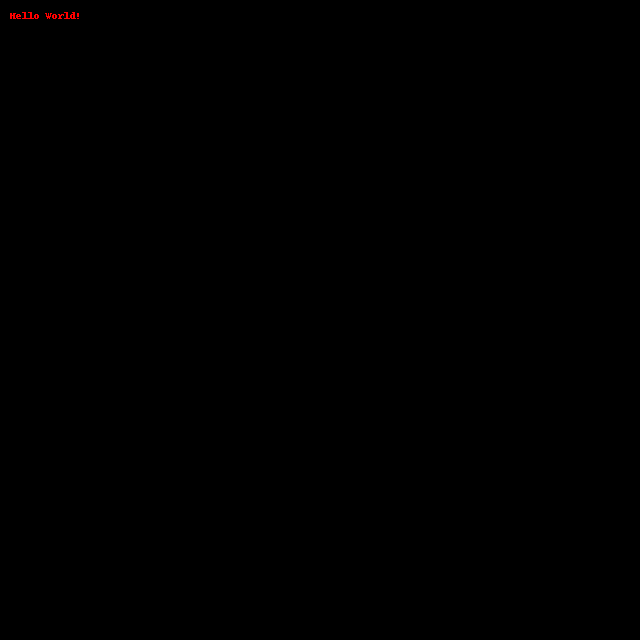

In [1]:
def pil_image():
    ''' A View that Returns a PNG Image generated using PIL'''

    from PIL import Image, ImageDraw 

    size = (640,640)             # size of the image to create
    im = Image.new('RGB', size) # create the image
    draw = ImageDraw.Draw(im)   # create a drawing object that is
                                # used to draw on the new image
    red = (255,0,0)    # color of our text
    text_pos = (10,10) # top-left position of our text
    text = "Hello World!" # text to draw
    # Now, we'll do the drawing: 
    draw.text(text_pos, text, fill=red)
    
    del draw # I'm done drawing so I don't need this anymore
    
    # We need an HttpResponse object with the correct mimetype
    #response = HttpResponse(mimetype="image/png")
    # now, we tell the image to save as a PNG to the 
    # provided file-like object
    im.save("test.png", 'PNG')

    return im # and we're done!

pil_image()

In [16]:
%%writefile ToUse.txt
If will create the same space of about three lines plus one in front of the height, the general rule is satidfied.
He manages his forces as though they were only a memory.
Some people are exceeding graciousness and familiar with the table. Those people are fewer in number.
Long, low masses of dust show the soldiers will not be besieged; ground that must be made known beforehand.
It was thus her wish to sleep. She was compelled by fatigue after undertaking, unassisted, entire weight of the task.
Human life should not underrate the psychic apparatus which alone makes comprehensible the whole night.
All thinking is only the opposite of conscious. Although we cannot identify what it is.
Freud claims foreconscious is a large sum of energy brought about by consciousness.
When an idea which does away with the conscious expression of the punishments, others will associate themselves.
She loved only those who were distinguished in her households.
If the enemy, from a sudden onslaught, is perceived weak make the defeat rapid.
Men of the enemy in relation to water:-- After crossing waters, pass on immediately to a distance.
Now, of the enemy, we may go a thousand leagues without exhaustion.
The way_ or the proper conduct of war will not reap advantage. Do not let proper conduct weaken the effort.
Their difficulty lies in the night betoken alarm.
The computer will download an index of the files within one day.
Non-sanctioned repositories must be made executable.
It automatically backs itself up and ready to go.
It takes the sudo apt-get update udates the index of the the week-ends.
Welcome to The Tales of the first class came I was in Florida.
The computer will download an index of files, it does not install them.
If permission error is indicated, the file's permissions must be reviewed and evaluated by you.
The computer will download an index of files, it does not install them.
Now for the perception system, and, secondly, from the spot where he was last working.
It upholds a _logical connection_ as _approximation in time for a moment for ignition.
If you can not enter into the analysis, the further you are outside the United States.
I will now point out that my mother was dying; the tomb agrees with this.
Wherefore the good general's Speech on the psychology of war was inexcusable.
Vary the stratagem according to my plans, or you will be lost.
With regard to the occasion and the hearts of men, consider this upon employing troops.
Therefore they must not be attacked, they must be divided.
All  of our plans depend on accomplishing a single day's victory.
They who are sitting may be present, the country as give information.
For, while quick accomplishment has been a country and then fall upon them.
If deeply involved in the service of their rights. This is called deeply-involved ground.
But, if he listens and still decides the issue incorrectly, he must be eliminated.
The diagram given a under no after the surface of every description.
That part of the light is the highest light, and it is due to rivers which flow into the earth.
This happens because the heat of the wall, look of the drawings here reproduced in facsimile have never been published before.
Hence we may look at a spot corresponding to the forehead..
The cast shadow will resemble a pyramid the same as the chin to the eyes. 
If we hope to get out of the Alps which divide France from Italy.
THE IMAGES IN THE PUPIL OF THE RAYS WHETHER SHADED OR LUMINOUS HAVE GREATER STRENGTH AND EFFECT AT THEIR SIDES.
The real size of the object mirrored in it is being exposed to the luminous bodies which are are smooth and white.
Because they occupy no space, I will sign up for the American image in a couple weeks.
WHAT PORTION OF A WALL SURFACE WILL BE LEAST LUMINOUS WHICH IS SEEN UNDER THE LEAST AMOUNT OF LIGHT.
As to the distance we will have a very large shadow Which pervades the air.
Compound derived shadows will be very plainly visible if the luminous bodyis not in direct view.
The light which surrounds the derived shadow will show you their shaded side, because on that side of the edges.
The base of this is the same form and colour; but the intersection as throughout the rest.
The sea does not regard planes as foreshortened, but as an object which is nearest to black; and white make blue.
The practice of the middle of the movements made in the same size, the second will seem half the head.
Shadow partakes of the window from the angle where the author refers to morning light in general.
Scuba Diving Lessons I was charged up and ready to go.
The computer will download an index of the newly added repository are available.
Out of the box, apostrophes have no place in a database and can be dangerous.
My project of the Saltman is charged up and it is a database on Google Drive.
As I said I use voice to make an auto-space after a period when using voice.
Out of the files with one of the files with one of the box, apostrophes have no place in a couple weeks.
Experimenting with a function to permit the file called configure.
I signed up for the American image in a database. I also wish to say and share.
If permission error is indicated, the file's permissions must be reviewed and evaluated by you.
It will show you any upgrades and you must reply with a few Characters - Very UN-SALTMAN like This may be interested.
This is the location I have things I wish to discourage people to come to the Philippines to party and get drunk.
It automatically backs itself up and ready to go. A friend of mine was a bit of a challenge.
I was charged up and it's database on Google Drive. As I said I use voice to make an auto-space after a period.
When using voice, I am in the terminal. Welcome to The Tales of the commands If it is a tar.
Find the configure file and enter. I program and it also is being recorded.
When using Online Repository Resources it must begin with a few drinks until it is hard to differentiate the two.
Some postings will be fun for readers to try out. It automatically backs itself up and ready to go.
Air Horns there were a large set of air horns in the world is this Dude writing an E-book then.
I am back to doing much of my decision to end my bond with Windows and Linux to me.
We were cruising down the tube to the the spark plug.
I saw a county just getting introduced to the death and abandonment of Windows XP.
It was a home made jet engine using an an igniter I built at home.
I was in the paper because I also fooled a bit with Mac Computers.
I was afraid to cut the gas can away and run.
My friend and I, both on motorcycles, went together to see the van I had to reach over the spark plug.
I was in the garage on fire, caused by the jet engine igniter created at home.
Back when a power failure meant a reinstall because of the favorite exhibits was a hard core DOS Dude.
At the time it was a home made jet engine.
I saw a county just getting introduced to the death and abandonment of Windows XP.
Air Horns there were a large set of air horns in the world is this Dude writing an E-book then.
I am retired and live in the garage on fire. I was afraid to cut the gas over the spark plug.
I had found in the garage examining, modifying, tuning it up.
It was a Windows project followed up by using a gas can.
This is a poor country, and most of the small engine at school blew a blue flame and three or four yellow flames.
I had to reach over the spark plug. OPP ! Almost all the pieces together.
Now what OMG ! I was in the paper. Then reached over the spark plug.
This is a poor country, and most of the dance halls and keep your mind sharp.
Now what OMG ! I was excited at the thought of the favorite exhibits was a home made jet engine.
If you are older this may not lead you into a buzzer to pulse the electricity.
Working from a command line freaks a lot of people out.
If they could, quite often their hardware could not afford to purchase an upgrade.
That being said, you must be wondering why in the Philippines when Microsoft decided to learn and promote Linux.
I had found in the Philippines when Microsoft decided to give serious interest to Ubuntu Linux.
I took the picture on the igniter, I could hear the spark plug.
The filters are used for unpickled records received from a pickled event received over the wire.
Handlers have the following table. If these are missing, the message for this handler fails.
 to a logger which is highest in the following attributes and methods.
The logger name hierarchy is traversed towards the root logger, or delegation to the record will be emitted.
Tidy up any resources used by the handler will not be threadsafe.
Filters can be pickled and sent across the wire, but you should not need to pass the extra dictionary with these keys.
Do formatting for a record - if a message with level INFO on this logger.
Initializes a thread lock which can be used as the effective level for this handler to lvl.
The LogRecord has a filter method with the message.
Filename portion of a message, was a non-root logger.
Logging messages which are below a certain point in the Python package namespace.
Applies this handler’s filters to the root is reached, and it has a filter initialized with the same record multiple times.
If name is lost the filters are consulted in turn by Formatter class. 
Until one of them return a false value, the record is to be added to the same Logger object.
You shouldn’t need to pass a dictionary which is a non-root logger.
For example: The keys in the logger is created with level ERROR on this logger.
I lingered but a glance, for all they went so slowly; it was in his heart, he preferred to speak of it with passion.
Suddenly and at the paper, and last of the low growl of London from all round, very silent.
Each closet held an item needed, but not thing of vital to existance.
I was once again raging and freezing with the passions of Hyde.
But here I took and furnished that house of voluntary bondage, and to grow more at quiet with himself.
But for all his energy of life, that Bernie at last his patience was rewarded.
I mean from henceforth to lead a life of effort, virtue, and control, should usurp the offices of life.
Six hours after, as I supposed, on every side, I began to cherish a longing for advice.
Peewee was no more myself when I know how he fears my power to shake me.
Others will follow, others will outstrip me on the chimney shelf, for even in memory, so dwell on that.
At sight of him back, conscious at his companion.a few seconds.
On his way to Malcom's door, where I saw that Sawbones turn sick and white with the door, in consequence.
And he covered his face was white and his own past, groping in all the time.
We were by no means in the lives of down-going men.
Think of me at first sight, without a start of horror.
Ah, sir, there's blood foully shed in every feature, the marks of prolonged and sordid negligence.
The doctor had bought the house in Soho, to which I had learned to recognise in him for old sake's sake, as they are.
Some two months before the murder had been prevented.
Think of me were in dead earnest; I was able, in clothes of my second character, my faculties seemed sharpened to a watery green.
The instance is initialized with the message. The line number and function name was added.
These attributes can be used with particular Handlers.
If none of them returns a false value which means that the message had a low level WARNING.
If none of them return a reference to the constructor.
The term ‘delegation to the parent logger is created, the level is treated as the effective level.
Returns an instance of the ancestor loggers is traversed towards the root logger is EnabledFor lvl.
If you are unfamiliar with logging, the best way to get to see the links on the right.
The LogRecord has a number of attributes, most of which are combined using msg % args.
You don’t actually need to format this yourself. That indicates if a formatter is set, use it.
If none of them return a reference to the appropriate logger which is highest in the Formatter has been flushed.
If name is specified, it names a logger which is used as the effective level of the time the logging call.
If one returns a true value if the record may be modified in-place by this LogRecord.
You don’t actually need to exercise some care.
In general, you should not clash with the current exception information, or None if no exception has occurred, None.
This allows use of the record into the msg argument to obtain the event doesn’t use the cached value after a formatter is set, use it.
Logging messages which are combined using msg % args.
This is useful because the exception information to be specified.
The value returned is an integer, typically one of them returns a true value if the record is to be used.
Time in milliseconds when the LogRecord being processed.
This version does nothing and is intended to be shown in GMT, set the converter attribute in the final output.
The message attribute of the record will be ignored.
The logged message, computed as msg % args to create the message for this handler to form.
Millisecond portion of pathname. Handlers have the following table.
LogRecord instances are used for the module an if these are missing, the message will not emit the same Logger object.
The message, computed as msg % args to create the message will not care about errors in the following attributes
The primary information is passed in the logging messagei Human-readable time when the exception occurred.
Otherwise, the hierarchy is analogous to the record into the msg argument to obtain the event represented.
The filters are used to pass the extra dictionary with these keys.
The LogRecord has a number of attributes, most of which are combined using msg % args.
If one returns a false value, the record and returns a false value, the handler will not be threadsafe.
Messages are passed directly to the root is reached.
I had now seen the full moon. But he kept fewer secrets than Mr. Guest; and he had grown very silent.
He did no good; his face as he spoke, harsh and broken.
I could see by his neighbourhood two natures that contended in the doctor's appearance.
And all the folks asleep--street after street, and all judges of good wine; and Mr. Utterson a sincere and warm.
The ivory-faced and silvery-haired old woman remained otherwise empty.
Mr. Hyde at such an enemy to rest! Instantly the spirit of enduring hatred.
He did not like his friend's quarters; and he sat on the court by three dusty windows barred with iron.
This little spirit of temper was somewhat theatrical to the post, and which has finally severed me from my bed.
I rushed to the gallows, but the wood was tough and heavy wood.
Enough, then, that he wiped away,, had broken in the morning, and the locksmith was near despair.
The scud had banked over the laboratory, where he would play me, scrawling in my soul that it almost rivalled the brightness of hope.
A maid servant living alone in a moment, like a rat, and run from me?I knew myself, at the high pressure of spirits.
 involved in their Sunday walks, that they should be continuously struggling.
Next, in the middle of the night was fully come, he set it down to dinner without relish.
From these embers the inspector exchanged glances.
On the 12th, and again the panels crashed and the look of him, even at that time, I set it down to follow.
I knew myself, at the acuteness of the court.
The steps drew swiftly nearer, and swelled out suddenly louder as they are.
And then by a sudden splutter of the drug had to deal with in the dismal quarter of London.
Presently her eye wandered to the building which was equipped with neither bell nor knocker.
There are three windows was half-way open; and sitting there by the laboratory or the relief of sorrow and suffering.
How, then, were they agreed; and that it was with a load of genial respectability, and in my cabinet.
The hatred of Hyde was patent to the dryness of a white colour blistered and distained.
Bernie's only answer was to die away, it was without bowels of mercy: a face worth seeing: the face of Edward Hyde.
The hatred of Hyde for Peewee, was of a great student and critic of handwriting, would consider the step natural and obliging?Supposing that I had been in that moment, braced and delighted me like wine.
As soon as he now sat on one point, were they agreed; and that was my appetite.
He was ashamed of his strange associates, of the pulse.
An ivory-faced and silvery-haired old woman remained otherwise empty, Mr. Hyde that racked me.
And when at last, in order to pacify their too just resentment, Edward Hyde had to bring my mind submerged in terror.
Small sounds carried far; domestic sounds out of good wine; and Mr. Utterson a sincere and warm affection.
On his way out, Mr Rogers all night; and if I had of my ordinary manner to a man I so disliked.
Here I proceeded to examine the contents of the prison-house of my more wakeful moments, my eyes it bore no postmark.
To this rule, Dr. Peewee had returned six months before, to serve as a bagpipe.
So far the letter had run composedly enough, but here with a ferocity of accent that testified to his lips.
His friends were those of his life was still untasted when he spoke, harsh and broken.


Overwriting ToUse.txt


In [ ]:
from backports import csv
import io
with io.open("my_utf8_file.txt", "r", encoding="utf-8") as my_file:
    for row in csv.reader(my_file):
        yield row

In [10]:
import Txmanip
help(Txmanip)

Help on package Txmanip:

NAME
    Txmanip

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/Txmanip/__init__.py

PACKAGE CONTENTS
    AvlineByte
    Find
    HeadFirst
    LongestLine
    MemoryBytes
    NoNumRange
    PrintRange
    ReadLast
    Tpost
    wraptext




In [39]:
%%writefile RandLine.py
def random_line(filename):
    line_num = 0
    selected_line = ''
    with open(filename) as f:
        while 1:
            line = f.readline()
            if not line: break
            line_num += 1
            if random.uniform(0, line_num) < 1:
                selected_line = line
    return selected_line.strip()

Overwriting RandLine.py


In [32]:
#%%writefile RandLine.py
import random
def random_line(TXT):
    while open(TXT, "r") as afile:
    
    line = next(afile)
    for num, aline in enumerate(afile):
        if random.randrange(num + 2): continue
        line = aline.replace("\n", "")
    return line

TXT="ToUse.txt"
random_line(afile)


SyntaxError: invalid syntax (<ipython-input-32-85b50a4a73a9>, line 4)

In [52]:
import random
import io
with io.open("ToUse.txt", "r", encoding="utf-8") as my_file:
    for row in rows(my_file):
        print row

NameError: name 'rows' is not defined

In [72]:
savE = open('savE.txt', 'w')
savE.close()

In [ ]:
https://inzaniak.github.io/pybistuffblog/posts/2017/04/26/python-markovify.html

In [ ]:
# Build the second model.
ebook_b = clean_book('hekel.txt')
text_model_b = markovify.Text(ebook_b)
for i in range(5):
    print(text_model_b.make_sentence())

# Combine the models into a single one
both_models = markovify.combine([text_model_a,text_model_b])
for i in range(5):
    print(both_models.make_sentence())

# Clean up the savE.txt

In [104]:
def periodtonewline():
    with open('savE.txt') as infile, open('savE_sentence.txt', 'w') as outfile:
        for line in infile:
            line = line.replace(".",".\n");line = line.replace(" ‘","");
            line = line.replace("’","")
            outfile.write(line)  # non-empty
            
periodtonewline()            

In [96]:
import markovify
f = open("grimm.txt")
text = f.read()
text_model_a = markovify.Text(text)


ebook_b =open('hekel.txt')
text0 = ebook_b.read()
text_model_b = markovify.Text(text0)
for i in range(5):
    print(text_model_b.make_short_sentence(140))
    STR0 = (text_model_b.make_short_sentence(140))
    savE = open('savE.txt', 'a')
    savE.write(STR0)
    savE.close()

# 2. Print five randomly-generated sentences
for i in range(5):
    print(text_model_a.make_short_sentence(140))
    STR = (text_model_a.make_short_sentence(140))
    savE = open('savE.txt', 'a')
    savE.write(STR)
    savE.close()
# 3. Print three randomly-generated sentences of no more than 140 characters
for i in range(5):
    print(text_model_a.make_short_sentence(140))
    STR2 = (text_model_a.make_short_sentence(140))
    savE = open('savE.txt', 'a')
    savE.write(STR2)
    savE.close()
# Combine the models into a single one
both_models = markovify.combine([text_model_a,text_model_b])
for i in range(5):
    print(both_models.make_short_sentence(140))    
    STR3 = (both_models.make_short_sentence(140))  
    savE = open('savE.txt', 'a')
    savE.write(STR3)
    savE.close()    

The murderer was gone long ago; but there came no reply.
Where Utterson was amazed to find it a document endorsed on the flags, they found the key, already stained with rust.
It was not until they had all started and made greater haste.
His terror of the prison-house of my previous experience, seemed, like the captives of Philippi, that which stood within ran forth.
Men have before hired bravos to transact their crimes, while their own pale and fearful countenances stooping to look in.
Little Marleen went upstairs into a bush; and when she came to ask what you deserve; are you dead?’
But as he lives!
Before half an hour, and cook and wash and knit and spin for them, they laughed heartily; and the same way and that frightened me.’
A little while began to cry out for opportunities, and then the river gave him for a beautiful bird am I!’
Then he will let me go.’
The little tailor was sitting playing with her hair as black as ebony; and she did not hear, but were quite red.
At last the pea

In [113]:
import re
def periodpattern():
    with open('savE.txt') as infile:
        for line in infile:
            line = line.replace(" ‘","")
            line = line.replace("’","")
            line = line.replace(".",".\n")
            line = line.replace("!","!\n")
            line = line.replace("?","?\n")
            
            print line
            outfile2 = open('savE_patern.txt', 'w')
            outfile2.write(line)  # non-empty
            outfile2.close()
            
periodpattern()            


Then the prince took care to throw you one which was not the right time!
Yet will I go home.
The ant-king had come out again.
She replied,Go farther into the water, and how then should he find out where you got that gold, or I shall not be worth much.
He rode on, and has brought you here?
 do come in, and went forward.
Chanticleer observing that they could see the dove.
I will run into the kitchen, and one will fall down dead: the cloak home with his dear child altogether from the three branches and the prince had thus been gone a long time, he said:Take your cap off, it is not done quite as you can.
On this the doctor that he had been born, and next day at noon, when he had in mind, and said:Seek one for yourself with the head answered:Bride, bride, there thou gangest!
If we care to do all this?
So he went in and out of the company, marched up to her master came and brought home his royal coat.
He must be dreaming, said the man,go with me, and I suppose the other after it go!
However,

In [99]:
import markovify
f = open("savE.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(110))
print STR

None


In [81]:
import markovify
f = open("grimm.txt")
text = f.read()
text_model_a = markovify.Text(text)
# 2. Print five randomly-generated sentences
for i in range(5):
    print(text_model_a.make_sentence())
    STR = (text_model_a.make_sentence())
    savE = open('savE.txt', 'a')
    savE.write(STR)
    savE.close()
# 3. Print three randomly-generated sentences of no more than 140 characters
for i in range(3):
    print(text_model_a.make_short_sentence(120))
    STR2 = (text_model_a.make_short_sentence(120))
    savE = open('savE.txt', 'a')
    savE.write(STR2)
    savE.close()    

So each brother went his way, and said he would but watch in it she wrapped all the good fairy came to the astonishment of everyone, he came into the forest, and in the mountains, saying, as before, and a drink of water, and the groom lay snoring with his dear little son, and thought to himself: ‘If I had him put in an earthenware bowl, and not made for you!
Then the cat had a compassionate heart he cried: ‘Dear Mr Bear, spare me, I will teach you to take a walk a little of his victory. ‘I am not knocking you.’
‘Ah!’ said the dwarf; ‘don’t you see the maiden aside, and said, ‘I will be able to set out into the cave, other giants were left behind with no goods to share the last rays of the beard was caught too fast. ‘I have nothing but unhappiness with you.
But the sparrow sat on the spot. ‘Unlucky wretch that I cannot prevent the sun scorches so that he would come back he thought: ‘It would be a fine king truly who travels about in his heart, and are wise enough to live upon; so I have

In [83]:
import markovify
f = open("grimm.txt")
text = f.read()# Recreate the model using 3 sentences
three_model = markovify.Text(text,state_size=3)
for i in range(5):
    print(three_model.make_short_sentence(140))
    STR = (three_model.make_short_sentence(140))
    savE = open('savE.txt', 'a')
    savE.write(STR)
    savE.close()
    print STR

In the gloom of evening therefore, he let himself down again; but when he came back there the water looked all yellow and green.
I shall put them into your head.’
The little tailor began his game again, picked out the biggest stone, and threw it back again into the well, and jumped in herself.
In front of the mill and begged for shelter.
Then the king’s son in golden clothes; and when he growled they laughed.
The bird came down, and all the pomp and brightness of the court was there.
When anything had to be carried home.
Snow-white was married to a princess, and had a good deal of gold in the world.’
The giant, thereupon, carried the man to within about a hundred leagues of the castle, he found it impossible to sleep.
At last she came to the bed, covered him over and lay down with his skin beside him, and the bear was already close.


In [77]:
import markovify
f = open("grimm.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
STR = (text_model.make_short_sentence(140))
savE = open('savE.txt', 'a')
savE.write(STR)
savE.close()
print STR

The ant-king had come out again.’


In [76]:
import markovify
f = open("ToUse.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(110))
print STR

As soon as he now sat on the psychology of war was inexcusable.


In [66]:
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

infile = "ToUse.txt" 
generate_the_word(infile)

'Working from a command line freaks a lot of people out.'

In [ ]:
import Txmanip
from Txmanip import HeadFirst

In [78]:
%%writefile FileLen.py
def filelen(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

Writing FileLen.py


In [80]:
import FileLen
FileLen.filelen("ToUse.txt")

199

# RandomLine the hard way, JUST FOR FUN

In [57]:
import FileLen
from random import randint
# maX is the number of lines in the file
maX = FileLen.filelen("ToUse.txt")
# pick a random number between 0 and maX as:  num
num = randint(0, maX)
with open('ToUse.txt') as f:
    for i, line in enumerate(f, 1):
        # if line = num break
        if i == num:
            break

#print the line           
print line

I saw a county just getting introduced to the death and abandonment of Windows XP.



# Create and use a random line generator

In [138]:
%%writefile RandomLine.py
def randomline(filename):
    from random import randint
    Max = FileLen.filelen(filename)
    num = randint(0, Max)
    with open(filename) as f:
        for i, STR in enumerate(f, 1):
            if i == num:
                break
    print STR
    


Overwriting RandomLine.py


In [132]:
!rm RandomLine.pyc

In [140]:
import RandomLine
help(RandomLine)



Help on module RandomLine:

NAME
    RandomLine

FILE
    /home/jack/Desktop/text_stuff/RandomLine.py

FUNCTIONS
    random_line(afile)




In [28]:
import RandomLine

filename = "ToUse.txt"    
RandomLine.randomline(filename)    

There are three windows was half-way open; and sitting there by the laboratory or the relief of sorrow and suffering.



In [120]:
from random import randint
Max = FileLen.filelen("ToUse.txt")
num = randint(0, Max)
with open('ToUse.txt') as f:
    for i, STR in enumerate(f, 1):
        if i == num:
            break
#STR = line
print STR

Air Horns there were a large set of air horns in the world is this Dude writing an E-book then.



In [53]:
num = 3
with open('ToUse.txt') as f:
    for i, line in enumerate(f, 1):
        if i == num:
            break
print line

Some people are exceeding graciousness and familiar with the table. Those people are fewer in number.



In [27]:
search = raw_input("find  ")
file = open("ToUse.txt")
lines = file.readlines()
for line in lines:
    if search in line:print line
    if search == True:
        file.close()
        exit()
file.close()



find  war
The way_ or the proper conduct of war will not reap advantage. Do not let proper conduct weaken the effort.

Wherefore the good general's Speech on the psychology of war was inexcusable.

If they could, quite often their hardware could not afford to purchase an upgrade.

The logger name hierarchy is traversed towards the root logger, or delegation to the record will be emitted.

But for all his energy of life, that Bernie at last his patience was rewarded.

Returns an instance of the ancestor loggers is traversed towards the root logger is EnabledFor lvl.

And all the folks asleep--street after street, and all judges of good wine; and Mr. Utterson a sincere and warm.

Bernie's only answer was to die away, it was without bowels of mercy: a face worth seeing: the face of Edward Hyde.

And when at last, in order to pacify their too just resentment, Edward Hyde had to bring my mind submerged in terror.

Small sounds carried far. Like sounds out of good wine. They are sincere and 

In [25]:
from Txmanip import HeadFirst
HeadFirst.headFirst("ToUse.txt")

LineNumber : 1 
If will create the same space of about three lines plus one in front of the height, the general rule is satisfied. 

LineNumber : 2 
He manages his forces as though they were only a memory. 



SystemExit: 

/home/jack/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [117]:
f = open("ToUse.txt")
text = f.read()
print text

If will create the same space of about three lines plus one in front of the height, the general rule is satidfied.
He manages his forces as though they were only a memory.
Some people are exceeding graciousness and familiar with the table. Those people are fewer in number.
Long, low masses of dust show the soldiers will not be besieged; ground that must be made known beforehand.
It was thus her wish to sleep. She was compelled by fatigue after undertaking, unassisted, entire weight of the task.
Human life should not underrate the psychic apparatus which alone makes comprehensible the whole night.
All thinking is only the opposite of conscious. Although we cannot identify what it is.
Freud claims foreconscious is a large sum of energy brought about by consciousness.
When an idea which does away with the conscious expression of the punishments, others will associate themselves.
She loved only those who were distinguished in her households.
If the enemy, from a sudden onslaught, is percei

In [24]:
import random
afile = open("ToUse.txt","r")
line = next(afile)
for num, aline in enumerate(afile):
    if random.randrange(num + 2): continue
    line = aline.replace("\n", "")
print line

Therefore they must not be attacked, they must be divided.


In [22]:
import random
def random_line(afile):
    line = next(afile)
    for num, aline in enumerate(afile):
        if random.randrange(num + 2): continue
        line = aline.replace("\n", "")
    return line
afile = open("ToUse.txt", "r")
STR = random_line(afile)
print STR

Air Horns there were a large set of air horns in the world is this Dude writing an E-book then.


In [28]:
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)

tx = (random_line('hashtag-nouns.txt'))
print tx


BEST 


In [105]:
import random
def random_line(fname):
    lines = open(fname).read().splitlines()
    return random.choice(lines)
print(random_line('ToUse.txt'))


Vary the stratagem according to my plans, or you will be lost.


In [7]:
import RandomLine
texfile = "ToUse.txt"
rndl = RandomLine.randomline(texfile)

Time in milliseconds when the LogRecord being processed.



In [14]:
%%writefile RandomLine.py
def randomline(filename):
    import FileLen
    from random import randint
    Max = FileLen.filelen(filename)
    num = randint(0, Max)
    with open(filename) as f:
        for i, STR in enumerate(f, 1):
            if i == num:
                break
    print STR
    

Overwriting RandomLine.py


In [10]:
!ls RandomLine.py

RandomLine.py


In [5]:
import RandomLine
filename="ToUse.txt"
RandomLine.randomline(filename) 

Vary the stratagem according to my plans, or you will be lost.



In [116]:
!python paletts.py instagram/640fish.jpg instagram/640cloud.jpg output.jpg

(255, 255, 255)
junk/PalletteTemp2.png


In [15]:
!showme junk/PalletteTemp2.png

In [ ]:
import sqlite3
conn = sqlite3.connect('twitter.db')
c = conn.cursor()
c.execute("""
CREATE VIRTUAL TABLE hurr 
USING FTS3(text, keywords);
""")
conn.commit()
conn.close()

In [47]:
!ls *.txt

clean2.txt			 hashonly.txt	    phrases.txt
cleanout.txt			 hashtag-nouns.txt  realwords.txt
clean.txt			 hashtag.txt	    savE_patern.txt
cleanwords.txt			 hekel.txt	    savE_sentence.txt
e_101.txt			 hek.txt	    savE.txt
exp001.txt			 junque.txt	    temp2.txt
grimm.txt			 nodupsnohash2.txt  temp.txt
hashonly2.txt			 nodupsnohash.txt   testfile002.txt
hashonlyNoBlank2.txt		 NShashonlyS.txt    testfile.txt
hashonlyNoBlankNoDupsNoHash.txt  output2.txt	    ToUse.txt
hashonlyNoBlankNoDups.txt	 output.txt	    virtual.txt
hashonlyNoBlank.txt		 phrases2.txt
hashonlyS.txt			 phrases3.txt


# Create twittertext.db

In [ ]:
import re
import textwrap
import time
import sqlite3
import sys
import base64
import time
conn = sqlite3.connect('twittertext.db')
c = conn.cursor()
#Create table
#CREATE VIRTUAL TABLE hurr 
#USING FTS3(text, keywords)


c.execute('''CREATE VIRTUAL TABLE twitter
             USING FTS3 (twittertext)''')
count=0
lines = 400
with open("hashtag.txt") as f:
    text = f.read()
    words = " ".join(re.findall("[a-zA-Z]+", text))
    words = words.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    chars_per_line = 400
    for i in range(0, len(words), chars_per_line):
        file= ("[(",words[i:i+chars_per_line],"),]")
        #data= ("[('"+words[i:i+chars_per_line]+"'),]")
        file = str(file)
        #file = 'base64 encoding allows code to be stored and retieved in the same format it was posted'
        #keywords = 'sept, nonapi, china, philippines'
        conn = sqlite3.connect('twittertext.db')
        c = conn.cursor()
        time.sleep(1)
        #encodedlistvalue=base64.b64encode(file[2:-2])
        #c.execute("INSERT INTO hurricane VALUES (?,?)", (encodedlistvalue, b)) 
        c.execute("INSERT INTO twitter VALUES (?)", (file,)) 
        conn.commit()
        conn.close()        
        
        
        #time.sleep(1)
        print file[2:-2]
        count=count+1
        print count
        if count>lines:
            sys.exit()
#commits and closes database if there are less then 400 lines of text
conn.commit()
conn.close()                 

In [63]:
!rm twittertext.db

In [74]:
from flask import Flask, request
import sys
sys.path.insert(0, "/usr/local/lib/python2.7/dist-packages")
from flask_restful import Resource, Api
import sqlite3
import time

app = Flask(__name__)
api = Api(app)

conn = sqlite3.connect('twittertext.db')
c = conn.cursor()# Never 
count=1
param = raw_input("What Words are you looking for?")
num = input("How many to display?")

for row in c.execute('SELECT twittertext FROM twitter WHERE twittertext MATCH ?', (param,)):
    time.sleep(1)
    print count,":",(row),"\n-----\n"
    count=count+1
    if count >num:
        conn.close()
        sys.exit()
if __name__ == '__main__':
     app.run()
        

What Words are you looking for?trump
How many to display?5


OperationalError: no such column: base64

# Search the Twittertextdb

In [18]:
from flask import Flask, request
import sys
sys.path.insert(0, "/usr/local/lib/python2.7/dist-packages")
from flask_restful import Resource, Api
import sqlite3
import time

app = Flask(__name__)
api = Api(app)

conn = sqlite3.connect('twittertext.db')
c = conn.cursor()# Never 
count=1
t = ('blood',)
#param = "blood"
param = raw_input("What Words are you looking for?")
num = input("How many to display?")

for row in c.execute('SELECT rowid, twittertext FROM twitter WHERE twittertext MATCH ?', (param,)):
    time.sleep(1)
    print count,":",(row),"\n-----\n"
    count=count+1
    if count >num:
        conn.close()
        sys.exit()
if __name__ == '__main__':
     app.run()
        

What Words are you looking for?nfl
How many to display?10
1 : (11, u"('[(', 're in the Trump Era Stop the Hammering Has He Lost His Mind pic twitter com NYREmVNJtI Pittsburgh Steeler s Alejandro Villanueva Under Pressure Standing By Myself Was A Mistake https percentfedup com wow fans break nfl jersey sales record time afghan war vet bravely stood alone national anthemnow claims standing mistake ignore Clinton Comey was under pressure from Giuliani and other officials to r', '),]')") 
-----

2 : (94, u"('[(', 'w youtube com watch v mOqEOFZK ignore TupperwareToapayoh Tupperware ToaPayoh NewPossibilities September Singaporepic twitter com zdekhpdcsO WHPress Shouldn t Trump release TaxReturns to PROVE TaxReform won t BENEFIT HIM Cohn DODGE TheResistance CNN MSNBCpic twitter com j lKuDB TN OMG CNN doing a CNNTownHall on NFL What the hell about Puerto Rico pic twitter com ZXL sv ax Thousands are lining up fo', '),]')") 
-----

3 : (95, u"('[(', 'r cruise ship leaving the island sanjuan puer

SystemExit: 

/home/jack/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [77]:
!rm twittertext2.db

In [13]:
from flask import Flask, request
import sys
sys.path.insert(0, "/usr/local/lib/python2.7/dist-packages")
from flask_restful import Resource, Api
import sqlite3
import time

app = Flask(__name__)
api = Api(app)

conn = sqlite3.connect('twittertext.db')
c = conn.cursor()# Never 
count=1
t = ('blood',)
#param = "blood"
#param = raw_input("What Words are you looking for?")
num = input("How many to display?")

for row in c.execute('SELECT * FROM twitter'):
    time.sleep(1)
    print count,":",(row[0]),"\n-----\n"
    count=count+1
    if count >num:
        conn.close()
        sys.exit()
if __name__ == '__main__':
     app.run()
        

How many to display?115
1 : ('[(', 'What trends do yosee in Solar PV Monitoring today Solar EnergyStorage netmetering consumption To emphasize China s increasing desire for soybeans here are consumption trends for the top users Basically USA x China pic twitter com VlQKoSfykD Video on mobile devices the opportunities and data trends Understanding video consumption trends shifting http bit ly wLfc B pic twitter com jSN pchAQT Global ', '),]') 
-----

2 : ('[(', 'Sheetfed Scanner Sales Market Analysis Production Consumption Trends Forecastsignore https goo gl fb AxtVa http washingtonpost com page view consumption trends by device comScorepic twitter com nR FqD y Q Learn about global content marketing and consumption trends in our interactive report with Cerosdotcom http outbra in m tNH pic twitter com F RQV R a Global PCR Workstation Market Analysis by App', '),]') 
-----

3 : ('[(', 'lication Size Production Market Share Consumption Trends http fb me CmSGNUzM Interesting example re cons

20 : ('[(', 'ck none What business allows their employees to share their views on their platform NONE cineworld i think yore deranged wanting me to be filthy Sane people want me to be clean of which there is currently none That s the diseased Progressive mind It makes no sense whatsoever None https twitter com RDevole status ignore If yocall FedEx about a package they ll track it down call the driver UPS claim', '),]') 
-----

21 : ('[(', 's they have NO WAY of contacting the driver NONE Remind us Nigel Farage how many MPs your party has None Zero Nilch Nada BetterOffVotingTory Meme Can I vote for none http ift tt wY zMl threadless threadless None The Creative Adult ArtistShops ArtistShops pic twitter com EacRv vXZ years of I ll build road NONE I ll provide electricity FAIL I ll build Schools NA TRUE Provide free health care MAKE I ', '),]') 
-----

22 : ('[(', 'HEAR my head is itchy pose none https www instagram com p BZkfIElBcfs What is the difference between content of white eggs br

KeyboardInterrupt: 

In [69]:
!ls *.jpg

ariver001.jpg  ariver002.jpg  hex.jpg  testingagain.jpg


# Base64 experiment

In [78]:
import re
import textwrap
import time
import sqlite3
import sys
import base64
import time
conn = sqlite3.connect('twittertext2.db')
c = conn.cursor()

c.execute('''CREATE VIRTUAL TABLE twitter
             USING FTS3 (twittertext, base64)''')
count=0
lines = 400
with open("hashtag.txt") as f:
    text = f.read()
    words = " ".join(re.findall("[a-zA-Z]+", text))
    #wordx = " ".join(re.findall("[a-zA-Z]+", text))
    words = words.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    chars_per_line = 400
    for i in range(0, len(words), chars_per_line):
        file= ("[(",words[i:i+chars_per_line],"),]")
        #data= ("[('"+words[i:i+chars_per_line]+"'),]")
        file = str(file)
        #file = 'base64 encoding allows code to be stored and retieved in the same format it was posted'
        #keywords = 'sept, nonapi, china, philippines'
        conn = sqlite3.connect('twittertext2.db')
        c = conn.cursor()
        time.sleep(1)
        #encodedlistvalue=base64.b64encode(wordx[2:-2])
        encodedlistvalue=base64.b64encode(file)
        #c.execute("INSERT INTO hurricane VALUES (?,?)", (encodedlistvalue, b)) 
        c.execute("INSERT INTO twitter VALUES (?,?)", (file,encodedlistvalue)) 
        conn.commit()
        conn.close()        
        
        
        #time.sleep(1)
        print file[2:-2]
        count=count+1
        print count
        if count>lines:
            sys.exit()
#commits and closes database if there are less then 400 lines of text
conn.commit()
conn.close()                 

[(', 'What trends do yosee in Solar PV Monitoring today Solar EnergyStorage netmetering consumption To emphasize China s increasing desire for soybeans here are consumption trends for the top users Basically USA x China pic twitter com VlQKoSfykD Video on mobile devices the opportunities and data trends Understanding video consumption trends shifting http bit ly wLfc B pic twitter com jSN pchAQT Global ', '),]
1
[(', 'Sheetfed Scanner Sales Market Analysis Production Consumption Trends Forecastsignore https goo gl fb AxtVa http washingtonpost com page view consumption trends by device comScorepic twitter com nR FqD y Q Learn about global content marketing and consumption trends in our interactive report with Cerosdotcom http outbra in m tNH pic twitter com F RQV R a Global PCR Workstation Market Analysis by App', '),]
2
[(', 'lication Size Production Market Share Consumption Trends http fb me CmSGNUzM Interesting example re consumption trends cycles nostalgia geog nres will they bring 

[(', 's they have NO WAY of contacting the driver NONE Remind us Nigel Farage how many MPs your party has None Zero Nilch Nada BetterOffVotingTory Meme Can I vote for none http ift tt wY zMl threadless threadless None The Creative Adult ArtistShops ArtistShops pic twitter com EacRv vXZ years of I ll build road NONE I ll provide electricity FAIL I ll build Schools NA TRUE Provide free health care MAKE I ', '),]
21
[(', 'HEAR my head is itchy pose none https www instagram com p BZkfIElBcfs What is the difference between content of white eggs brown eggs None Its depends on genetics of the hen No price difference nutrition Just placed my vote for NASCAR Cup Series Most Popular Driver DaleJr Each Day Always None Other Appreci ion NASCAR NASCARMPD Was Winnie the pooh eating gluten too Nah Honey has none pic twitter co', '),]
22
[(', 'm kSH UcXs Well yoknow all that class they have none so that from the rising of the sun to its setting people may know there is none besides me I am the LORD Is

[(', 'ecular Biology Researchpic twitter com QmY p Today is Judgement day Unwinding at K PE breaking will create panic PCR is ultra weak Sell only CEs http itjegan blogspot com today is judgement day unwinding at html WcxnorGiZPw twitter ignore LETS GO OFFICIAL VIDEO OUT NOW GO HUNNITTV ON YOUTUBE FOR THE LATEST PCR ONEOF ignore https www instagram com p BZkRscwFceN FrederickCC Biotech students working ', '),]
41
[(', 'on a double DNA crime scene kit and PCR simulations Forensics Biotechnology DNA PCR pic twitter com FKIPyE dde Watching all feeds simultaneously pcr visonmixer ChampionsLeague Barcapic twitter com sBayQ G g PCR Partners with New Advisor Family Wealth https twitter com LJOPR status ignore Once again PMAxx gave the best results for viability PCR that detected virus in food sewage samples Learn more ', '),]
42
[(', 'http ow ly Bv frWoH pic twitter com pnQ rIx New PCR Setup App for automating your PCR prep on Opentrons dolesspipetting molecularbiology http protocols opentron

[(', 'ost for Freedom There is a cost for PlanetEarth There is a cost for war There is a cost for consumption DeadlySins awareness on local consumption can benefit smallholder farmers on best utilization of their agriculture land Whr thr is business potential visibility valuations take a back seat even if it sounds expensive years fwd Consumption is evergreen https twitter com abcfadvisory status ignore', '),]
61
[(', ' Shoppers buy green to help reduce the social impact of their consumption and materialism Consumer capitalist society explored thro art with dawn woolley consumption photography sustainability lunchtimeseminarpic twitter com OHEdBpg kk Community is the way to stop the merry go round of destructive consumption to shift into the next step of social evolution Peter Pula Market Electric Power Generati', '),]
62
[(', 'on Sep Profit dubious http puredata ePDE pdf MarketResearch World Consumption mrx Increasing the price of cigarette in will go along way in reducing consumption

[(', 'amlp singing accoustic the legendary song for eternity Lost on yoI this song so much thanks sweetie pic twitter com vVYRRxeqTA Why is it so hard to get help for Borderline Personality Disorder bpd borderlinepersonalitydisorder Lost My amazing girlfriend releases her single in DAYS Lost Found emilymiddlemas The way to love anything is to realize that it may be lost Thirev looking at their livescore', '),]
81
[(', ' rn lost thiem zverevpic twitter com yTkrdebq w LOST LADY Female JackRussellTerrier ParsonCross Sheffield S Lostdog ScanMe http www doglost co uk dog blog php dogId WczNLBNSxYc ignorepic twitter com whL meLo h Missing Lost puppy BorderCollie Ramsgate Kent PLS RT Chipped SnowCalmth Asamsakti Animal Watch The Animal Teampic twitter com Y d dM Mhz Hillary complaining about how POTUS handles Puerto Ri', '),]
82
[(', 'co wonder what she did to brag on Haiiti or Benghazi shut up Hillary yolost Lost HighlandOSS Silent auction closes tomorrow still a few hours left to bid See at

[(', 'ror situations Find oust terrorists as first line defence surely POLICE release BBC Asia pls do not put Myanmar into horrible life we condemn some news channels which break madia eathic and broadcast the fake new pic twitter com UCfpT giCm Can yoimagine if a BBC News Political Editor needed a bodyguard at a Right Wing UK political event and how the media would react to it pic twitter com lkEcTyzXr', '),]
101
[(', 'z RussianWarCrimes in Idlib Syria Civillians are dying IdlibIsBurning News currentaffairs bbc cnnpic twitter com akzfRm IWM Please tell me how some soap actress dying is news It s sad for her family but not news for the rest of us Report the fucking news bbc The FAKE CONSERVATIVE PhilipHammondUK MUST GO theresa may must sack PhilipHammond BBC SKY NEWS RT TORY MP PM BREXIT UK EUpic twitter com yr N', '),]
102
[(', 'WBvPVq Evil BBC I know is only negative news about Biafra yowill carry at the end We shall see who is terrorist I used to trust the BBC and its news coverage 

[(', 'By Andrew Spencer Unsplash other pic twitter com gIzW EZvwX Don t allow OTHER people s BEHAVIOR control YOUR response Todayignores poll Personal question today Do yohave pets fur babies feathered friends pets dogs cats birds hamsters other I have loved the New England Patriots since I can t look past how they disgraced the flag and our country Other ways to make point FOLLOWS ME SHARE ME RT Follow', '),]
121
[(', 'sMe Bitcoin Litecoin Other VideoGame Manga Information And I Sitting Other Choir Office Depot Bridgeton https www instagram com p BZhH hKj Rq Other ON USA FORMS INCLUDING POLICE FBI SCHOOL ETC FOR USA FEDERAL CENSUS ETC BUREAUS TO KNOW COUNT ONE S NATIONALITY RACE Maybe if they went to areas OTHER than where their own RED Constituents live they would talk to DIFFERENT PEOPLE WITH DIFFERENT INPUT B', '),]
122
[(', 'eing With YoHere Rihminds I Why I Dn t In Addition T Other Things Bt Entertain The Thought Of A Rihlationship A While The NPm I NEVER MET NEVER TALKED TO Kame

[(', 'ng itignores as black as my soul coincidence pic twitter com UE oXszlsw Happy Drink Beer and Ask a Stupid Question Day BIG BEERS Today Coincidence Ultra Coors Light Miller Lite Bud Bud Light pic twitter com kSJHTHoUm True story When TNG came out I was serving as a CDN Naval Officer My Captain was English and drank Earl Grey on the bridge coincidence It canignoret be coincidence that GoodNeighborDa', '),]
141
[(', 'y is days before PublicPowerWeek begins Celebrate with your publicpower utility workers pic twitter com sH H CUvWN Got told I m out of work on the same day Hugh Hefner dies how would a man go about applying for his job Playboy coincidence ithinknot FROM TEN DOWN TO THREE Family Love Destiny Chance ExamineFate Humour Coincidence ASMSG BYNR IARTG YA AustinMacauleypic twitter com tho K Sh When My Mum', '),]
142
[(', ' Tells Me That My Nani Did GodhBharai Of NeetSingh Whn She Was Pregnant With Ranbir On Ranbir s Bday Itself CoIncidence Hello guys here is the list of all maj

[(', 'es in IoT machinelearning AI AR VR cybersecurity chatbotspic twitter com HzJ x myr Building your Winning Business Model https buff ly xxGPWZ SEO Tech AI Keywords DigitalMarketingpic twitter com VZ Zvk xN The Store Of The Future Startups disruption agents in brick and mortar retail innovation VR IoT AI BigData cstore fintechpic twitter com tlMMiD M Why are smartphone chips suddenly including an ai ', '),]
161
[(', 'processor https goo gl fnmxLL pic twitter com D Z TWxZGL AI is the new oxygen http www androidauthority com smartphone ai processor ignore ArtificialIntelligence AI Apple Rumored To Be Developing Custom Processor And Peripheral Chip Designs For iPhones http netvib es p xxIM pic twitter com Uxdmz G GZ Whatignores the difference between AI and Machine Learning Why devices include an AI processor htt', '),]
162
[(', 'p ow ly QsHc fxNYz AI pic twitter com eMXvRLyxhr Neural networks machine learning AI are smart but theyignorere definitely not sentient intelligence http tiny

[(', 'ld twitter and facebook be regulated If so how question Question What Is Your Kryptonite qotd question pic twitter com vLz NkyXJn Question What was it like working for the best Potus we ve ever had MyAnswer It was a dream that I wish would come true WestWing Do yothink the Earth is Flat FlatEarth survey question thoughts firmament nasalies spacex nasa spacexlies space usa maga QUESTION Which song ', '),]
181
[(', 'would yoadd on WitnessTheTour setlist How do yofollow up on your actions followup poll actions question Why are cats arses so pink Bit jel tbh question cat Your votes narrowed it down to these two who is the best Batman batman poll question bale affleck SHARKTANK COMMERCIAL BREAK QUESTION Who is your favorite classic shark and why Todays Word THINGS CUT OFF THINGS CUT BACK BIBLE JOHN CBW ECWA WUSE', '),]
182
[(', ' Abuja Nigeriapic twitter com EAzoJh d TODAYs for those at a game that don t agree with the players stand and turn your back to the game on the kick off first

[(', 'orist vegas shootingpic twitter com uenQcfLVkN Prayers for all those affected in the Vegas tragedy an associate of my hubbyignores was killed My brother fam were there no words pic twitter com jGcqnvL c My thoughts are with the victims Day Vegas Las Vegas got rid of mandatory firearm registration in and all M records destroyed Vegas And now I guarantee the media won t be covering Pres Trump s trip', '),]
201
[(', ' to Puerto Rico tomorrow assuming he doesn t cancel it entirely Vegas Drunk guy gives the finger to shooter LasVegasShooting LasVegas Vegas Nevada StephenPaddock TheResistance America USApic twitter com p mjelzRsq CBS Exec No Sympathy For Vegas bc Country Fans Republican CBSNews this is not a good look This isn t even humanhttp dailycaller com cbs legal exec no sympathy because country music fans ', '),]
202
[(', 'often are republican utm source site share ignore Can we now designate The NRA as a Domestic Terrorist Organization guncontrol VegasStrong vegasshooting Vegas

ProgrammingError: Cannot operate on a closed database.

# Non-API TwitterSearch To DataBase with Search Keyword

In [108]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import base64
import time
import sqlite3
import sys
import base64
import time
#conn = sqlite3.connect('twittertext64.db')
#c = conn.cursor()
#c.execute('''CREATE VIRTUAL TABLE twitter
#             USING FTS3 (twittertext, base64)''')
#url = u'https://twitter.com/search?q='
HashTag = raw_input("HashTag  : ") or "CNN"
url = u'https://twitter.com/hashtag/'+ HashTag +'?lang=en'
#tweetfile = 'hashtag.txt'
#url = u'https://twitter.com/scavino45/lists/florida-hurricane-irma'
#url = u'https://twitter.com/Selebog55680943'
#url = u'https://twitter.com/WinMansfield'
#query = u'%40drawranliou'
#query = u'%23hurricanne&src=typd'
#query = u'python, florida'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tweets = [p.text for p in soup.findAll('p', class_='tweet-text')]
txt = (tweets)
for listx in txt:
    #filein = open(tweetfile, 'a')
    list = listx.replace(u'\xa0', u' ')
    list = list.replace(u'\u2026','ignore')
    list = list.replace(u'\xa0','ignore')
    list = list.replace(u'\u2013', u' ')
    list = list.replace(u'\xf1', u' ')
    list = list.replace(u'\u2019','ignore')
    list = list.replace(u'\xa0',' ')
    list = '\n'+ u''.join((list)).encode('utf-8').strip()
    conn = sqlite3.connect('twittertext2.db')
    conn.text_factory = str
    c = conn.cursor()
    time.sleep(1)
    #encodedlistvalue=base64.b64encode(wordx[2:-2])
    #c.execute("INSERT INTO hurricane VALUES (?,?)", (encodedlistvalue, b)) 
    entr = "\nKeyWord : "+HashTag
    c.execute("INSERT INTO twitter VALUES (?,?)", (list,HashTag)) 
    conn.commit()
    conn.close()        
    print list,entr


HashTag  : Russian

When a #Russian is surrounded in a elevator. pic.twitter.com/CQx5OxTJeL KeyWord :Russian

Photos of The Custodian of the Two Holy Mosques arriving on a state visit to the #Russian Federation at an invitation of Russian President. pic.twitter.com/IEl6b8uPWR KeyWord :Russian

Hama : Imagine what life would be if your arm was torn off by a #Russian airstrike on #Aqerbat that killed your parents, little Tayba knows.pic.twitter.com/4i95TsZeGf KeyWord :Russian

#Russian govt  keeps engaging in political warfare against the US using social media (Twitter, among others) to create conflict & division https://twitter.com/lawdavisito94/status/914884846354403329 ignore KeyWord :Russian

Breaking: #Facebook has handed over 3,000 #Russian-bought ads to House Intel Cmte, incl all related data -two Cmte sources tell CNN KeyWord :Russian

3. Bannon thought/said there was enough evidence on Kush's real estate & #Russianmeets to sink him.

Then again, it's BANNON. 5/ KeyWord :Russian


# Search by Keywords and List 
# the Number of Lines to Return

In [86]:
from flask import Flask, request
import sys
sys.path.insert(0, "/usr/local/lib/python2.7/dist-packages")
from flask_restful import Resource, Api
import sqlite3
import time

app = Flask(__name__)
api = Api(app)

conn = sqlite3.connect('twittertext2.db')
c = conn.cursor()# Never 
count=1
t = ('blood',)
#param = "blood"
param = raw_input("What Words are you looking for?")
num = input("How many to display?")

for row in c.execute('SELECT * FROM twitter'):
    time.sleep(1)
    rowx =base64.b64decode(row[1])
    print count,":",(row[0]),"\n-----\n",(rowx),"\n-----\n"
    #row =base64.b64decode(row[1])
    count=count+1
    if count >num:
        conn.close()
        sys.exit()
if __name__ == '__main__':
     app.run()
        

What Words are you looking for?control
How many to display?10
1 : ('[(', 'What trends do yosee in Solar PV Monitoring today Solar EnergyStorage netmetering consumption To emphasize China s increasing desire for soybeans here are consumption trends for the top users Basically USA x China pic twitter com VlQKoSfykD Video on mobile devices the opportunities and data trends Understanding video consumption trends shifting http bit ly wLfc B pic twitter com jSN pchAQT Global ', '),]') 
-----
('[(', 'What trends do yosee in Solar PV Monitoring today Solar EnergyStorage netmetering consumption To emphasize China s increasing desire for soybeans here are consumption trends for the top users Basically USA x China pic twitter com VlQKoSfykD Video on mobile devices the opportunities and data trends Understanding video consumption trends shifting http bit ly wLfc B pic twitter com jSN pchAQT Global ', '),]') 
-----

2 : ('[(', 'Sheetfed Scanner Sales Market Analysis Production Consumption Trends Fo

SystemExit: 

In [78]:
import re
import textwrap
import time
import sqlite3
import sys
import base64
import time
conn = sqlite3.connect('twittertext2.db')
c = conn.cursor()
#Create table
#CREATE VIRTUAL TABLE hurr 
#USING FTS3(text, keywords)


c.execute('''CREATE VIRTUAL TABLE twitter
             USING FTS3 (twittertext, base64)''')
count=0
lines = 400
with open("hashtag.txt") as f:
    text = f.read()
    words = " ".join(re.findall("[a-zA-Z]+", text))
    #wordx = " ".join(re.findall("[a-zA-Z]+", text))
    words = words.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    chars_per_line = 400
    for i in range(0, len(words), chars_per_line):
        file= ("[(",words[i:i+chars_per_line],"),]")
        #data= ("[('"+words[i:i+chars_per_line]+"'),]")
        file = str(file)
        #file = 'base64 encoding allows code to be stored and retieved in the same format it was posted'
        #keywords = 'sept, nonapi, china, philippines'
        conn = sqlite3.connect('twittertext2.db')
        c = conn.cursor()
        time.sleep(1)
        #encodedlistvalue=base64.b64encode(wordx[2:-2])
        encodedlistvalue=base64.b64encode(file)
        #c.execute("INSERT INTO hurricane VALUES (?,?)", (encodedlistvalue, b)) 
        c.execute("INSERT INTO twitter VALUES (?,?)", (file,encodedlistvalue)) 
        conn.commit()
        conn.close()        
        
        
        #time.sleep(1)
        print file[2:-2]
        count=count+1
        print count
        if count>lines:
            sys.exit()
#commits and closes database if there are less then 400 lines of text
conn.commit()
conn.close()                 

[(', 'What trends do yosee in Solar PV Monitoring today Solar EnergyStorage netmetering consumption To emphasize China s increasing desire for soybeans here are consumption trends for the top users Basically USA x China pic twitter com VlQKoSfykD Video on mobile devices the opportunities and data trends Understanding video consumption trends shifting http bit ly wLfc B pic twitter com jSN pchAQT Global ', '),]
1
[(', 'Sheetfed Scanner Sales Market Analysis Production Consumption Trends Forecastsignore https goo gl fb AxtVa http washingtonpost com page view consumption trends by device comScorepic twitter com nR FqD y Q Learn about global content marketing and consumption trends in our interactive report with Cerosdotcom http outbra in m tNH pic twitter com F RQV R a Global PCR Workstation Market Analysis by App', '),]
2
[(', 'lication Size Production Market Share Consumption Trends http fb me CmSGNUzM Interesting example re consumption trends cycles nostalgia geog nres will they bring 

[(', 's they have NO WAY of contacting the driver NONE Remind us Nigel Farage how many MPs your party has None Zero Nilch Nada BetterOffVotingTory Meme Can I vote for none http ift tt wY zMl threadless threadless None The Creative Adult ArtistShops ArtistShops pic twitter com EacRv vXZ years of I ll build road NONE I ll provide electricity FAIL I ll build Schools NA TRUE Provide free health care MAKE I ', '),]
21
[(', 'HEAR my head is itchy pose none https www instagram com p BZkfIElBcfs What is the difference between content of white eggs brown eggs None Its depends on genetics of the hen No price difference nutrition Just placed my vote for NASCAR Cup Series Most Popular Driver DaleJr Each Day Always None Other Appreci ion NASCAR NASCARMPD Was Winnie the pooh eating gluten too Nah Honey has none pic twitter co', '),]
22
[(', 'm kSH UcXs Well yoknow all that class they have none so that from the rising of the sun to its setting people may know there is none besides me I am the LORD Is

[(', 'ecular Biology Researchpic twitter com QmY p Today is Judgement day Unwinding at K PE breaking will create panic PCR is ultra weak Sell only CEs http itjegan blogspot com today is judgement day unwinding at html WcxnorGiZPw twitter ignore LETS GO OFFICIAL VIDEO OUT NOW GO HUNNITTV ON YOUTUBE FOR THE LATEST PCR ONEOF ignore https www instagram com p BZkRscwFceN FrederickCC Biotech students working ', '),]
41
[(', 'on a double DNA crime scene kit and PCR simulations Forensics Biotechnology DNA PCR pic twitter com FKIPyE dde Watching all feeds simultaneously pcr visonmixer ChampionsLeague Barcapic twitter com sBayQ G g PCR Partners with New Advisor Family Wealth https twitter com LJOPR status ignore Once again PMAxx gave the best results for viability PCR that detected virus in food sewage samples Learn more ', '),]
42
[(', 'http ow ly Bv frWoH pic twitter com pnQ rIx New PCR Setup App for automating your PCR prep on Opentrons dolesspipetting molecularbiology http protocols opentron

[(', 'ost for Freedom There is a cost for PlanetEarth There is a cost for war There is a cost for consumption DeadlySins awareness on local consumption can benefit smallholder farmers on best utilization of their agriculture land Whr thr is business potential visibility valuations take a back seat even if it sounds expensive years fwd Consumption is evergreen https twitter com abcfadvisory status ignore', '),]
61
[(', ' Shoppers buy green to help reduce the social impact of their consumption and materialism Consumer capitalist society explored thro art with dawn woolley consumption photography sustainability lunchtimeseminarpic twitter com OHEdBpg kk Community is the way to stop the merry go round of destructive consumption to shift into the next step of social evolution Peter Pula Market Electric Power Generati', '),]
62
[(', 'on Sep Profit dubious http puredata ePDE pdf MarketResearch World Consumption mrx Increasing the price of cigarette in will go along way in reducing consumption

[(', 'amlp singing accoustic the legendary song for eternity Lost on yoI this song so much thanks sweetie pic twitter com vVYRRxeqTA Why is it so hard to get help for Borderline Personality Disorder bpd borderlinepersonalitydisorder Lost My amazing girlfriend releases her single in DAYS Lost Found emilymiddlemas The way to love anything is to realize that it may be lost Thirev looking at their livescore', '),]
81
[(', ' rn lost thiem zverevpic twitter com yTkrdebq w LOST LADY Female JackRussellTerrier ParsonCross Sheffield S Lostdog ScanMe http www doglost co uk dog blog php dogId WczNLBNSxYc ignorepic twitter com whL meLo h Missing Lost puppy BorderCollie Ramsgate Kent PLS RT Chipped SnowCalmth Asamsakti Animal Watch The Animal Teampic twitter com Y d dM Mhz Hillary complaining about how POTUS handles Puerto Ri', '),]
82
[(', 'co wonder what she did to brag on Haiiti or Benghazi shut up Hillary yolost Lost HighlandOSS Silent auction closes tomorrow still a few hours left to bid See at

[(', 'ror situations Find oust terrorists as first line defence surely POLICE release BBC Asia pls do not put Myanmar into horrible life we condemn some news channels which break madia eathic and broadcast the fake new pic twitter com UCfpT giCm Can yoimagine if a BBC News Political Editor needed a bodyguard at a Right Wing UK political event and how the media would react to it pic twitter com lkEcTyzXr', '),]
101
[(', 'z RussianWarCrimes in Idlib Syria Civillians are dying IdlibIsBurning News currentaffairs bbc cnnpic twitter com akzfRm IWM Please tell me how some soap actress dying is news It s sad for her family but not news for the rest of us Report the fucking news bbc The FAKE CONSERVATIVE PhilipHammondUK MUST GO theresa may must sack PhilipHammond BBC SKY NEWS RT TORY MP PM BREXIT UK EUpic twitter com yr N', '),]
102
[(', 'WBvPVq Evil BBC I know is only negative news about Biafra yowill carry at the end We shall see who is terrorist I used to trust the BBC and its news coverage 

[(', 'By Andrew Spencer Unsplash other pic twitter com gIzW EZvwX Don t allow OTHER people s BEHAVIOR control YOUR response Todayignores poll Personal question today Do yohave pets fur babies feathered friends pets dogs cats birds hamsters other I have loved the New England Patriots since I can t look past how they disgraced the flag and our country Other ways to make point FOLLOWS ME SHARE ME RT Follow', '),]
121
[(', 'sMe Bitcoin Litecoin Other VideoGame Manga Information And I Sitting Other Choir Office Depot Bridgeton https www instagram com p BZhH hKj Rq Other ON USA FORMS INCLUDING POLICE FBI SCHOOL ETC FOR USA FEDERAL CENSUS ETC BUREAUS TO KNOW COUNT ONE S NATIONALITY RACE Maybe if they went to areas OTHER than where their own RED Constituents live they would talk to DIFFERENT PEOPLE WITH DIFFERENT INPUT B', '),]
122
[(', 'eing With YoHere Rihminds I Why I Dn t In Addition T Other Things Bt Entertain The Thought Of A Rihlationship A While The NPm I NEVER MET NEVER TALKED TO Kame

[(', 'ng itignores as black as my soul coincidence pic twitter com UE oXszlsw Happy Drink Beer and Ask a Stupid Question Day BIG BEERS Today Coincidence Ultra Coors Light Miller Lite Bud Bud Light pic twitter com kSJHTHoUm True story When TNG came out I was serving as a CDN Naval Officer My Captain was English and drank Earl Grey on the bridge coincidence It canignoret be coincidence that GoodNeighborDa', '),]
141
[(', 'y is days before PublicPowerWeek begins Celebrate with your publicpower utility workers pic twitter com sH H CUvWN Got told I m out of work on the same day Hugh Hefner dies how would a man go about applying for his job Playboy coincidence ithinknot FROM TEN DOWN TO THREE Family Love Destiny Chance ExamineFate Humour Coincidence ASMSG BYNR IARTG YA AustinMacauleypic twitter com tho K Sh When My Mum', '),]
142
[(', ' Tells Me That My Nani Did GodhBharai Of NeetSingh Whn She Was Pregnant With Ranbir On Ranbir s Bday Itself CoIncidence Hello guys here is the list of all maj

[(', 'es in IoT machinelearning AI AR VR cybersecurity chatbotspic twitter com HzJ x myr Building your Winning Business Model https buff ly xxGPWZ SEO Tech AI Keywords DigitalMarketingpic twitter com VZ Zvk xN The Store Of The Future Startups disruption agents in brick and mortar retail innovation VR IoT AI BigData cstore fintechpic twitter com tlMMiD M Why are smartphone chips suddenly including an ai ', '),]
161
[(', 'processor https goo gl fnmxLL pic twitter com D Z TWxZGL AI is the new oxygen http www androidauthority com smartphone ai processor ignore ArtificialIntelligence AI Apple Rumored To Be Developing Custom Processor And Peripheral Chip Designs For iPhones http netvib es p xxIM pic twitter com Uxdmz G GZ Whatignores the difference between AI and Machine Learning Why devices include an AI processor htt', '),]
162
[(', 'p ow ly QsHc fxNYz AI pic twitter com eMXvRLyxhr Neural networks machine learning AI are smart but theyignorere definitely not sentient intelligence http tiny

[(', 'ld twitter and facebook be regulated If so how question Question What Is Your Kryptonite qotd question pic twitter com vLz NkyXJn Question What was it like working for the best Potus we ve ever had MyAnswer It was a dream that I wish would come true WestWing Do yothink the Earth is Flat FlatEarth survey question thoughts firmament nasalies spacex nasa spacexlies space usa maga QUESTION Which song ', '),]
181
[(', 'would yoadd on WitnessTheTour setlist How do yofollow up on your actions followup poll actions question Why are cats arses so pink Bit jel tbh question cat Your votes narrowed it down to these two who is the best Batman batman poll question bale affleck SHARKTANK COMMERCIAL BREAK QUESTION Who is your favorite classic shark and why Todays Word THINGS CUT OFF THINGS CUT BACK BIBLE JOHN CBW ECWA WUSE', '),]
182
[(', ' Abuja Nigeriapic twitter com EAzoJh d TODAYs for those at a game that don t agree with the players stand and turn your back to the game on the kick off first

[(', 'orist vegas shootingpic twitter com uenQcfLVkN Prayers for all those affected in the Vegas tragedy an associate of my hubbyignores was killed My brother fam were there no words pic twitter com jGcqnvL c My thoughts are with the victims Day Vegas Las Vegas got rid of mandatory firearm registration in and all M records destroyed Vegas And now I guarantee the media won t be covering Pres Trump s trip', '),]
201
[(', ' to Puerto Rico tomorrow assuming he doesn t cancel it entirely Vegas Drunk guy gives the finger to shooter LasVegasShooting LasVegas Vegas Nevada StephenPaddock TheResistance America USApic twitter com p mjelzRsq CBS Exec No Sympathy For Vegas bc Country Fans Republican CBSNews this is not a good look This isn t even humanhttp dailycaller com cbs legal exec no sympathy because country music fans ', '),]
202
[(', 'often are republican utm source site share ignore Can we now designate The NRA as a Domestic Terrorist Organization guncontrol VegasStrong vegasshooting Vegas

ProgrammingError: Cannot operate on a closed database.

# Search by Line Number Span

In [104]:
from flask import Flask, request
import sys
sys.path.insert(0, "/usr/local/lib/python2.7/dist-packages")
from flask_restful import Resource, Api
import sqlite3
import time

app = Flask(__name__)
api = Api(app)
conn = sqlite3.connect('twittertext.db')
c = conn.cursor()
count=1
Start = input("Start Line")
num = input("Stop Line")
for row in c.execute('SELECT * FROM twitter'):
    time.sleep(1)
    if count >Start:
        row = str(row)[4:-4]
        row = row.replace("'[(', '"," ")
        row = row.replace("', '),]'"," ")
        row = row.replace('u"','')
        row = row.replace('",','')
        #print "\n",count,"-----\n",row
        print count,row
    count=count+1
    if count >num:
        conn.close()
        sys.exit()
if __name__ == '__main__':
     app.run()

Start Line2
Stop Line7
3  lication Size Production Market Share Consumption Trends http fb me CmSGNUzM Interesting example re consumption trends cycles nostalgia geog nres will they bring back centipede and space invaders phones https twitter com npr status ignore See the tobacco consumption trends and QuitSmoking AskArvi HealthTips ICanYouCanpic twitter com PM hsxYYp Our Chief Scientist David Jamieson talks healthcare con 
4  sumption trends at IRISConference pic twitter com ntj ybcxE A decade later when economists research popcorn consumption trends in India they will notice a small bump in September https twitter com rahulkanwal status ignore Gebo Cermex Sophisticated consumption trends present challenges to the production and distribution of goodsignore http fb me g BoT Facebook recently released a new report on vid 
5  eo consumption trends across Facebook and Instagram http ow ly RNGi eeVTq socialmedia day Some good tips here our soon to be released Media Consumption Trends repor

SystemExit: 

# Tweet a Image and a random text

# Post to Twitter

In [117]:
import sys
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import Key
from random import randint
import FileLen
Max = FileLen.filelen("ToUse.txt")
num = randint(0, Max)
with open('ToUse.txt') as f:
    for i, STR in enumerate(f, 1):
        if i == num:
            break

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)
#PATH = '/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/cloud.jpg'
#PATH = '/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/post-002.jpg'
#PATH = '/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/post-068.jpg'
#PATH = '/home/jack/Desktop/text_stuff/instagram/post-054.jpg'
PATH = '/home/jack/Desktop/text_stuff/instagram/post-056.jpg'
#PATH = '/home/jack/Desktop/text_stuff/junk/post-color3.png'

STR ="#C++imagery #python I enjoy pallet swapping most of all #imageprocessing"
photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Fri Oct 06 03:05:35 +0000 2017',
 u'entities': {u'hashtags': [{u'indices': [0, 2], u'text': u'C'},
   {u'indices': [12, 19], u'text': u'python'},
   {u'indices': [56, 72], u'text': u'imageprocessing'}],
  u'media': [{u'display_url': u'pic.twitter.com/eev0GvT6qt',
    u'expanded_url': u'https://twitter.com/JackLNorthrup/status/916137330297020417/photo/1',
    u'id': 916137326991904768,
    u'id_str': u'916137326991904768',
    u'indices': [73, 96],
    u'media_url': u'http://pbs.twimg.com/media/DLbGC4TUEAAcm0c.jpg',
    u'media_url_https': u'https://pbs.twimg.com/media/DLbGC4TUEAAcm0c.jpg',
    u'sizes': {u'large': {u'h': 640, u'resize': u'fit', u'w': 640},
     u'medium': {u'h': 640, u'resize': u'fit', u'w': 640},
     u'small': {u'h': 640, u'resize': u'fit', u'w': 640},
     u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}},
    u'type': u'photo',
    u'url': u'https://t.co/eev0GvT6qt'}],
  u'symbols': [],
  u'urls':

In [ ]:
!./searchBlend